In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op

In [2]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot or uproo4
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions.ipynb
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to the proper binning for the the various variables
%run /Users/cmc/analysis_phd/fitting/single_diff/Friend\ Binning\ Values.ipynb

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

In [3]:
#date="06-13-2022"
date="06-25-2024"
par="pim"
SLURM_ID="13866486"
top="m"+par
run="e1f"
sim="exp"
dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+date
#root_file=dir+"/exp_mm_"+par+"_e16_"+date+"_"+SLURM_ID+".root"
root_file=dir+"/"+sim+"_"+run+"_clas6_mm_"+par+"_"+date+".root"
file=uproot3.open(root_file)


color_order = ['b','g','r']
cut_names=['tight','mid','loose']
cut_sig = [2.5,3,3.5]
sign2 = [-1,1]

In [4]:
Particle=''
if par == "pro":
    Particle = "Proton"
elif par == "pip":
    Particle = "\u03C0+"
elif par == "pim":
    Particle = "\u03C0-"

In [5]:
#The Various layers of TDirectories to get to the histograms
layer0='MM'
layer1='MM_'+top
layer2=layer1+"_no-cut"
layer3=[layer2+"_sec"+str(i+1) for i in range(6)]
layer4=[layer3[i]+"_clean" for i in range(6)]
layer51=[layer4[i]+"_W_dep" for i in range(6)]
layer52=[layer4[i]+"_W_Range" for i in range(6)]
dir_loc=[([layer0+'/'+layer1+'/'+layer2+'/'+layer3[i]+'/'+layer4[i]+'/'+layer51[i]],[layer0+'/'+layer1+'/'+layer2+'/'+layer3[i]+'/'+layer4[i]+'/'+layer52[i]]) for i in range(6)]
names1=[["MM_"+top+"_no-cut_clean_sec"+str(i+1)+"_W:"+W_Bin_Name[j] for j in range(_W_bins_)] for i in range(6)]
names2=["MM_"+top+"_no-cut_clean_sec"+str(i+1)+"_W:in_range" for i in range(6)]
#Histogram Names
hist_name=[[[file[dir_loc[i][0][0]][names1[i][j]] for j in range(_W_bins_)],file[dir_loc[i][1][0]][names2[i]]] for i in range(6)]
           

In [6]:
def fit_function(x_, bkgd_, n_, pars_):
    if bkgd_:
        gaus_pars = np.zeros(3)
        for i in range(3):
            gaus_pars[i] = pars_[i]
        poly_pars = np.zeros(n_+1)
        for i in range(n_+1):
            poly_pars[i] = pars_[i+3]
        return Gaus(x,*gaus_pars)+Poly(x,*poly_pars)
    else:
        return Gaus(x,*pars_)

In [7]:
x_tmp = Center_Xbins(hist_name[0][1])
print(x_tmp[50])
print(x_tmp[90])


0.025500001320615417
0.06550000266171993


Value Error1.1
	Just skip it for now


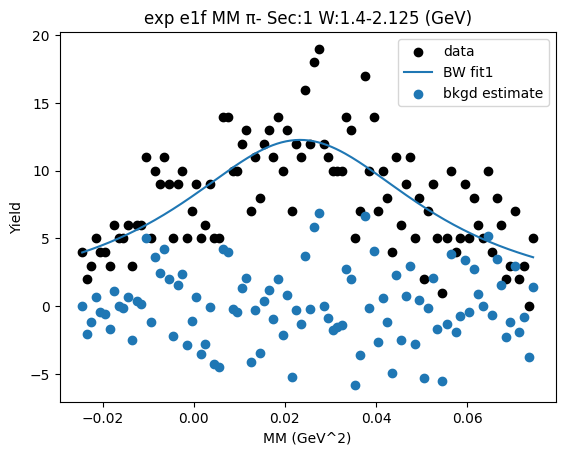

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


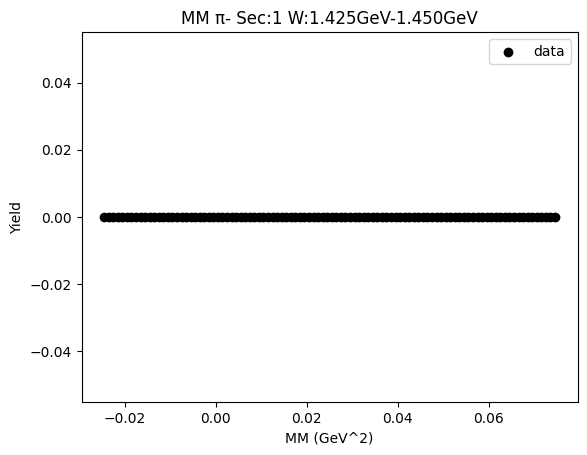

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


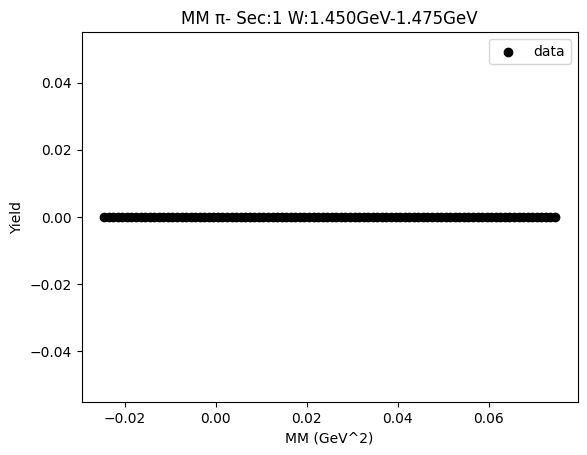

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


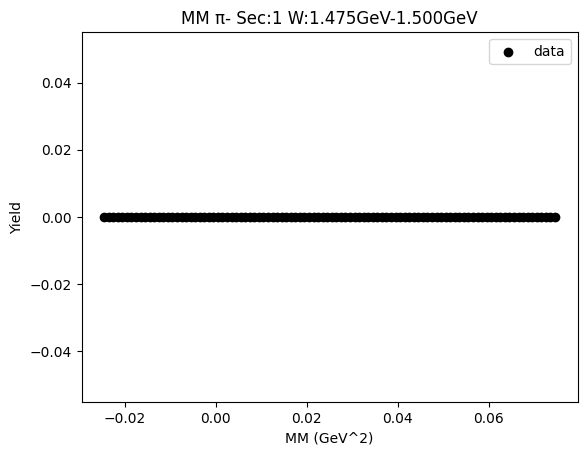

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


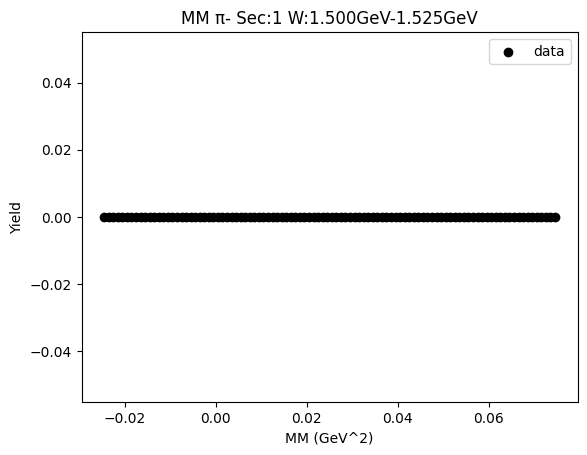

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


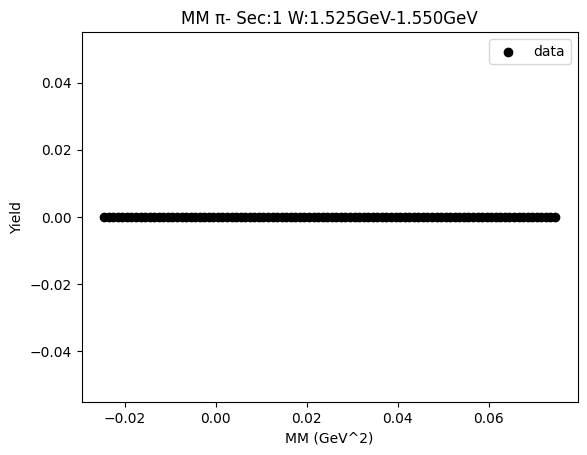

W bin: 6 1.550GeV-1.575GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


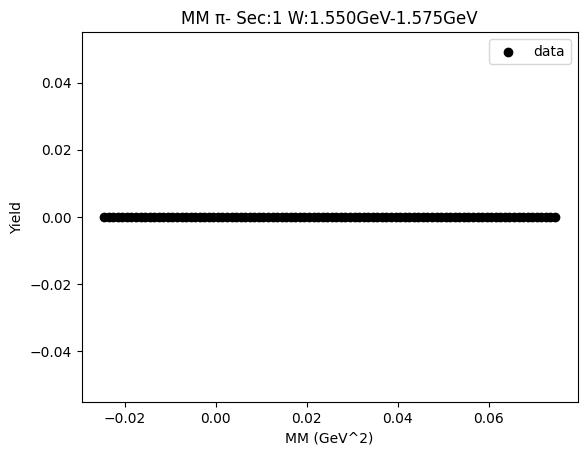

W bin: 7 1.575GeV-1.600GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


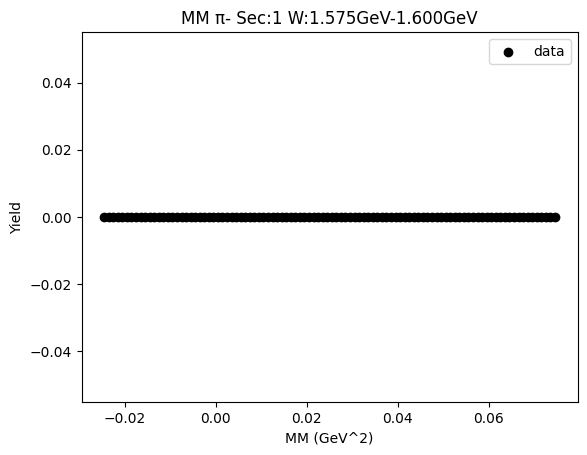

W bin: 8 1.600GeV-1.625GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


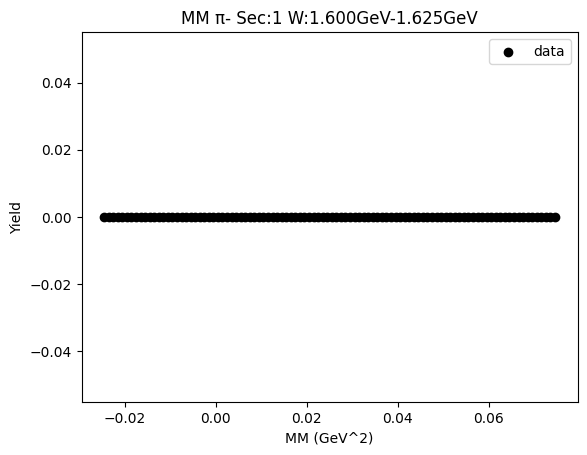

W bin: 9 1.625GeV-1.650GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


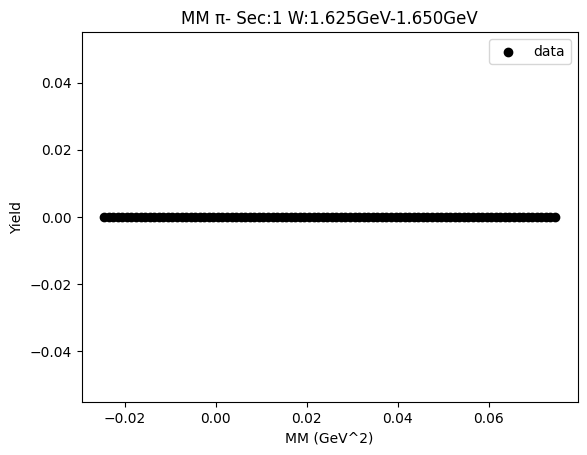

W bin: 10 1.650GeV-1.675GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


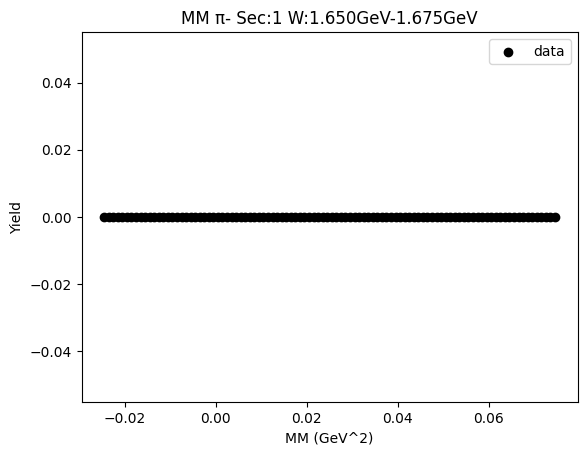

W bin: 11 1.675GeV-1.700GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


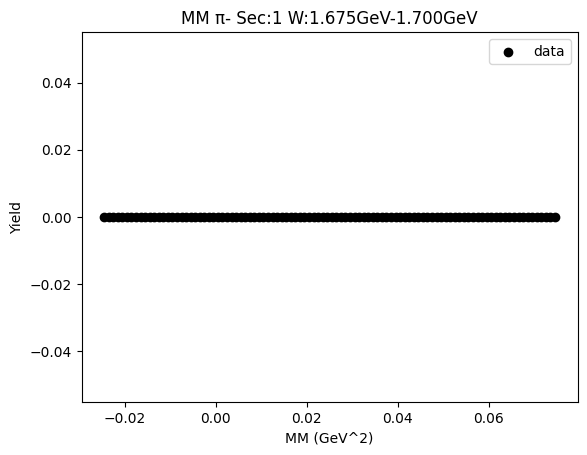

W bin: 12 1.700GeV-1.725GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


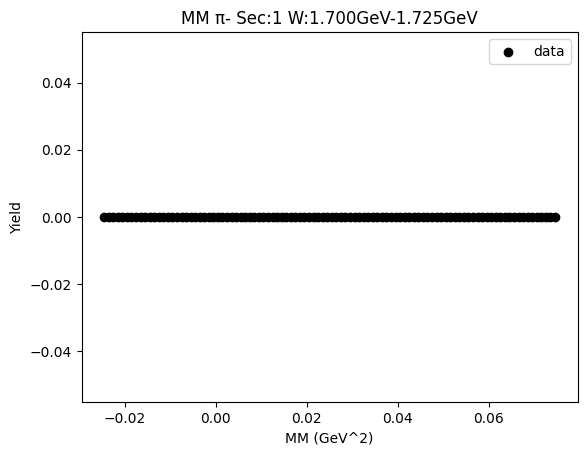

W bin: 13 1.725GeV-1.750GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


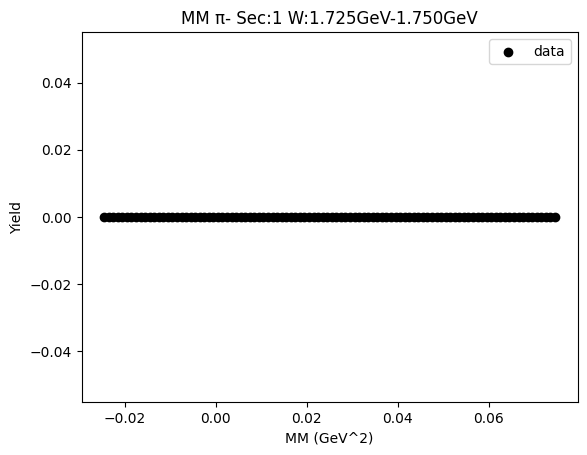

W bin: 14 1.750GeV-1.775GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


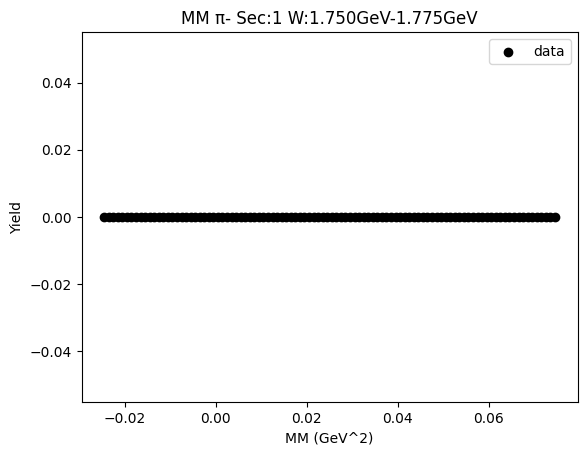

W bin: 15 1.775GeV-1.800GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


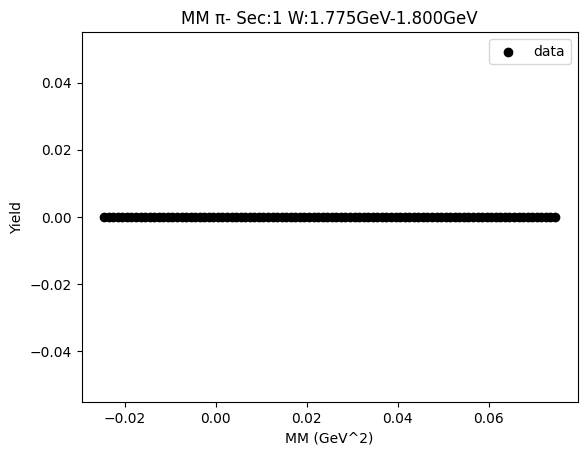

W bin: 16 1.800GeV-1.825GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


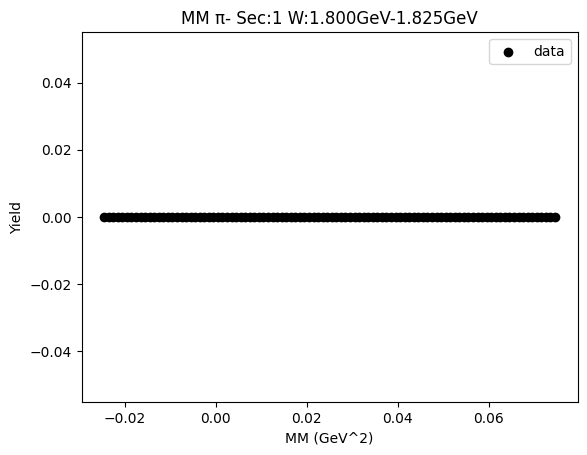

W bin: 17 1.825GeV-1.850GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


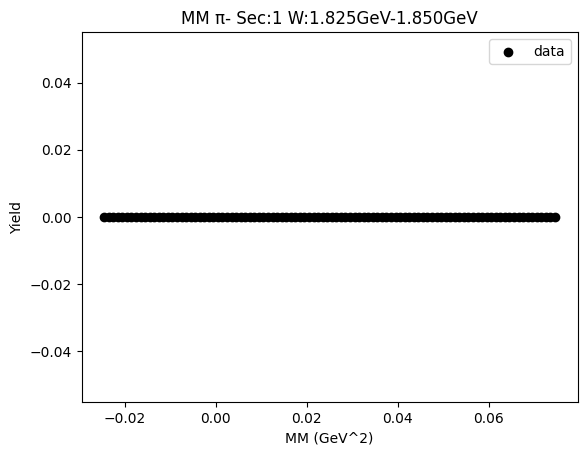

W bin: 18 1.850GeV-1.875GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


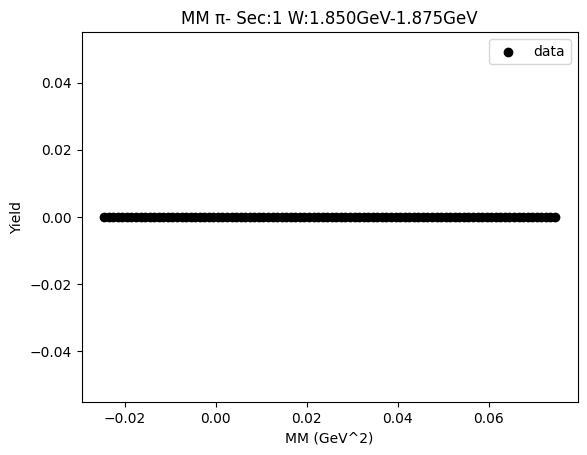

W bin: 19 1.875GeV-1.900GeV
Runtime Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


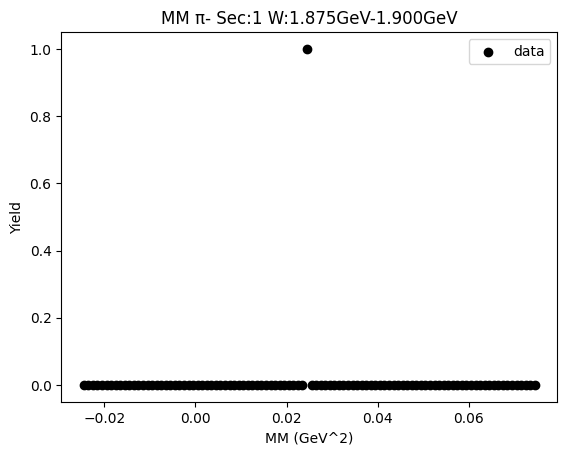

W bin: 20 1.900GeV-1.925GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


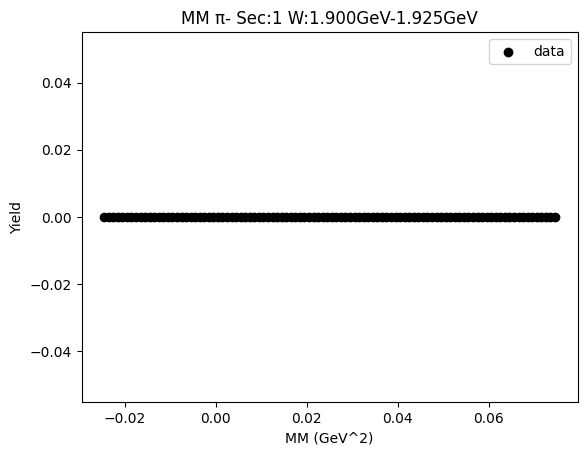

W bin: 21 1.925GeV-1.950GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[4.71584913e-06 7.69721559e-06 1.14052816e-05]
 [1.48706620e-05 1.98829910e-05 2.56220196e-05]]
Cut Bounds Err [[4.68568759e+07 7.18358855e+07 1.02017440e+08]
 [8.32067442e+07 1.15455727e+08 1.52907255e+08]]


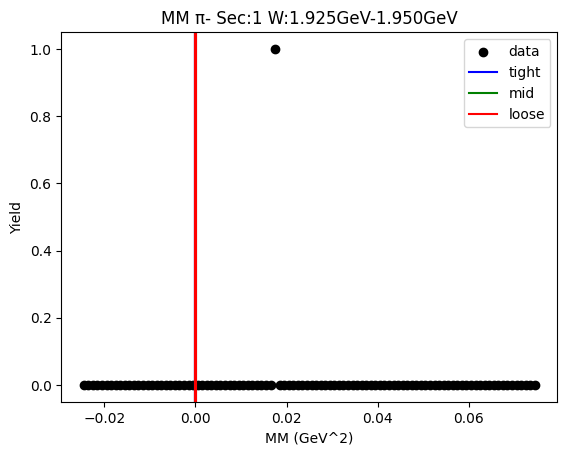

W bin: 22 1.950GeV-1.975GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


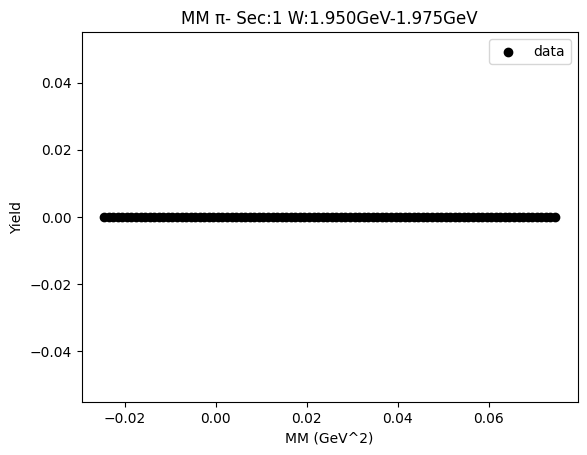

W bin: 23 1.975GeV-2.000GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


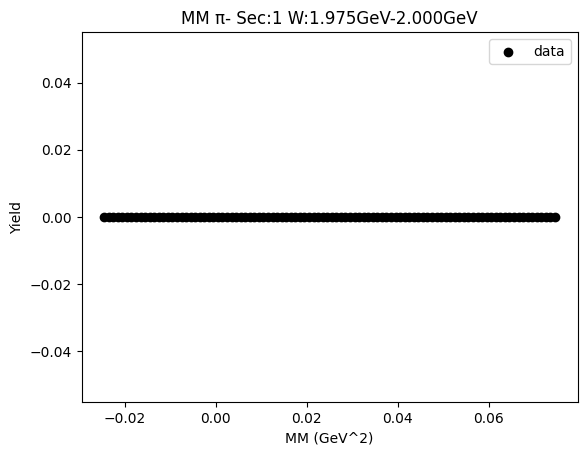

W bin: 24 2.000GeV-2.025GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


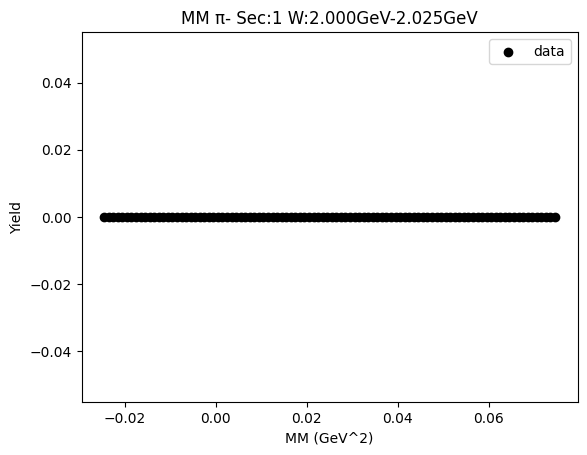

W bin: 25 2.025GeV-2.050GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.06236352 0.06233623 0.06230895]
 [0.06263674 0.06266409 0.06269145]]
Cut Bounds Err [[0.00039491 0.0005042  0.00061349]
 [0.00069798 0.00080727 0.00091656]]


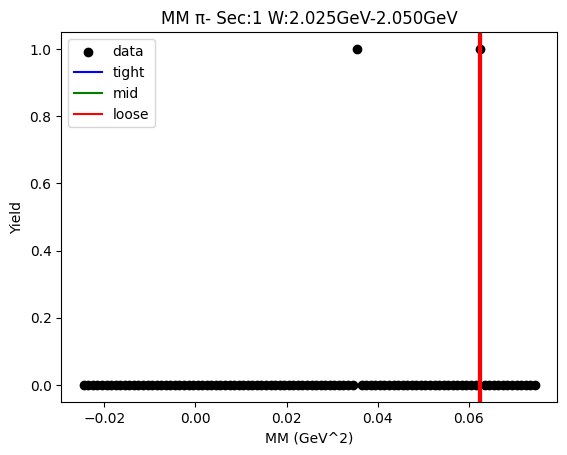

W bin: 26 2.050GeV-2.075GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


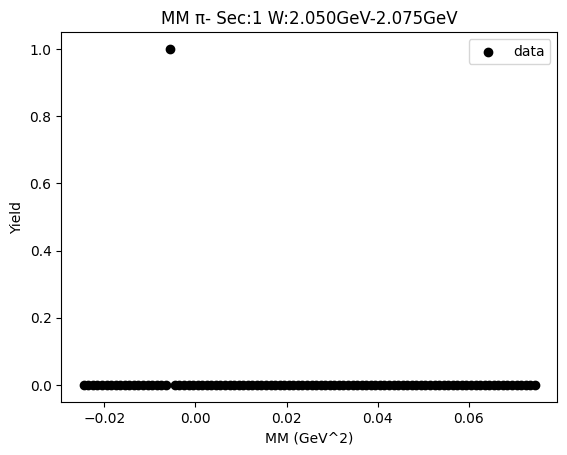

W bin: 27 2.075GeV-2.100GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.05134421 0.05131316 0.05128212]
 [0.05165523 0.05168638 0.05171754]]
Cut Bounds Err [[0.00058537 0.00072242 0.00085947]
 [0.00078515 0.0009222  0.00105926]]


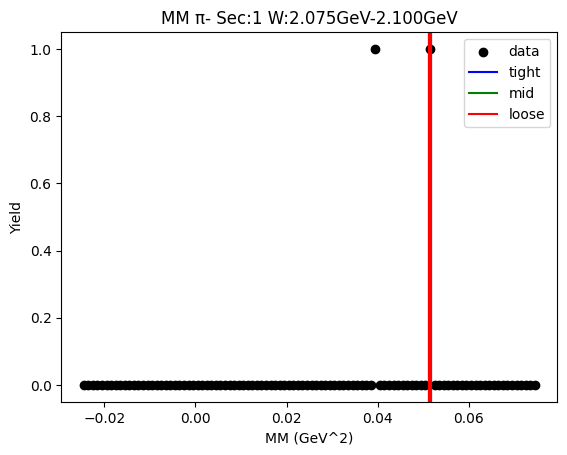

W bin: 28 2.100GeV-2.125GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.00100173 0.00100167 0.00100162]
 [0.00100224 0.00100229 0.00100234]]
Cut Bounds Err [[57165948.65768995 68597380.99174276 80028227.52663386]
 [57180593.6367331  68618469.7615649  80056931.68555841]]


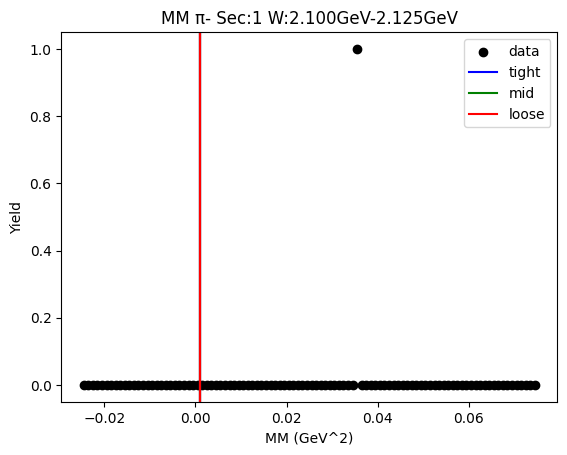

Value Error1.1
	Just skip it for now


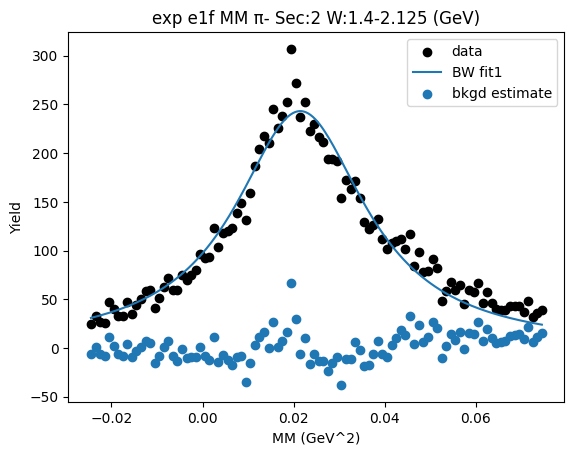

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


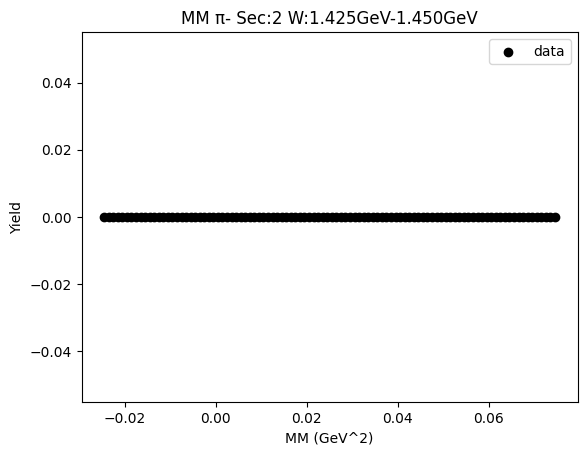

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


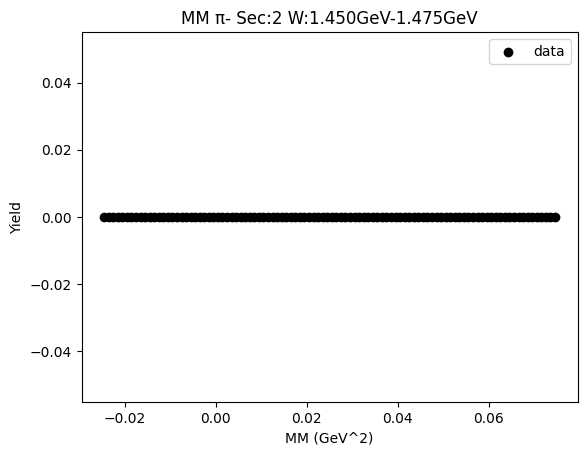

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


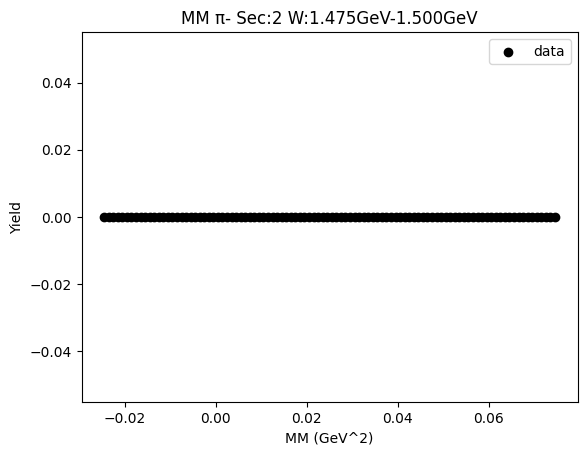

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


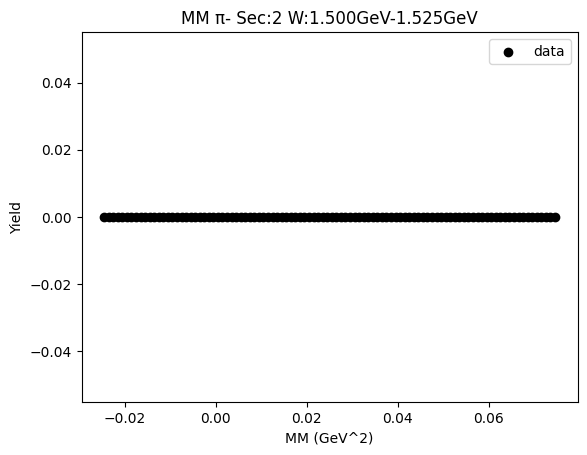

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


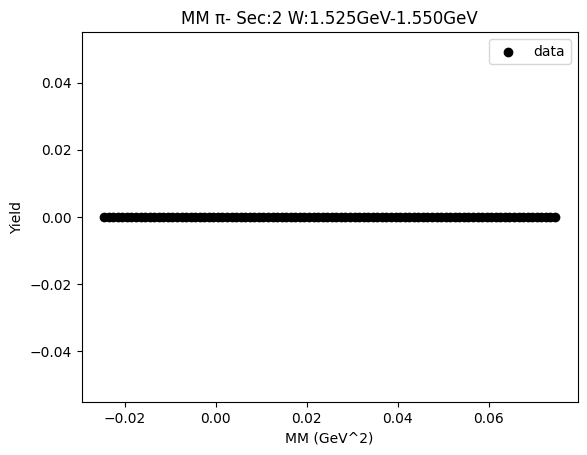

W bin: 6 1.550GeV-1.575GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


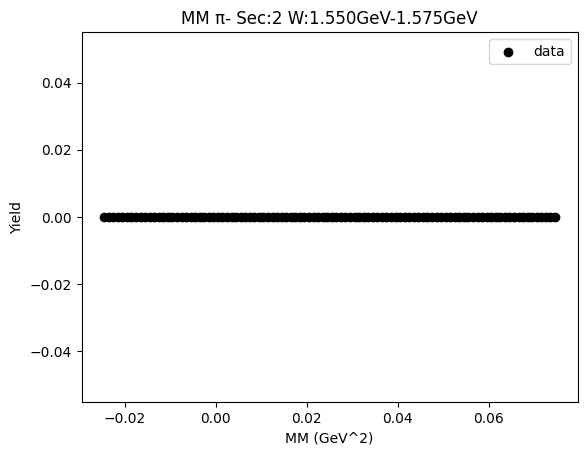

W bin: 7 1.575GeV-1.600GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


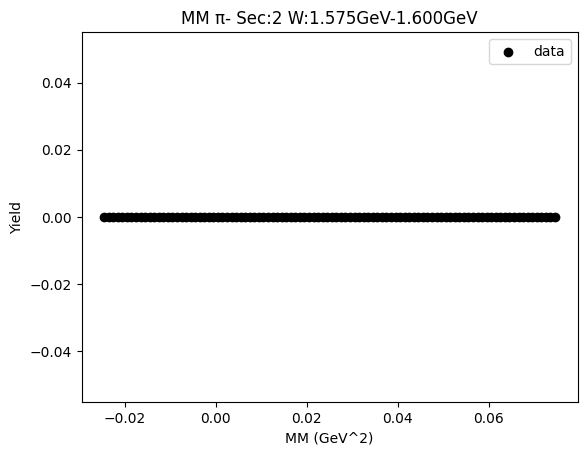

W bin: 8 1.600GeV-1.625GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


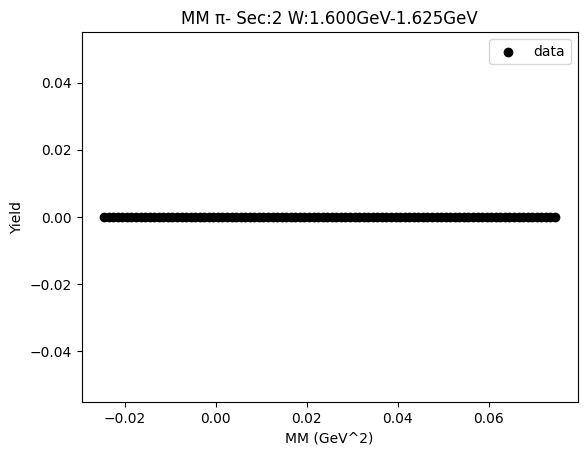

W bin: 9 1.625GeV-1.650GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


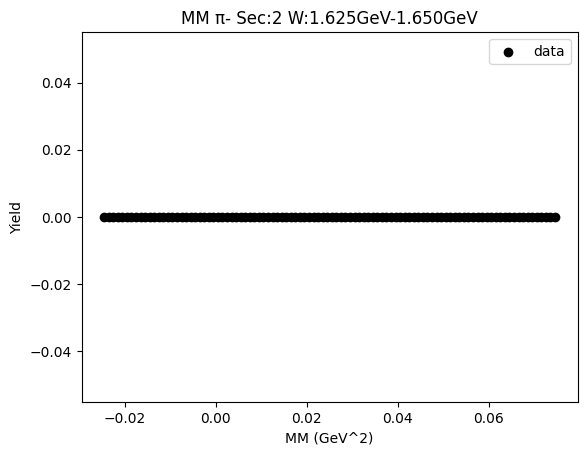

W bin: 10 1.650GeV-1.675GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


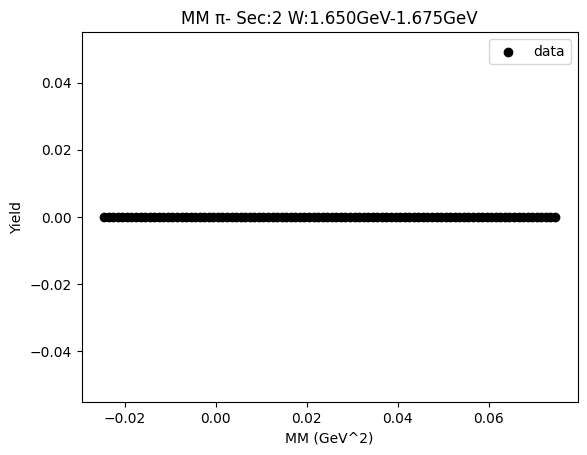

W bin: 11 1.675GeV-1.700GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


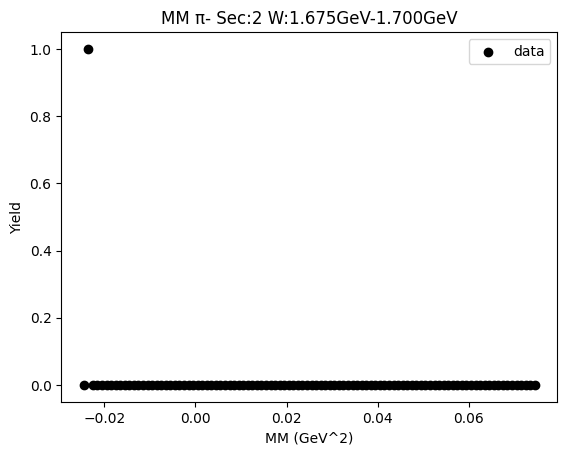

W bin: 12 1.700GeV-1.725GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


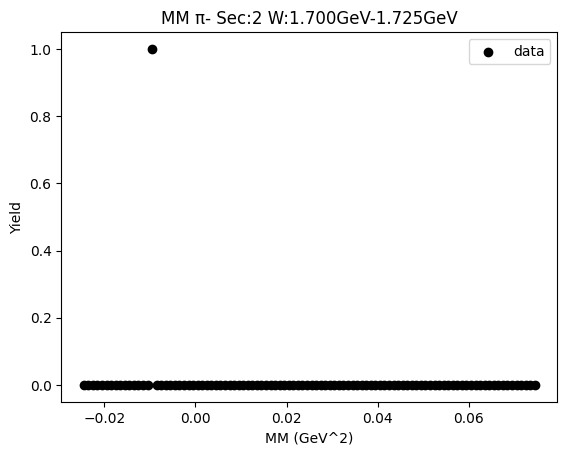

W bin: 13 1.725GeV-1.750GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


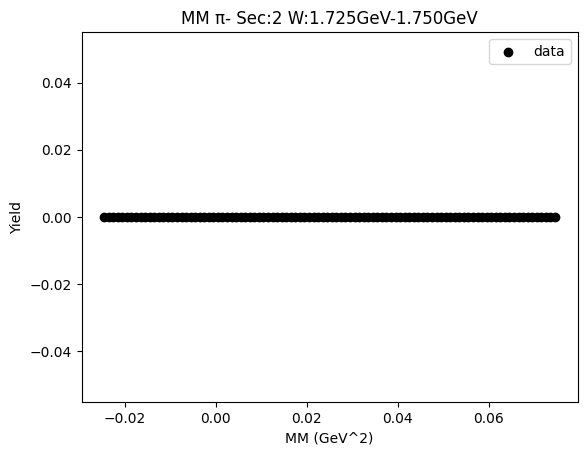

W bin: 14 1.750GeV-1.775GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


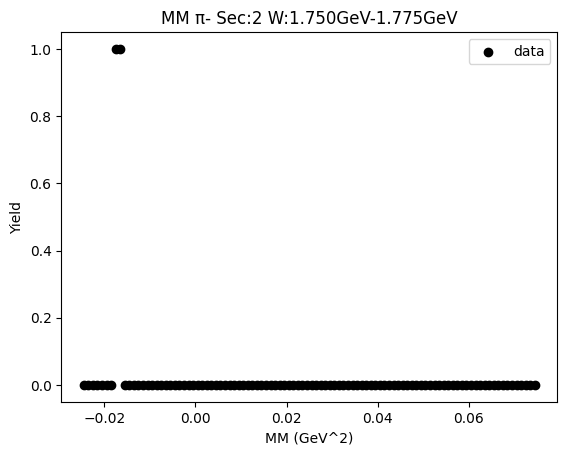

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[2.20484059e-05 3.41928998e-05 4.89911249e-05]
 [4.65586802e-05 6.36052290e-05 8.33055090e-05]]
Cut Bounds Err [[185883.54120722 277780.3705885  387917.24034972]
 [270117.46829145 378861.08308957 505844.73826764]]


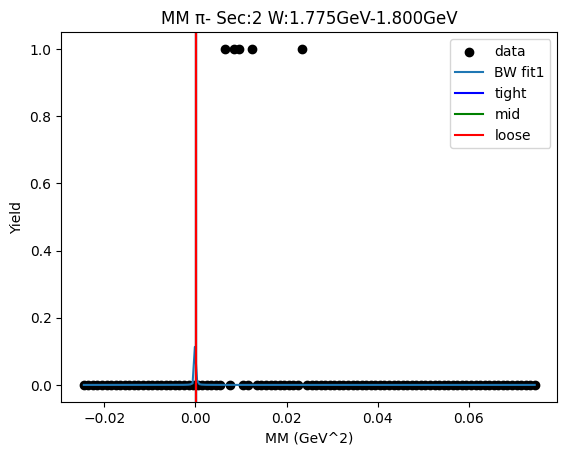

W bin: 16 1.800GeV-1.825GeV
Cut Bounds [[7.67527057e-07 4.54684365e-07 2.23274708e-07]
 [8.37477085e-06 9.58337692e-06 1.08734160e-05]]
Cut Bounds Err [[1261405.74307071 1165049.05883817  952479.76365675]
 [4166721.01679299 5348703.05299826 6646897.70015243]]


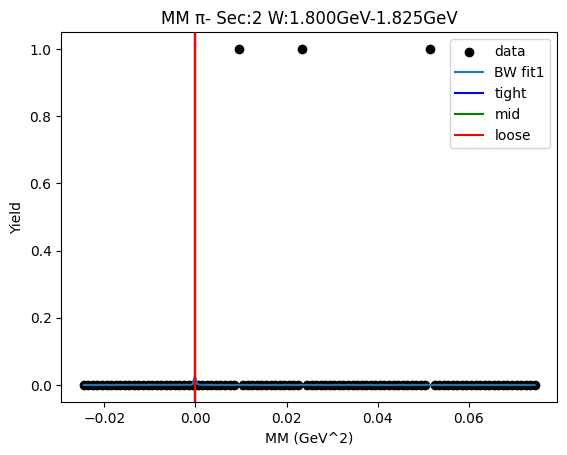

W bin: 17 1.825GeV-1.850GeV
Cut Bounds [[0.09803987 0.14118278 0.19217068]
 [0.09808462 0.14123648 0.19223332]]
Cut Bounds Err [[32592023.91534589 46933406.86296973 63882449.19877847]
 [32599460.78927635 46942331.11168629 63892860.8222811 ]]


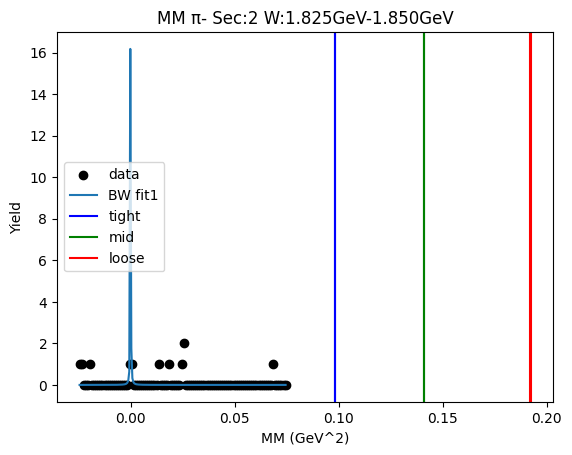

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[0.00094557 0.00093484 0.00092416]
 [0.00105634 0.00106776 0.00107923]]
Cut Bounds Err [[0.01061418 0.01266447 0.01469059]
 [0.01121866 0.01353493 0.01587537]]


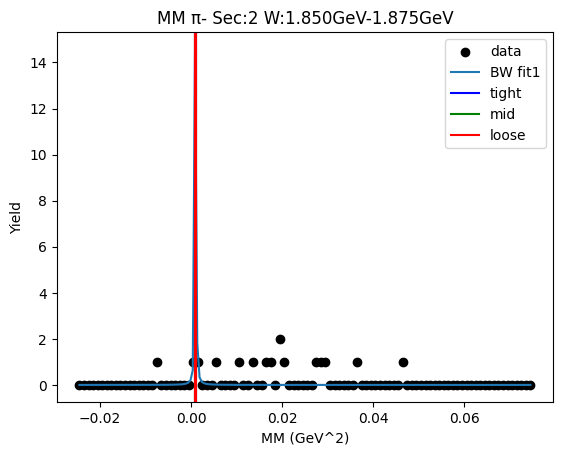

W bin: 19 1.875GeV-1.900GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


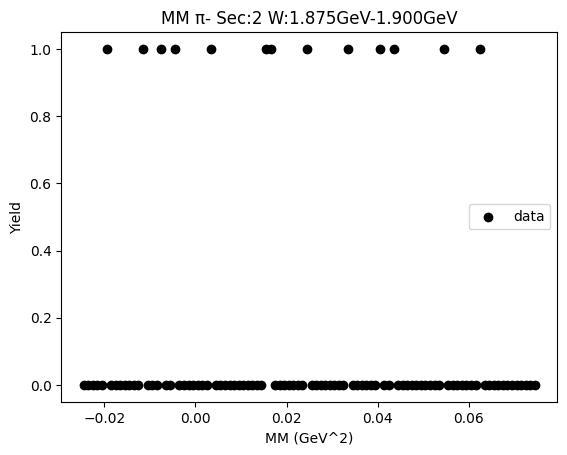

W bin: 20 1.900GeV-1.925GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[9.72791525e-05 1.48477209e-04 2.10459590e-04]
 [1.78436447e-04 2.45865963e-04 3.24079803e-04]]
Cut Bounds Err [[1411.52167047 2092.612449   2906.63204237]
 [1911.69870053 2692.82488509 3606.87988447]]


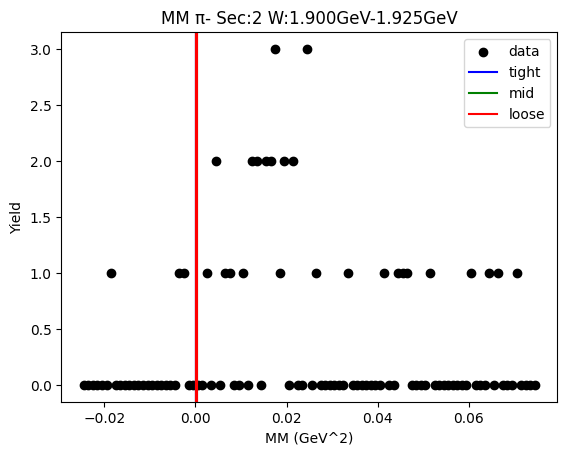

W bin: 21 1.925GeV-1.950GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


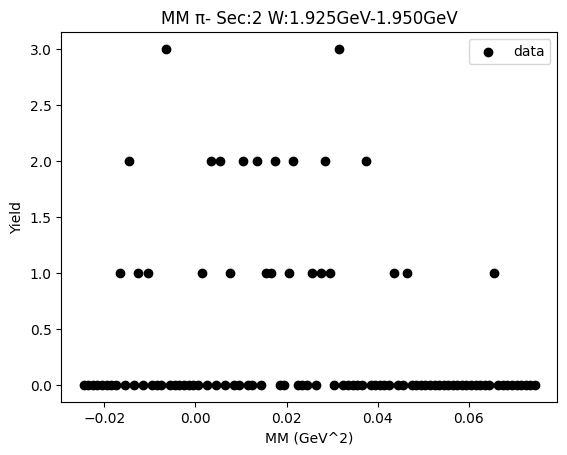

W bin: 22 1.950GeV-1.975GeV
Runtime Error2.2
	Just skip it for now
Cut Bounds [[7.63395376e-04 3.93861424e-05 2.27344110e-04]
 [5.81616838e-02 6.89173322e-02 8.05849479e-02]]
Cut Bounds Err [[3.22042316e-05 8.76386479e-06 2.45409944e-05]
 [2.81097293e-04 3.66596381e-04 4.62037546e-04]]


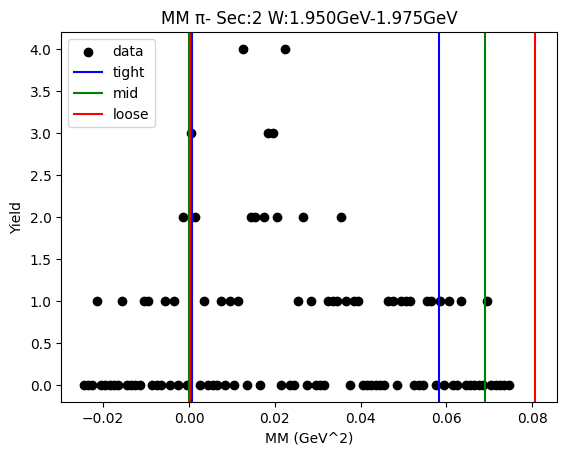

W bin: 23 1.975GeV-2.000GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.00300946 0.00154741 0.00056719]
 [0.0441306  0.05089278 0.05813678]]
Cut Bounds Err [[0.15521071 0.18625357 0.21729643]
 [0.1552179  0.18626076 0.21730363]]


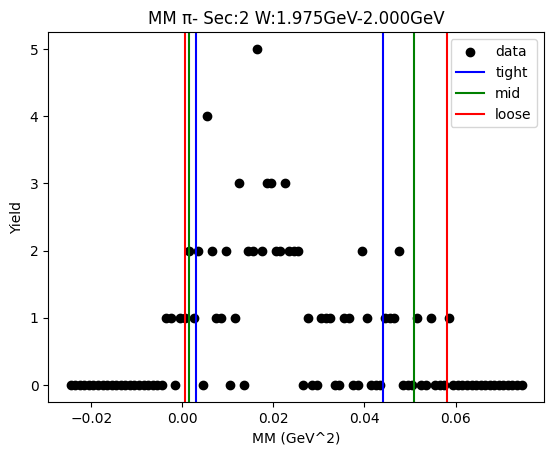

W bin: 24 2.000GeV-2.025GeV
Runtime Error2.2
	Just skip it for now
Cut Bounds [[1.79514183e-03 4.67967319e-04 8.02798936e-07]
 [6.23674365e-02 7.31547210e-02 8.48020154e-02]]
Cut Bounds Err [[2.43705523e-05 1.49072643e-05 7.19636087e-07]
 [1.43646462e-04 1.86385176e-04 2.33890524e-04]]


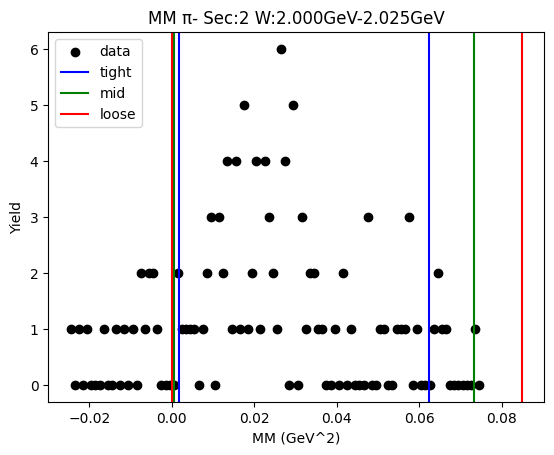

W bin: 25 2.025GeV-2.050GeV
background fit [1.93384856e+00 1.00000000e+00 6.00000000e-02 3.90558233e+00
 6.90008449e-02 2.78197292e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.0007516898084105605 0.03810194338533903
Breit-Wigner Peak [0.54971731 0.13665697 0.08047115]
Gaus2 [1.93384856 1.         0.06      ]
Gaus3 [4.43964657e+00 6.90007770e-02 2.67962557e-04]
Cut Bounds [[0.00260604 0.0011511  0.00028245]
 [0.04940154 0.0573057  0.06579616]]
Cut Bounds Err [[9.78260940e-06 7.78815469e-06 4.49607790e-06]
 [4.25926457e-05 5.49512059e-05 6.86216860e-05]]


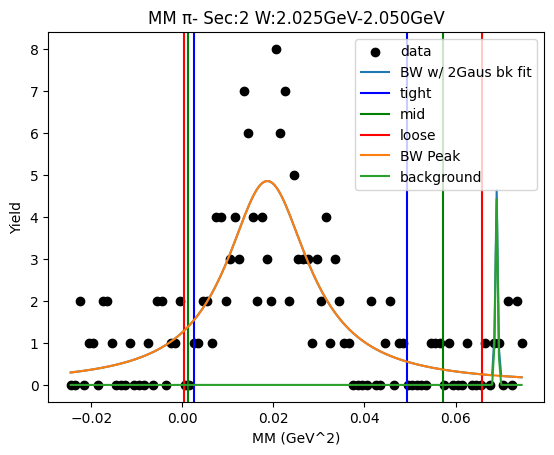

W bin: 26 2.050GeV-2.075GeV
background fit [1.93384856e+00 1.00000000e+00 6.00000000e-02 1.69279865e+00
 6.86575725e-02 1.19849962e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.002369663678525865 0.04030513041668363
Breit-Wigner Peak [0.64386485 0.13772339 0.08433544]
Gaus2 [1.93384945 1.         0.06      ]
Gaus3 [2.13613727e+00 6.86573739e-02 1.06365310e-04]
Cut Bounds [[0.00230447 0.00090367 0.00014683]
 [0.05172984 0.06021412 0.06934235]]
Cut Bounds Err [[8.68863742e-06 6.51774581e-06 3.06190850e-06]
 [4.11658560e-05 5.32036212e-05 6.65397396e-05]]


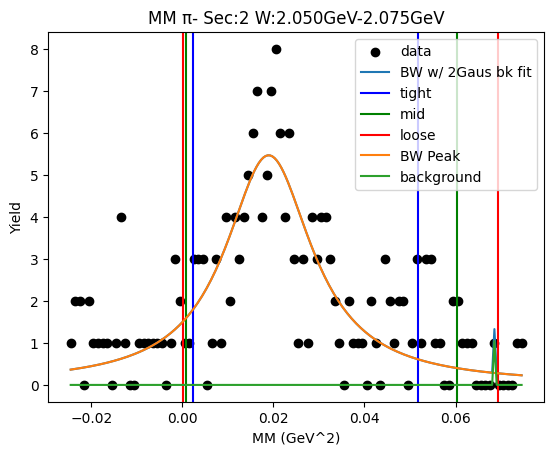

W bin: 27 2.075GeV-2.100GeV
background fit [1.93384945e+00 9.99999997e-01 6.00000000e-02 1.72963260e+00
 1.19336467e-01 1.20002556e-05]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.008906960888551037 0.05208335123827374
Breit-Wigner Peak [0.62501705 0.14692922 0.10082188]
Gaus2 [1.93384945 1.         0.06      ]
Gaus3 [1.72963260e+00 1.19336467e-01 1.20002556e-05]
Cut Bounds [[1.57385935e-03 3.31984138e-04 1.04395711e-05]
 [6.46107972e-02 7.59763096e-02 8.82621526e-02]]
Cut Bounds Err [[1.14950645e-05 6.32521940e-06 1.30733310e-06]
 [7.36513990e-05 9.56876799e-05 1.20207672e-04]]


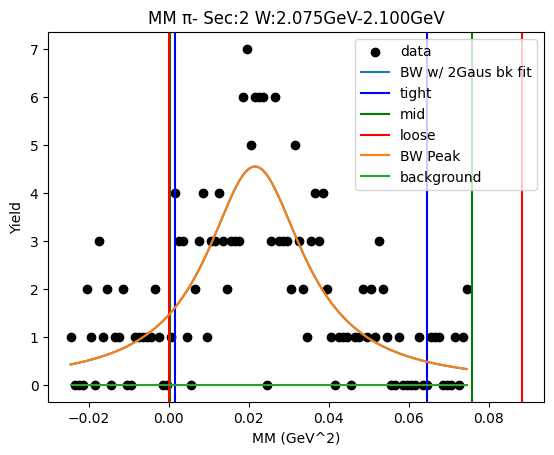

W bin: 28 2.100GeV-2.125GeV
background fit [1.93384945e+00 9.99999997e-01 6.00000000e-02 1.72963260e+00
 1.19336467e-01 1.20002556e-05]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.03146001316883314 0.06963313374976085
Breit-Wigner Peak [0.89085584 0.13815412 0.12980315]
Gaus2 [1.93384945 1.         0.06      ]
Gaus3 [1.72963260e+00 1.19336467e-01 1.20002556e-05]
Cut Bounds [[4.31125645e-09 7.59114434e-04 3.04369833e-03]
 [7.63099606e-02 9.23310620e-02 1.09877637e-01]]
Cut Bounds Err [[4.32008070e-08 2.17248056e-05 5.07114601e-05]
 [1.81752564e-04 2.39594139e-04 3.04691240e-04]]


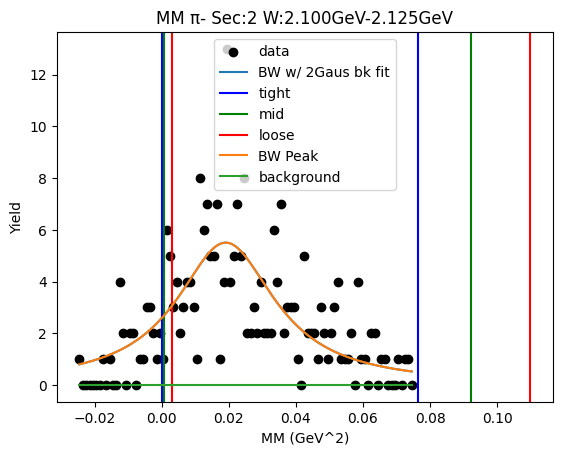

Value Error1.1
	Just skip it for now


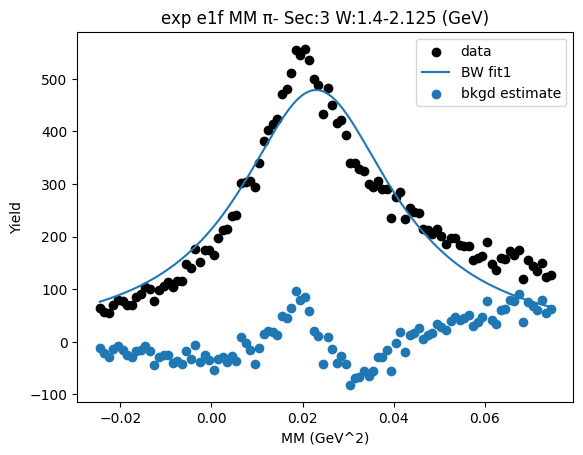

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


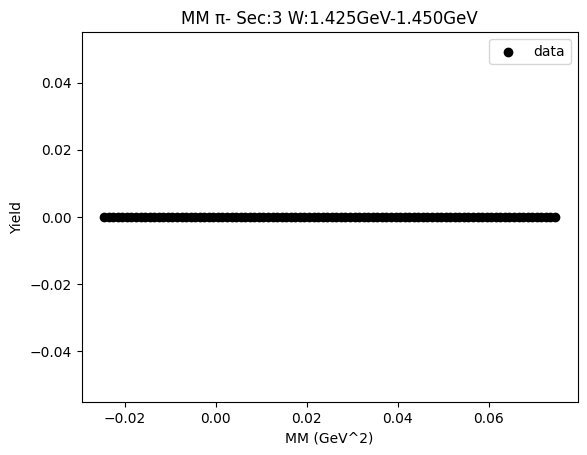

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


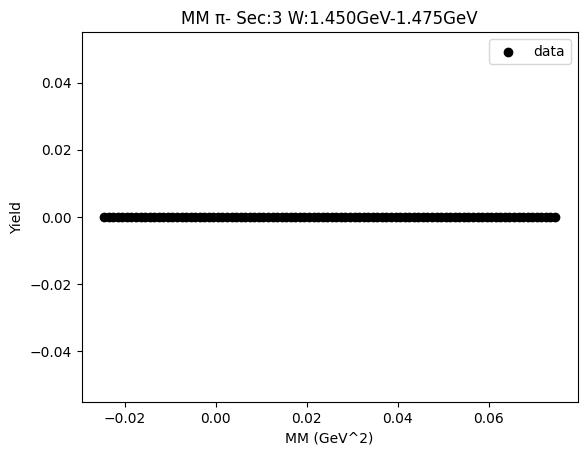

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


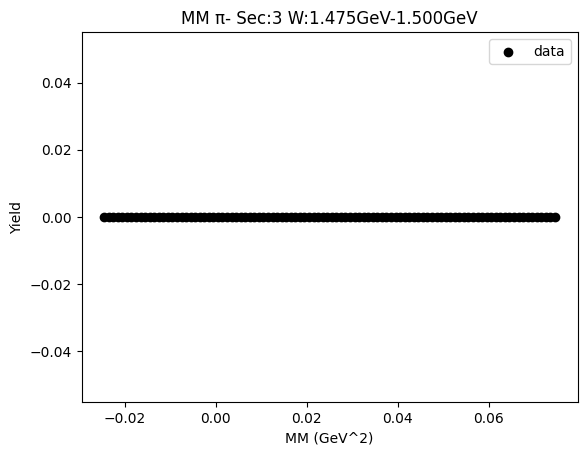

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


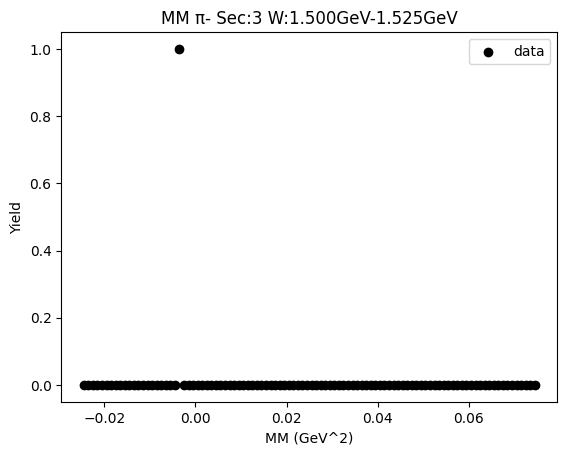

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


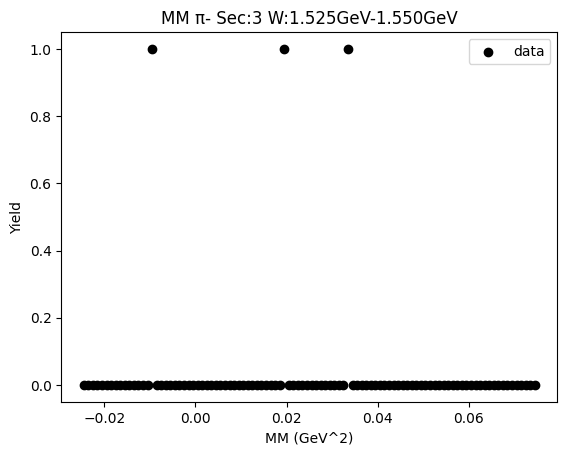

W bin: 6 1.550GeV-1.575GeV
Cut Bounds [[9.08764834e-06 7.42588640e-06 5.93177356e-06]
 [3.49259685e-05 3.84318706e-05 4.21054218e-05]]
Cut Bounds Err [[ 391.96727165  425.18647958  443.34760537]
 [ 768.41932499  967.27743639 1181.19362992]]


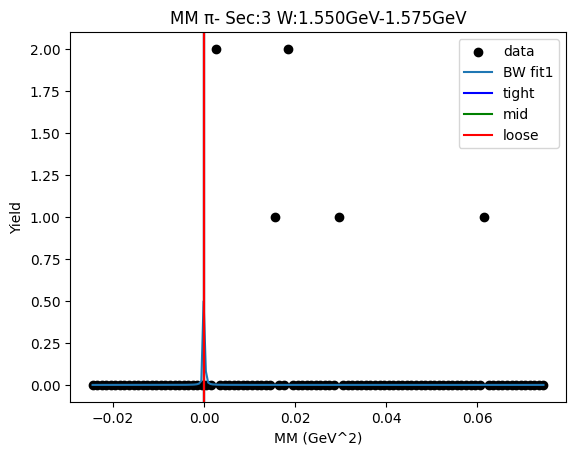

W bin: 7 1.575GeV-1.600GeV
Cut Bounds [[8.73114677e-06 7.79807561e-06 6.91771816e-06]
 [2.09611118e-05 2.24740336e-05 2.40396692e-05]]
Cut Bounds Err [[ 9770.92580744 11080.90007055 12176.13736753]
 [15139.34996062 18811.43085113 22698.24870776]]


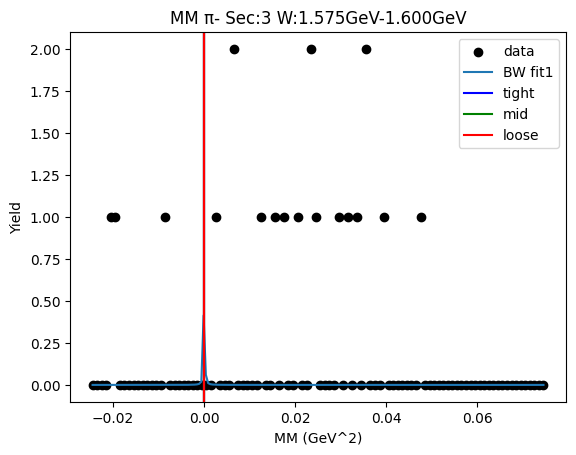

W bin: 8 1.600GeV-1.625GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


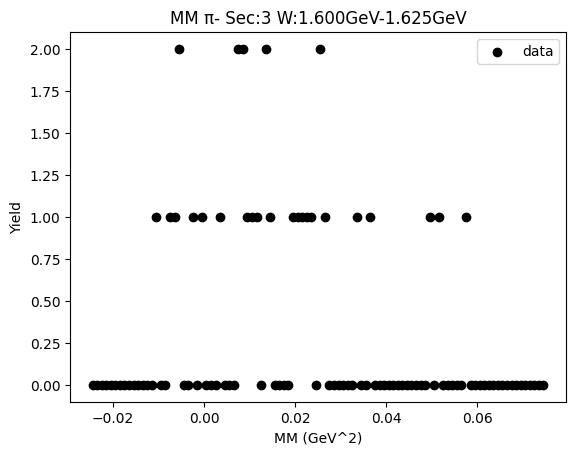

W bin: 9 1.625GeV-1.650GeV
Cut Bounds [[0.00328635 0.0013697  0.00027863]
 [0.06785994 0.078858   0.09068165]]
Cut Bounds Err [[5.62055144e-05 4.34718643e-05 2.28521921e-05]
 [2.55404509e-04 3.29851523e-04 4.12263043e-04]]


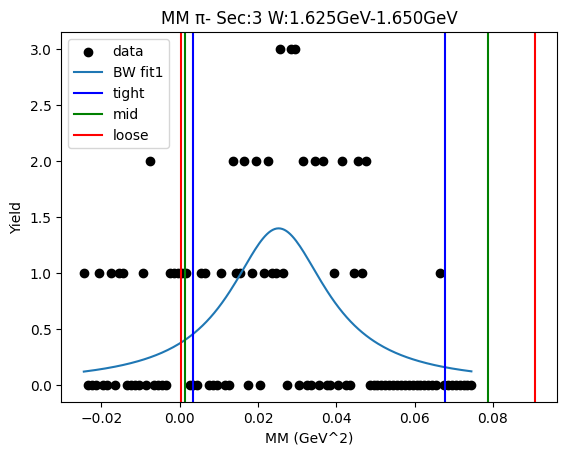

W bin: 10 1.650GeV-1.675GeV
Cut Bounds [[1.85300352e-03 5.08045834e-04 4.13397063e-06]
 [6.15601005e-02 7.21565622e-02 8.35940698e-02]]
Cut Bounds Err [[3.01680875e-05 1.89247758e-05 1.98966322e-06]
 [1.73883878e-04 2.25536695e-04 2.82933006e-04]]


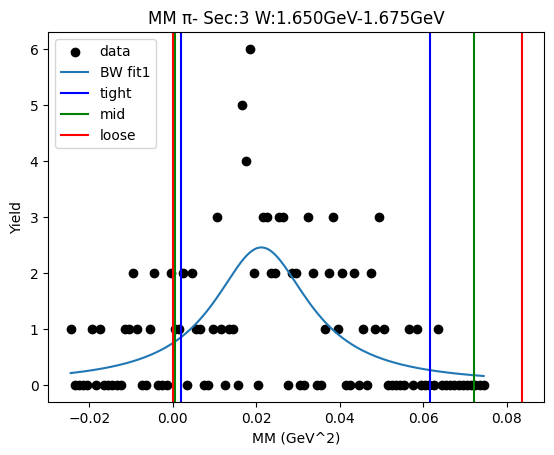

W bin: 11 1.675GeV-1.700GeV
Cut Bounds [[8.77673360e-04 5.37119258e-05 2.24037084e-04]
 [6.38030503e-02 7.55641642e-02 8.83195648e-02]]
Cut Bounds Err [[1.59945154e-05 4.74071489e-06 1.12851087e-05]
 [1.36372043e-04 1.77814191e-04 2.24065119e-04]]


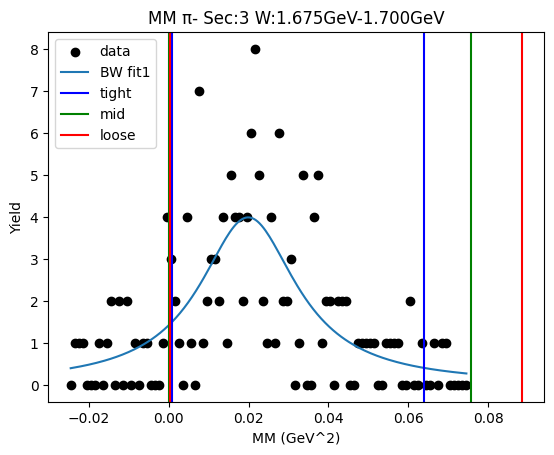

W bin: 12 1.700GeV-1.725GeV
Cut Bounds [[6.52217627e-04 1.50181099e-06 5.33036527e-04]
 [7.21831551e-02 8.58386267e-02 1.00676349e-01]]
Cut Bounds Err [[1.33493760e-05 7.67571675e-07 1.68559412e-05]
 [1.40437351e-04 1.83507020e-04 2.31653171e-04]]


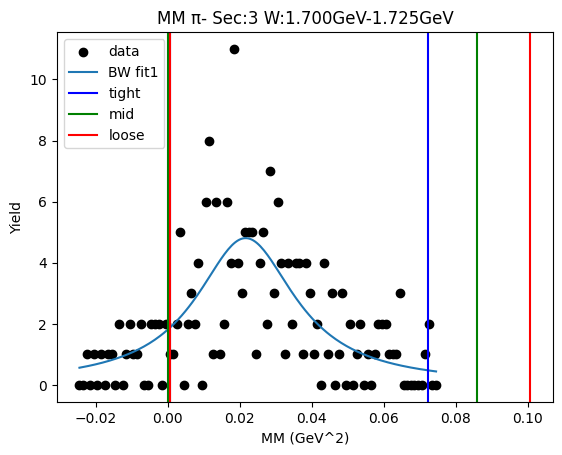

W bin: 13 1.725GeV-1.750GeV
Cut Bounds [[1.64191974e-03 4.14764942e-04 4.44993055e-08]
 [5.85973571e-02 6.87612898e-02 7.97376568e-02]]
Cut Bounds Err [[6.14624279e-06 3.70081223e-06 4.46770789e-08]
 [3.67174713e-05 4.76505632e-05 5.98053296e-05]]


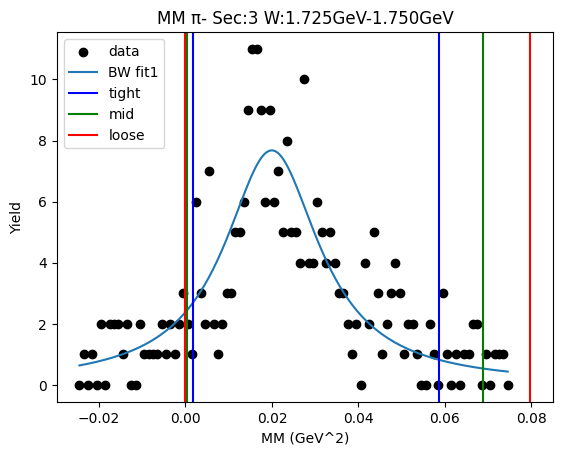

W bin: 14 1.750GeV-1.775GeV
Cut Bounds [[8.98408247e-04 4.16811847e-05 2.91086785e-04]
 [7.03029753e-02 8.33271616e-02 9.74574806e-02]]
Cut Bounds Err [[7.11557266e-06 1.83642607e-06 5.65676437e-06]
 [6.29447982e-05 8.21101255e-05 1.03505740e-04]]


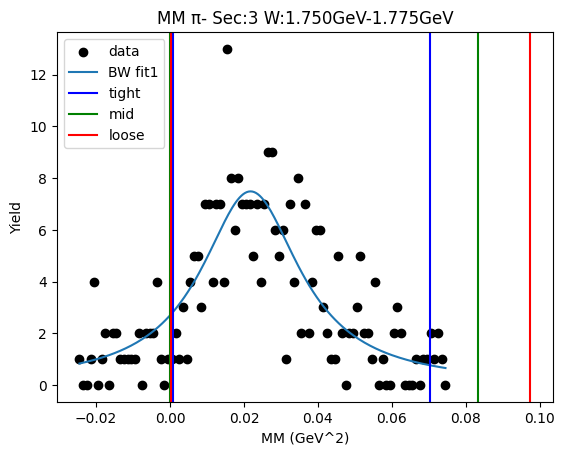

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[9.31992216e-04 6.42622357e-05 2.10128264e-04]
 [6.53570725e-02 7.73743586e-02 9.04052406e-02]]
Cut Bounds Err [[7.12260125e-06 2.24088143e-06 4.72305841e-06]
 [5.96456512e-05 7.77569993e-05 9.79665657e-05]]


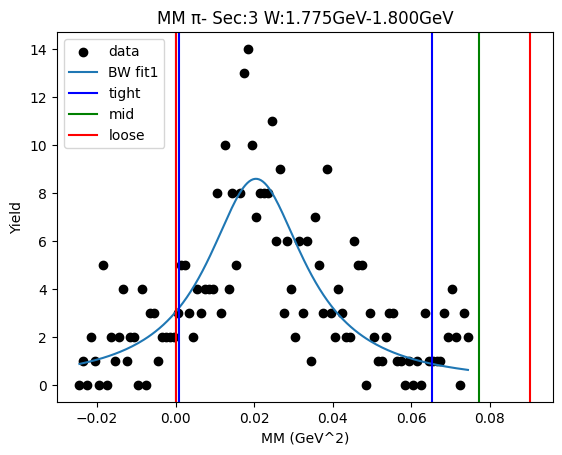

W bin: 16 1.800GeV-1.825GeV
Cut Bounds [[8.81762391e-04 4.55754728e-05 2.62199078e-04]
 [6.71482103e-02 7.95653130e-02 9.30352262e-02]]
Cut Bounds Err [[4.98955694e-06 1.35915595e-06 3.79983612e-06]
 [4.35415032e-05 5.67891784e-05 7.15769183e-05]]


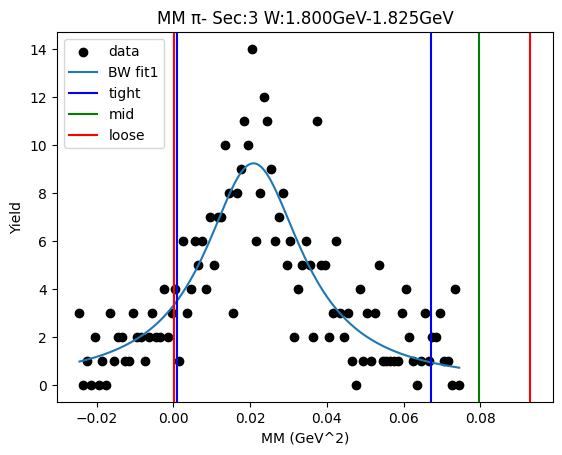

W bin: 17 1.825GeV-1.850GeV
Cut Bounds [[2.04296913e-03 6.33397753e-04 2.63741130e-05]
 [6.02788083e-02 7.05164047e-02 8.15565489e-02]]
Cut Bounds Err [[6.72470947e-06 4.48581554e-06 1.06684946e-06]
 [3.65279208e-05 4.73312781e-05 5.93258039e-05]]


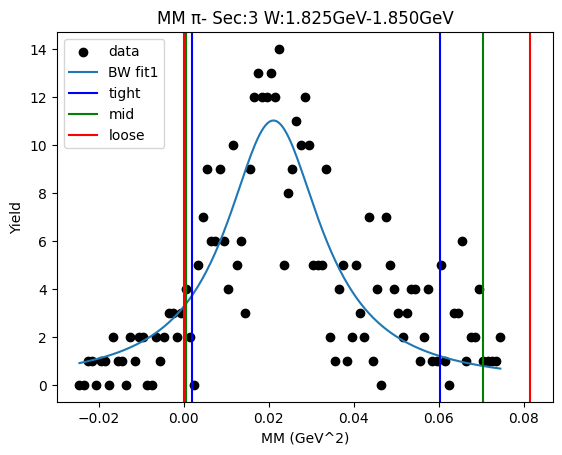

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[1.32222787e-03 2.22399389e-04 4.27236008e-05]
 [6.29289107e-02 7.41504188e-02 8.62920796e-02]]
Cut Bounds Err [[6.04331673e-06 2.96945324e-06 1.51694916e-06]
 [4.16914798e-05 5.42208723e-05 6.81745953e-05]]


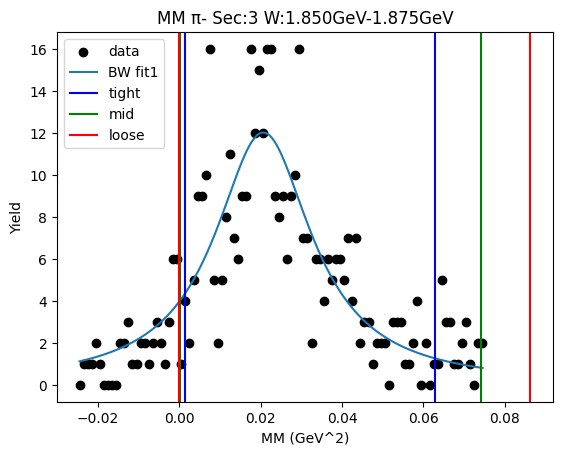

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[0.0010816  0.00012145 0.00011764]
 [0.06328136 0.07476117 0.08719731]]
Cut Bounds Err [[4.71730739e-06 1.89392579e-06 2.17257517e-06]
 [3.60827249e-05 4.69888634e-05 5.91480849e-05]]


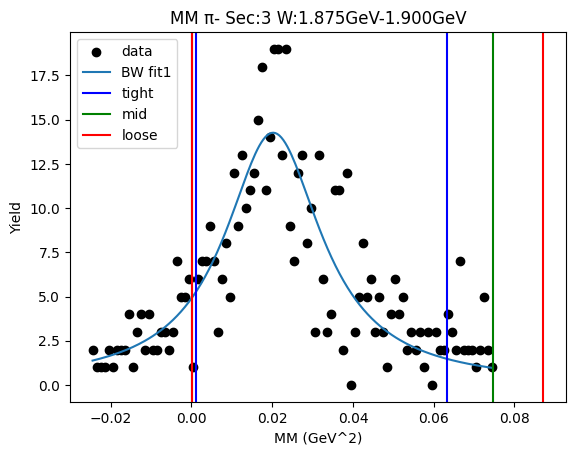

W bin: 20 1.900GeV-1.925GeV
background fit [5.70292025 8.1160824  0.7345282  1.97460442 0.05165675 0.00924714]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.009335302771823718 0.0272467543412458
Breit-Wigner Peak [1.0443137  0.13524433 0.05463737]
Gaus2 [68.84368206 19.16470699  0.33854693]
Gaus3 [3.6897949  0.03672506 0.02972723]
Cut Bounds [[0.00594741 0.00428953 0.00290193]
 [0.03739164 0.04202261 0.04692385]]
Cut Bounds Err [[1.95493175e-05 1.99180219e-05 1.91102574e-05]
 [4.90179152e-05 6.23423078e-05 7.68458093e-05]]


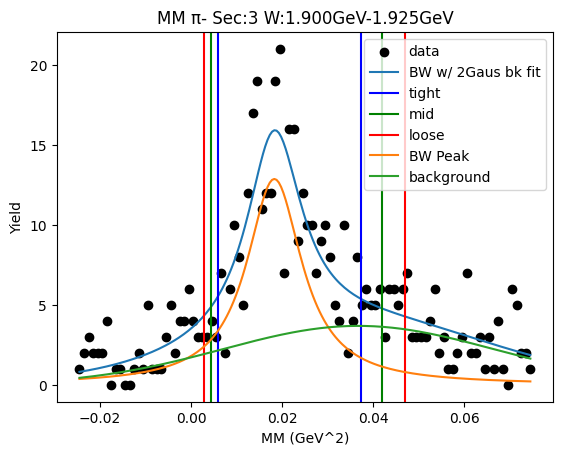

W bin: 21 1.925GeV-1.950GeV
background fit [6.41814907e+01 1.96406073e+01 3.67517409e+00 1.82465844e+00
 5.36931693e-02 9.06916759e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.009082922499430539 0.02882482063787195
Breit-Wigner Peak [1.12895211 0.13767306 0.05736128]
Gaus2 [64.49395428 18.75223878  2.95203132]
Gaus3 [4.20822138 0.0319101  0.03490645]
Cut Bounds [[0.00587529 0.00415327 0.00272916]
 [0.03947998 0.04447891 0.04977573]]
Cut Bounds Err [[1.80155645e-05 1.81694548e-05 1.71793466e-05]
 [4.67005272e-05 5.94598318e-05 7.33670274e-05]]


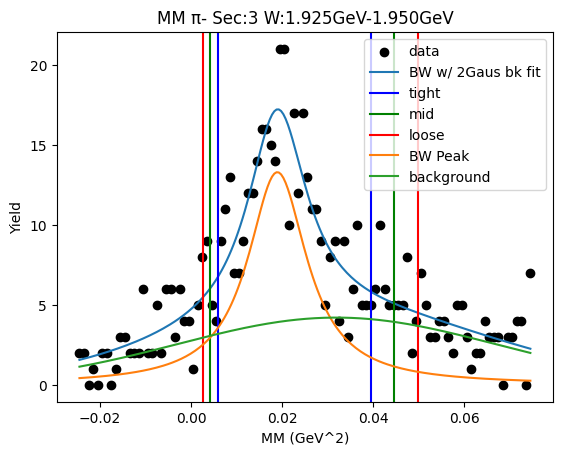

W bin: 22 1.950GeV-1.975GeV
background fit [5.66691135e+01 8.85840392e+01 1.06485994e+00 2.21603142e+00
 6.90325500e-02 1.06228986e-02]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.014789082302444793 0.0541140599842912
Breit-Wigner Peak [2.16579018 0.140223   0.10716276]
Gaus2 [5.47332821e+01 9.53702014e+01 1.23382017e-02]
Gaus3 [1.99567192 0.06057806 0.00926945]
Cut Bounds [[6.87491603e-04 1.16928019e-05 3.75627550e-04]
 [6.46308248e-02 7.67436926e-02 8.98962940e-02]]
Cut Bounds Err [[5.13008139e-06 8.01865577e-07 5.29843814e-06]
 [4.97405296e-05 6.49626331e-05 8.19671894e-05]]


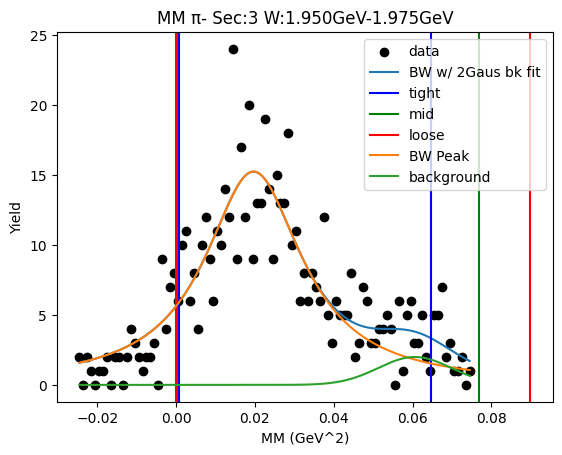

W bin: 23 1.975GeV-2.000GeV
background fit [1.62217684e+00 6.18667294e-02 6.51074586e-03 3.15207921e+00
 5.58340576e-02 1.59446733e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.014805463767405068 0.05324642104793031
Breit-Wigner Peak [2.00918259 0.13863794 0.10649874]
Gaus2 [2.30024008 0.05586055 0.01257495]
Gaus3 [2.91613137e+00 5.61366111e-02 1.42607456e-03]
Cut Bounds [[6.42187214e-04 7.19370038e-06 3.99088444e-04]
 [6.34709765e-02 7.54017408e-02 8.83593934e-02]]
Cut Bounds Err [[5.82506127e-06 7.36910809e-07 6.38823932e-06]
 [5.79104928e-05 7.54448224e-05 9.50545618e-05]]


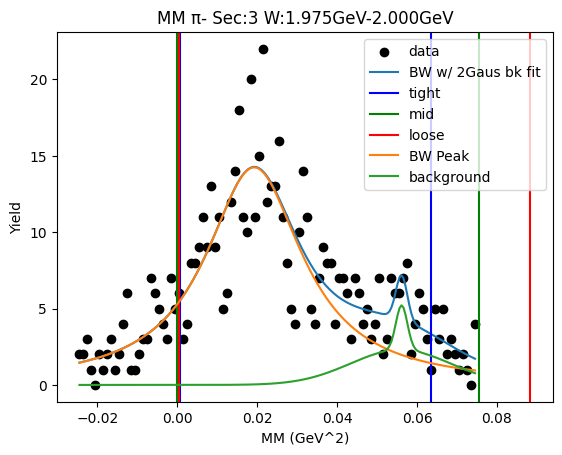

W bin: 24 2.000GeV-2.025GeV
background fit [1.54680802e+00 6.03992955e-02 8.53329208e-03 1.35080360e+00
 5.72041652e-02 5.19014503e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.0044170907599674 0.04090181807345098
Breit-Wigner Peak [1.43446758 0.13506429 0.08690887]
Gaus2 [2.91380882 0.04597719 0.04337795]
Gaus3 [7.26269381e-01 5.72028344e-02 5.75910351e-04]
Cut Bounds [[1.81544602e-03 5.81620162e-04 3.16468555e-05]
 [5.17655952e-02 6.05217991e-02 6.99618557e-02]]
Cut Bounds Err [[3.78452229e-05 2.57013939e-05 6.99375813e-06]
 [2.02087757e-04 2.62175959e-04 3.28833448e-04]]


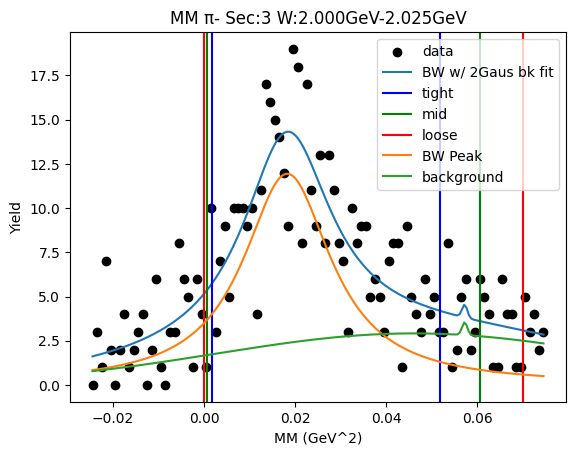

W bin: 25 2.025GeV-2.050GeV
background fit [1.42246501e+00 5.95252377e-02 8.44220388e-03 3.94091718e-01
 6.05002121e-02 1.66130168e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.010524111579504614 0.050530575356708664
Breit-Wigner Peak [2.17650903 0.14143278 0.10087508]
Gaus2 [2.33221131 0.05932374 0.022278  ]
Gaus3 [9.10342955e-01 4.50821726e-02 2.65336019e-04]
Cut Bounds [[1.16409733e-03 1.60176569e-04 7.75578615e-05]
 [6.18749177e-02 7.30131611e-02 8.50727064e-02]]
Cut Bounds Err [[3.73159659e-06 1.64611759e-06 1.32899338e-06]
 [2.72055405e-05 3.51448698e-05 4.40154381e-05]]


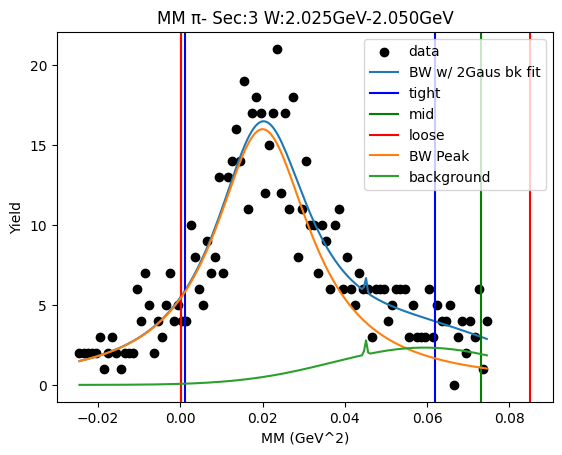

W bin: 26 2.050GeV-2.075GeV
background fit [1.85326596e+00 5.73682154e-02 8.97029123e-03 8.71994141e-01
 5.03828303e-02 8.80570357e-05]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.010940907982073502 0.04743974947561293
Breit-Wigner Peak [1.97533322 0.13509042 0.09864132]
Gaus2 [2.57671421 0.05848364 0.01904282]
Gaus3 [1.13335749e+00 4.84154104e-02 3.72254712e-04]
Cut Bounds [[9.09194050e-04 8.40032811e-05 1.39764035e-04]
 [5.76134355e-02 6.81290931e-02 7.95257021e-02]]
Cut Bounds Err [[5.81037050e-06 2.10381014e-06 3.15174736e-06]
 [4.62527352e-05 5.99135044e-05 7.51808857e-05]]


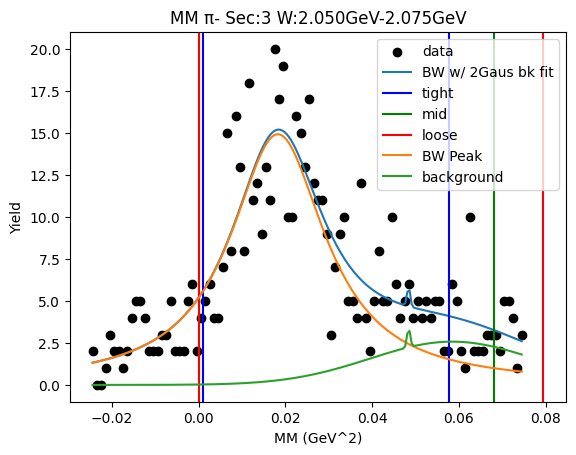

W bin: 27 2.075GeV-2.100GeV
background fit [1.02546710e+02 1.44584995e-01 2.90277524e-02 7.17487971e+00
 5.50032672e-02 2.48547335e-04]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.003033130091825041 0.0338405006563098
Breit-Wigner Peak [1.14025359 0.13578224 0.07165586]
Gaus2 [4.84042759 0.03589112 0.03205806]
Gaus3 [1.09681082e+02 5.50107760e-02 1.41077506e-04]
Cut Bounds [[0.00354651 0.00196308 0.00084453]
 [0.04494903 0.05164611 0.05880806]]
Cut Bounds Err [[5.93923892e-05 5.30169243e-05 4.05657191e-05]
 [2.11441505e-04 2.71934415e-04 3.38509468e-04]]


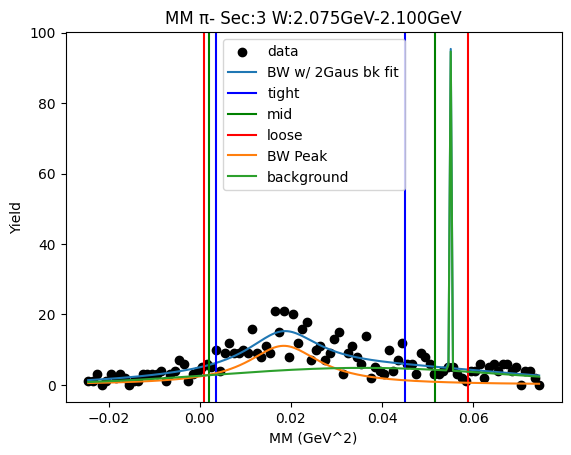

W bin: 28 2.100GeV-2.125GeV
background fit [2.40048739e+00 9.49044941e-02 2.86246312e-02 8.15335582e+01
 5.52401621e-02 8.77644915e-05]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
1.1375160123439781e-05 0.03818251524799354
Breit-Wigner Peak [1.57872368 0.1381917  0.07976125]
Gaus2 [4.12621522 0.04180028 0.02658122]
Gaus3 [8.15335578e+01 5.52166623e-02 8.20493081e-05]
Cut Bounds [[0.00284508 0.00132269 0.0003763 ]
 [0.04974867 0.05760699 0.06604131]]
Cut Bounds Err [[6.01567142e-05 4.92180462e-05 3.06261785e-05]
 [2.51551821e-04 3.24812452e-04 4.05728847e-04]]


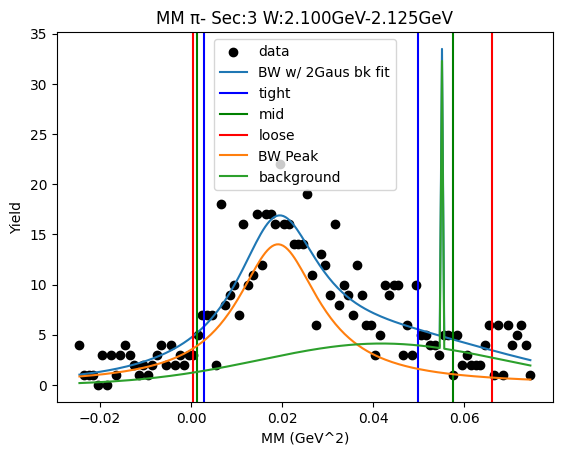

Value Error1.1
	Just skip it for now


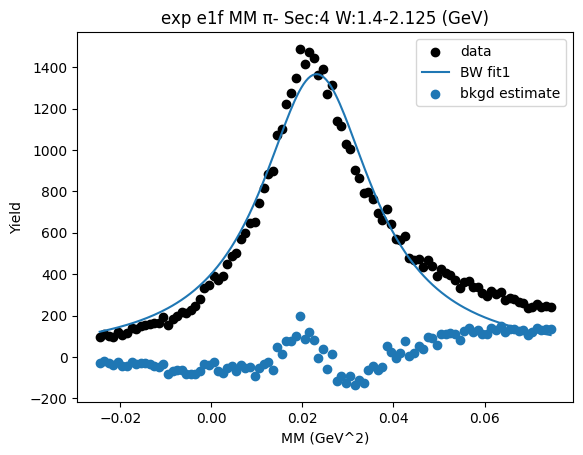

W bin: 1 1.425GeV-1.450GeV
Cut Bounds [[0.00664867 0.00470031 0.00308894]
 [0.04466671 0.05032196 0.0563142 ]]
Cut Bounds Err [[3.12655698e-06 3.14854255e-06 2.97435992e-06]
 [8.10384369e-06 1.03020865e-05 1.26998268e-05]]


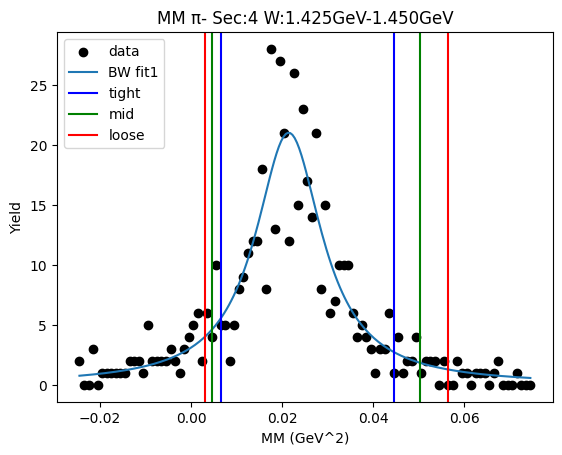

W bin: 2 1.450GeV-1.475GeV
Cut Bounds [[0.00879309 0.00684396 0.00513873]
 [0.04169932 0.04633143 0.05120745]]
Cut Bounds Err [[9.74096217e-07 1.02922389e-06 1.03923350e-06]
 [2.12126805e-06 2.67789803e-06 3.28058795e-06]]


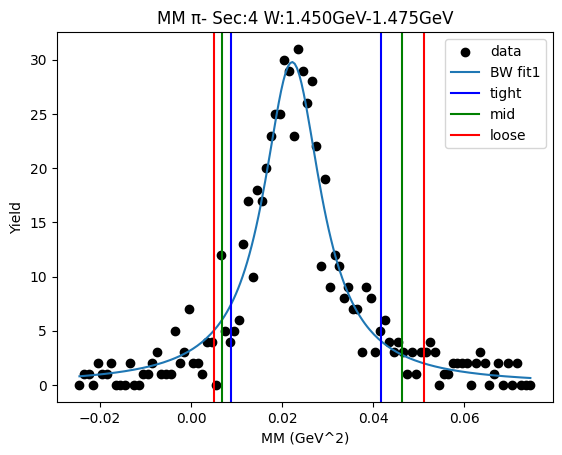

W bin: 3 1.475GeV-1.500GeV
Cut Bounds [[0.00651041 0.00451349 0.00288133]
 [0.04654053 0.05254964 0.0589235 ]]
Cut Bounds Err [[1.99456401e-06 1.98909044e-06 1.85199987e-06]
 [5.33285277e-06 6.78708004e-06 8.37507898e-06]]


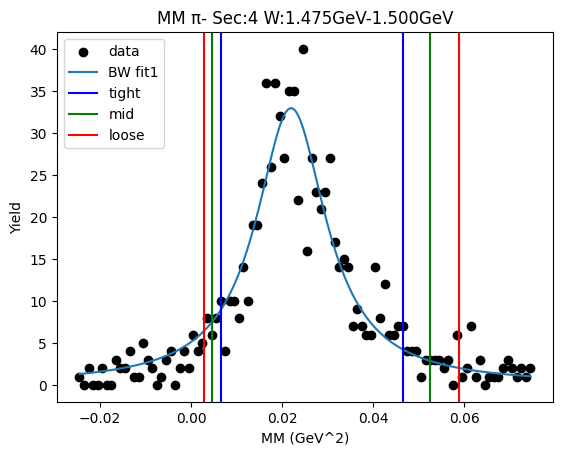

W bin: 4 1.500GeV-1.525GeV
Cut Bounds [[0.00820165 0.00612954 0.00435862]
 [0.04548777 0.05087289 0.05655919]]
Cut Bounds Err [[1.59584193e-06 1.65231259e-06 1.62364046e-06]
 [3.75825873e-06 4.76015935e-06 5.84880583e-06]]


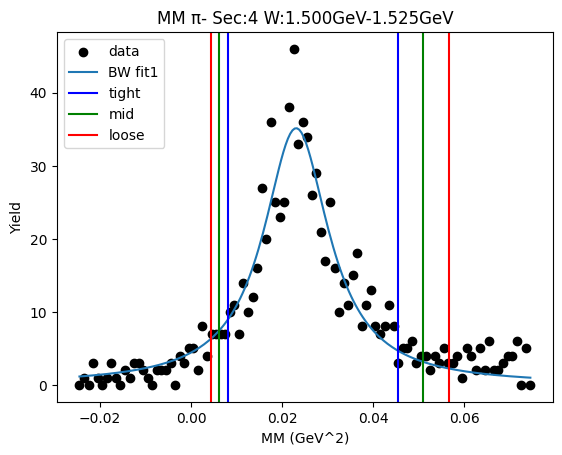

W bin: 5 1.525GeV-1.550GeV
Cut Bounds [[0.00718594 0.00509648 0.00336509]
 [0.04777397 0.05380212 0.06018833]]
Cut Bounds Err [[1.51792262e-06 1.53107334e-06 1.44978886e-06]
 [3.91384459e-06 4.97462644e-06 6.13144321e-06]]


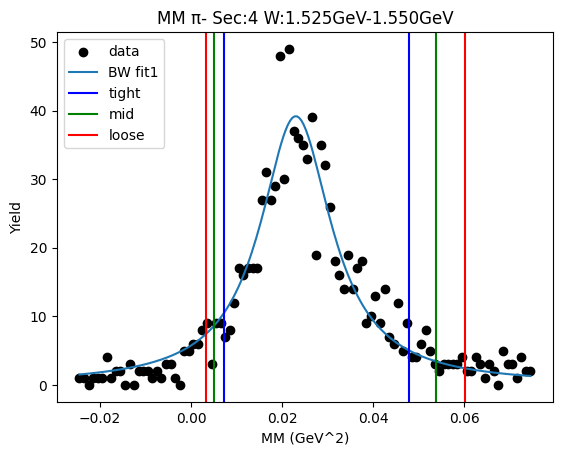

W bin: 6 1.550GeV-1.575GeV
Cut Bounds [[0.00646369 0.00431616 0.00260078]
 [0.05170758 0.05860882 0.06594223]]
Cut Bounds Err [[1.90159333e-06 1.86122091e-06 1.68367634e-06]
 [5.37841907e-06 6.85852777e-06 8.47790399e-06]]


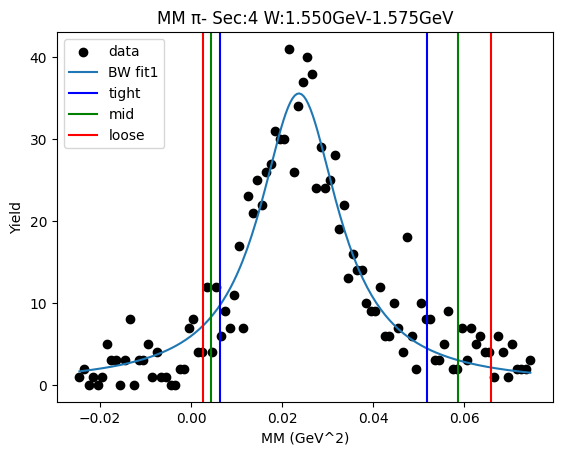

W bin: 7 1.575GeV-1.600GeV
Cut Bounds [[0.0069347  0.00477635 0.00301922]
 [0.05058537 0.05715716 0.06413017]]
Cut Bounds Err [[1.95563798e-06 1.94395745e-06 1.80110341e-06]
 [5.28186372e-06 6.72471896e-06 8.30085058e-06]]


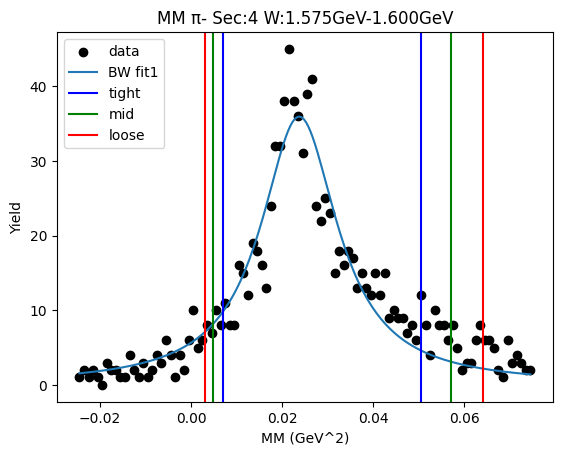

W bin: 8 1.600GeV-1.625GeV
Cut Bounds [[0.00648117 0.00444262 0.00278786]
 [0.04797552 0.05423584 0.06087995]]
Cut Bounds Err [[1.35161586e-06 1.34030933e-06 1.23728793e-06]
 [3.67736270e-06 4.68304981e-06 5.78192207e-06]]


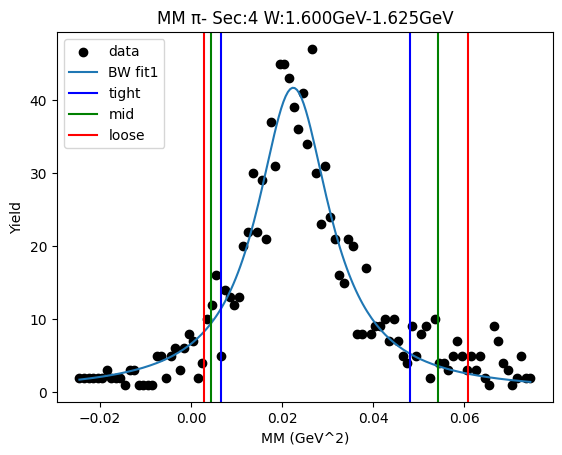

W bin: 9 1.625GeV-1.650GeV
Cut Bounds [[0.00559306 0.00360829 0.00205674]
 [0.04926803 0.05601825 0.0632017 ]]
Cut Bounds Err [[2.01255575e-06 1.93617651e-06 1.70349561e-06]
 [5.97317985e-06 7.62884503e-06 9.44311267e-06]]


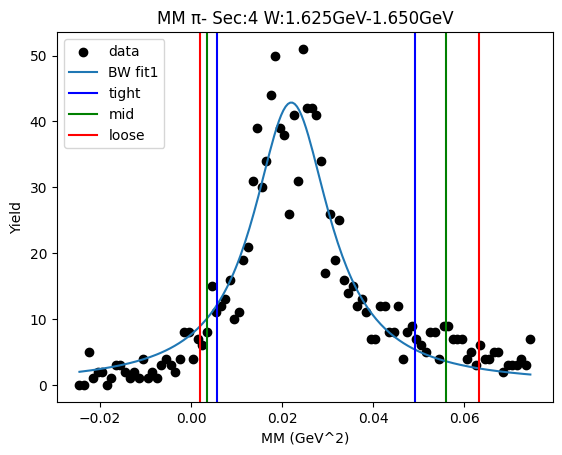

W bin: 10 1.650GeV-1.675GeV
Cut Bounds [[0.00575191 0.00372985 0.00214403]
 [0.04996563 0.05678631 0.06404323]]
Cut Bounds Err [[1.61033618e-06 1.55320272e-06 1.37231882e-06]
 [4.74619980e-06 6.06043936e-06 7.50025871e-06]]


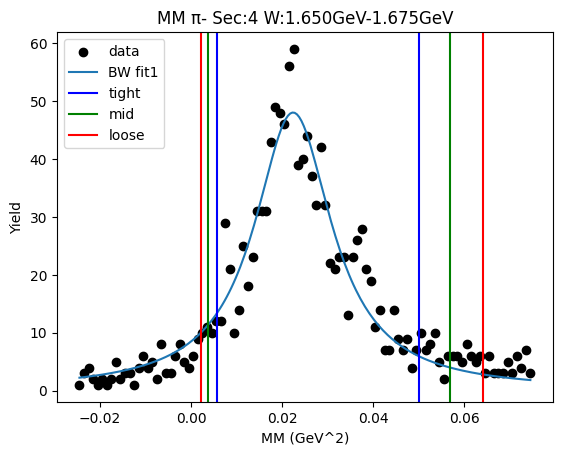

W bin: 11 1.675GeV-1.700GeV
Cut Bounds [[0.00423267 0.00232491 0.00098443]
 [0.05451079 0.06265865 0.0713738 ]]
Cut Bounds Err [[1.42790547e-06 1.26765124e-06 9.61317441e-07]
 [5.12428736e-06 6.58092871e-06 8.18546029e-06]]


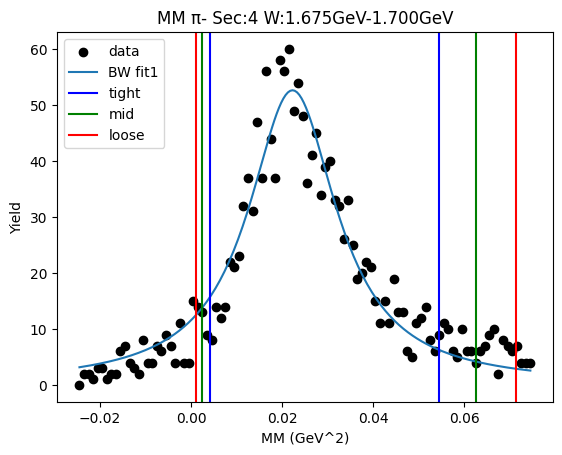

W bin: 12 1.700GeV-1.725GeV
Cut Bounds [[0.00492803 0.0029192  0.00143332]
 [0.05377937 0.06154079 0.06982518]]
Cut Bounds Err [[1.37076064e-06 1.26371804e-06 1.03195468e-06]
 [4.52827291e-06 5.80229961e-06 7.20269922e-06]]


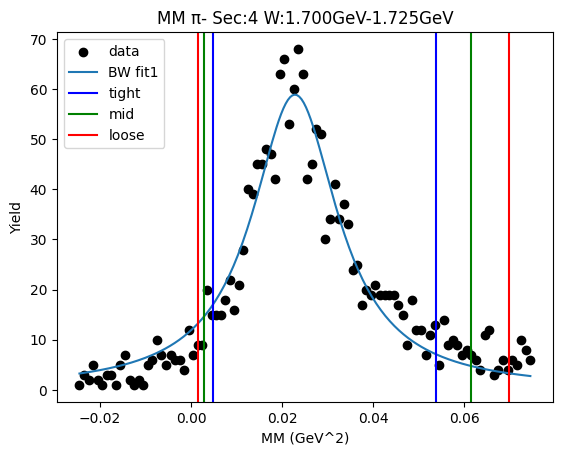

W bin: 13 1.725GeV-1.750GeV
Cut Bounds [[0.00390973 0.00201232 0.00073929]
 [0.05722486 0.06599048 0.07538048]]
Cut Bounds Err [[1.47879752e-06 1.27087553e-06 8.97736821e-07]
 [5.65753990e-06 7.27771303e-06 9.06503815e-06]]


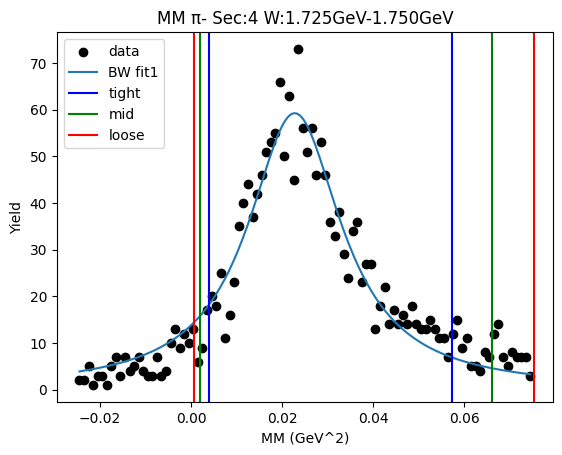

W bin: 14 1.750GeV-1.775GeV
Cut Bounds [[0.00329002 0.00146616 0.0003695 ]
 [0.0615242  0.07134718 0.08189735]]
Cut Bounds Err [[2.30468575e-06 1.84309808e-06 1.07836053e-06]
 [9.96633862e-06 1.28571949e-05 1.60544157e-05]]


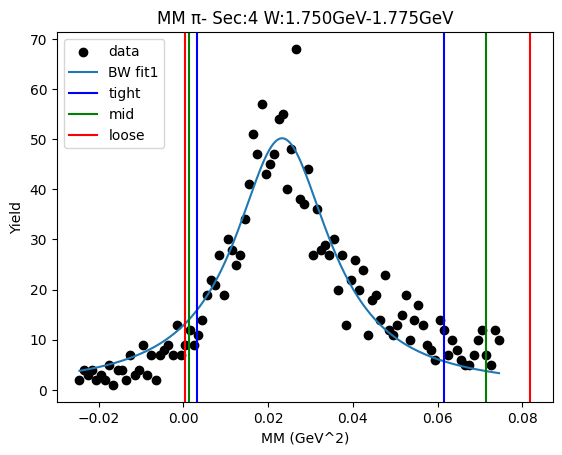

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[2.41804091e-03 8.13787423e-04 6.20997546e-05]
 [6.53516960e-02 7.63341735e-02 8.81692169e-02]]
Cut Bounds Err [[2.34582440e-06 1.63040105e-06 5.24933038e-07]
 [1.21952893e-05 1.57905939e-05 1.97795978e-05]]


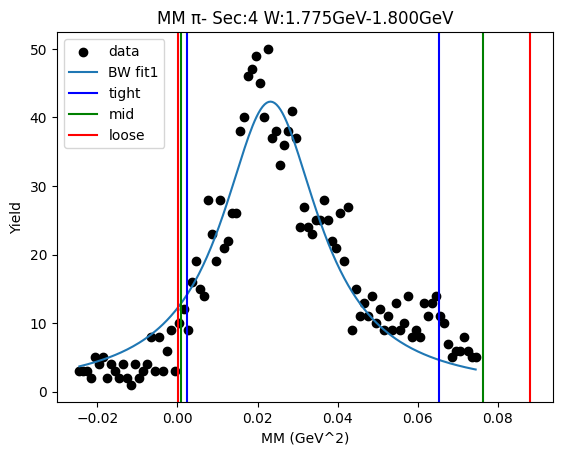

W bin: 16 1.800GeV-1.825GeV
Cut Bounds [[0.0028126  0.00110557 0.00018134]
 [0.06293732 0.07325523 0.08435594]]
Cut Bounds Err [[2.14983397e-06 1.61473597e-06 7.62188222e-07]
 [1.01696225e-05 1.31440235e-05 1.64390444e-05]]


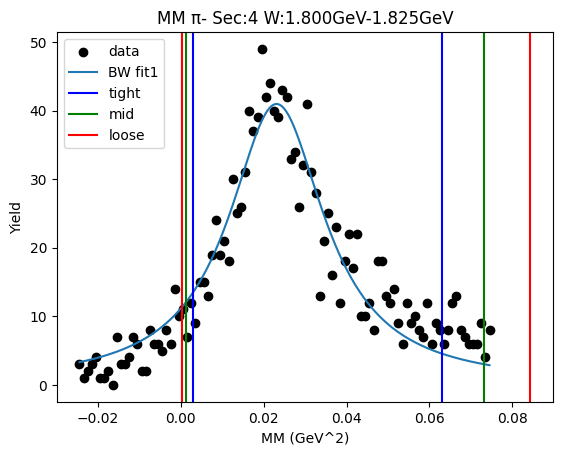

W bin: 17 1.825GeV-1.850GeV
Cut Bounds [[2.04906449e-03 5.95151619e-04 1.24246765e-05]
 [6.45034196e-02 7.55403777e-02 8.74485218e-02]]
Cut Bounds Err [[2.49579124e-06 1.61147077e-06 2.71376934e-07]
 [1.40030233e-05 1.81550814e-05 2.27670427e-05]]


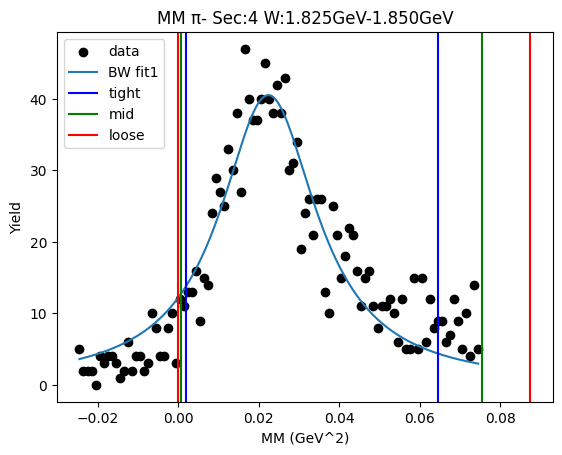

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[0.00346648 0.0016293  0.00047753]
 [0.05953549 0.06891211 0.07897414]]
Cut Bounds Err [[2.17409517e-06 1.78553839e-06 1.12658120e-06]
 [9.00994749e-06 1.16122506e-05 1.44879267e-05]]


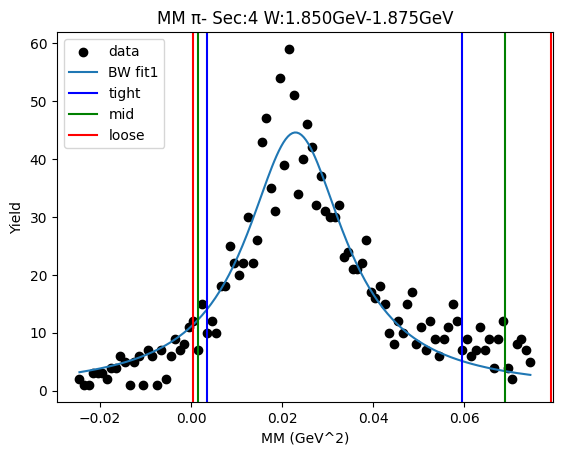

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[1.52172242e-03 2.73003248e-04 3.55650127e-05]
 [6.96293660e-02 8.20021755e-02 9.53862660e-02]]
Cut Bounds Err [[2.63378625e-06 1.33662094e-06 5.62312606e-07]
 [1.78159517e-05 2.31652526e-05 2.91211995e-05]]


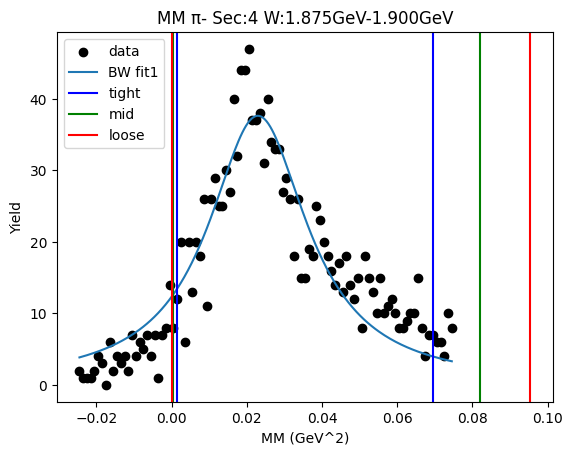

W bin: 20 1.900GeV-1.925GeV
background fit [4.40165973e-01 3.00902765e-02 3.24161516e+01 3.37198791e+00
 6.01842559e-02 7.45702134e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.01338681988014718 0.0272782262573286
Breit-Wigner Peak [2.16611706 0.14259216 0.04811688]
Gaus2 [13.97785436  0.033152    0.02632399]
Gaus3 [1.74596717e+01 3.15613213e-02 1.10628122e-03]
Cut Bounds [[0.00835469 0.00658798 0.00503088]
 [0.03755082 0.04162333 0.04590546]]
Cut Bounds Err [[7.51093041e-06 8.00187313e-06 8.15694816e-06]
 [1.59234917e-05 2.01133338e-05 2.46398350e-05]]


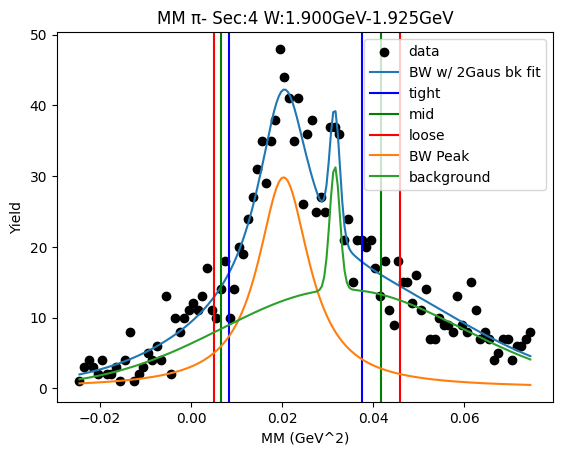

W bin: 21 1.925GeV-1.950GeV
background fit [3.23017914e+00 6.12113050e-02 8.02207305e-03 3.02833288e+00
 3.00157741e-02 2.76743280e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.0063170811985386426 0.050970226922607886
Breit-Wigner Peak [4.179608   0.14942079 0.09771328]
Gaus2 [5.15186981 0.04956227 0.02211251]
Gaus3 [3.02833288e+00 3.00157741e-02 2.76743280e-07]
Cut Bounds [[2.06756597e-03 6.09123943e-04 1.51350356e-05]
 [6.41969077e-02 7.51643340e-02 8.69962135e-02]]
Cut Bounds Err [[5.64225853e-06 3.66822532e-06 6.73840402e-07]
 [3.14398416e-05 4.07482607e-05 5.10875998e-05]]


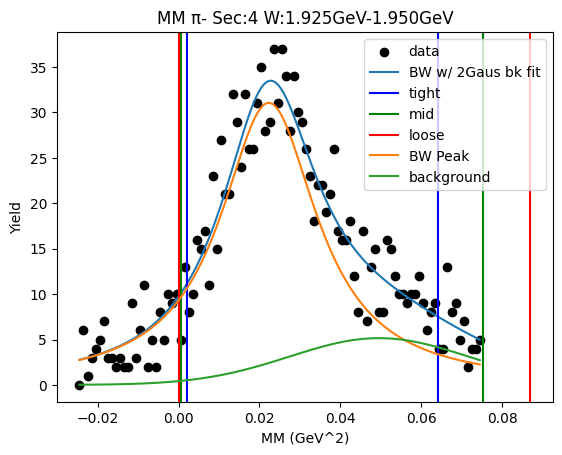

W bin: 22 1.950GeV-1.975GeV
background fit [5.51132389e+00 5.85093551e-02 7.24369601e-03 3.02833288e+00
 3.00157741e-02 2.76743280e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-8.755412198743068e-06 0.04381155536556558
Breit-Wigner Peak [4.02731009 0.14799122 0.08545985]
Gaus2 [7.00961858 0.05755468 0.01146907]
Gaus3 [3.02833288e+00 3.00157741e-02 2.76743280e-07]
Cut Bounds [[0.00325773 0.00151271 0.00042893]
 [0.05707605 0.0660947  0.07577458]]
Cut Bounds Err [[2.82358503e-06 2.30382466e-06 1.42933717e-06]
 [1.18187240e-05 1.52284340e-05 1.89978249e-05]]


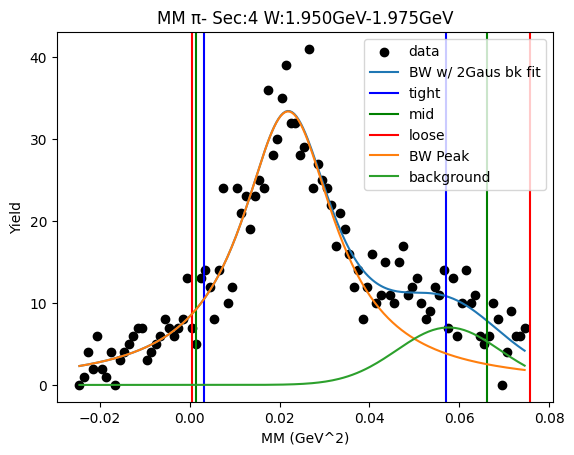

W bin: 23 1.975GeV-2.000GeV
background fit [3.40497591e+00 5.66209124e-02 7.80552416e-03 3.02833288e+00
 3.00157741e-02 2.76743280e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.0034255568309481225 0.03963082139443015
Breit-Wigner Peak [3.12377887 0.14672488 0.07768018]
Gaus2 [7.10458286 0.04162942 0.02535593]
Gaus3 [3.02833288e+00 3.00157741e-02 2.76743280e-07]
Cut Bounds [[0.00410706 0.00226183 0.00096292]
 [0.05260755 0.06046242 0.06886361]]
Cut Bounds Err [[4.43814576e-05 3.95210487e-05 3.00836057e-05]
 [1.58839991e-04 2.04334346e-04 2.54407078e-04]]


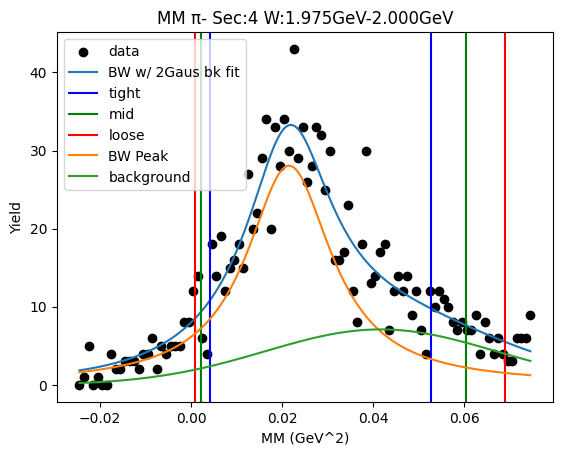

W bin: 24 2.000GeV-2.025GeV
background fit [4.03715557e+00 5.05243769e-02 6.64564526e-03 3.02833288e+00
 3.00157741e-02 2.76743280e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.001283280047423431 0.03771283924453194
Breit-Wigner Peak [3.12279249 0.13963545 0.07792043]
Gaus2 [7.39027292 0.04422321 0.01632711]
Gaus3 [3.02833288e+00 3.00157741e-02 2.76743280e-07]
Cut Bounds [[0.00321958 0.00161303 0.00055619]
 [0.04951939 0.0571728  0.06537592]]
Cut Bounds Err [[4.28982357e-06 3.61892315e-06 2.46894451e-06]
 [1.68239195e-05 2.15453049e-05 2.67674727e-05]]


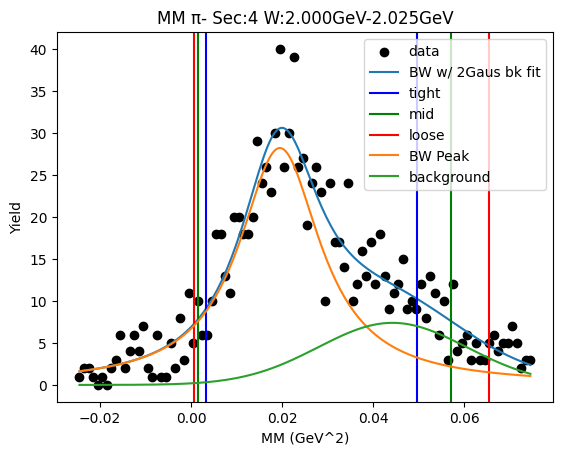

W bin: 25 2.025GeV-2.050GeV
background fit [2.77600140e+00 6.22425137e-02 9.14309401e-03 3.02833288e+00
 3.00157741e-02 2.76743280e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.00342443984616439 0.04678400985351721
Breit-Wigner Peak [3.44271872 0.14724057 0.09147718]
Gaus2 [4.77133453 0.04921251 0.02365063]
Gaus3 [3.02833288e+00 3.00157741e-02 2.76743280e-07]
Cut Bounds [[0.00249245 0.00092788 0.00012096]
 [0.05980799 0.06970653 0.08036271]]
Cut Bounds Err [[2.91337383e-05 2.13291985e-05 8.98388809e-06]
 [1.42712764e-04 1.84869160e-04 2.31568591e-04]]


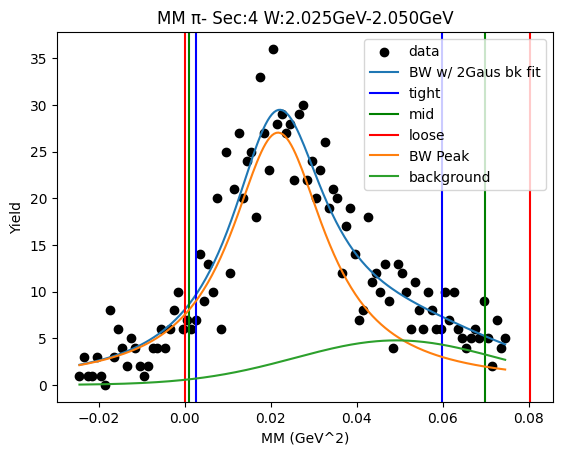

W bin: 26 2.050GeV-2.075GeV
background fit [1.03895626e+00 6.16167091e-02 1.73735927e-02 3.02833288e+00
 3.00157741e-02 2.76743280e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.013916704100968093 0.0285499800015664
Breit-Wigner Peak [1.35187807 0.14571665 0.04938501]
Gaus2 [12.86131959  0.03000035  0.02234405]
Gaus3 [3.02833288e+00 3.00157741e-02 2.76743280e-07]
Cut Bounds [[0.0086824  0.00683465 0.00520772]
 [0.03930461 0.0435813  0.0480788 ]]
Cut Bounds Err [[3.89874417e-05 4.15031584e-05 4.22625120e-05]
 [8.29519386e-05 1.04802834e-04 1.28412852e-04]]


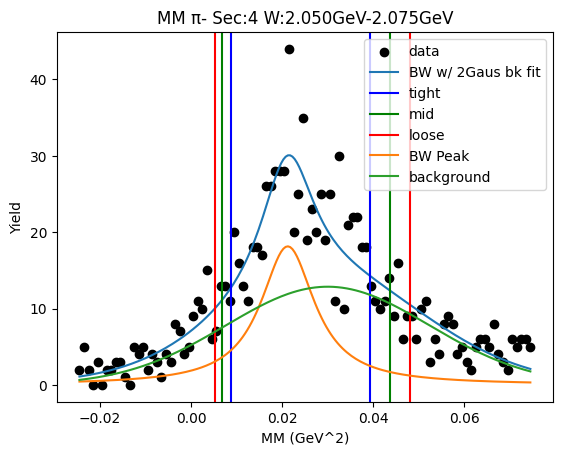

W bin: 27 2.075GeV-2.100GeV
background fit [2.23110808e+00 5.98316089e-02 9.75411904e-03 3.02833288e+00
 3.00157741e-02 2.76743280e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
0.0007309104046768905 0.04410090046434739
Breit-Wigner Peak [3.01117105 0.14971942 0.0850196 ]
Gaus2 [3.95258071 0.05263815 0.02519145]
Gaus3 [3.02833288e+00 3.00157741e-02 2.76743280e-07]
Cut Bounds [[0.00351329 0.0016961  0.00053336]
 [0.05767961 0.06669568 0.0763662 ]]
Cut Bounds Err [[6.73574758e-05 5.61598566e-05 3.67408455e-05]
 [2.72922750e-04 3.52167097e-04 4.39634046e-04]]


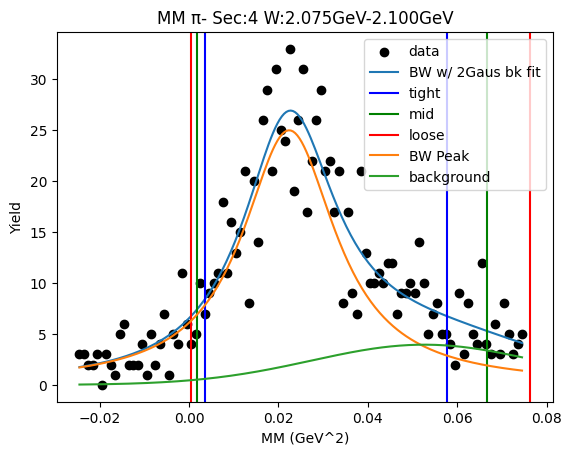

W bin: 28 2.100GeV-2.125GeV
background fit [1.81589031e+00 6.14045643e-02 1.32104921e-02 3.02833288e+00
 3.00157741e-02 2.76743280e-07]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.009857281127233036 0.04568975060401692
Breit-Wigner Peak [2.56249315 0.13385154 0.09621766]
Gaus2 [5.91235049 0.0422835  0.02387996]
Gaus3 [3.02833288e+00 3.00157741e-02 2.76743280e-07]
Cut Bounds [[9.91766486e-04 1.21451004e-04 8.93282441e-05]
 [5.57955211e-02 6.58859565e-02 7.68145846e-02]]
Cut Bounds Err [[9.69412357e-05 4.07080913e-05 4.07303762e-05]
 [7.27115673e-04 9.48149048e-04 1.19438920e-03]]


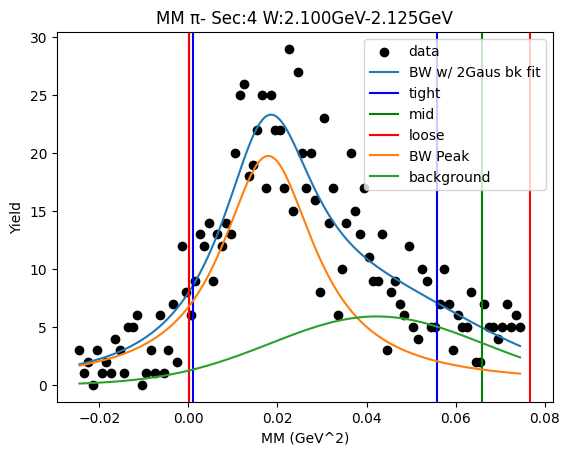

Value Error1.1
	Just skip it for now


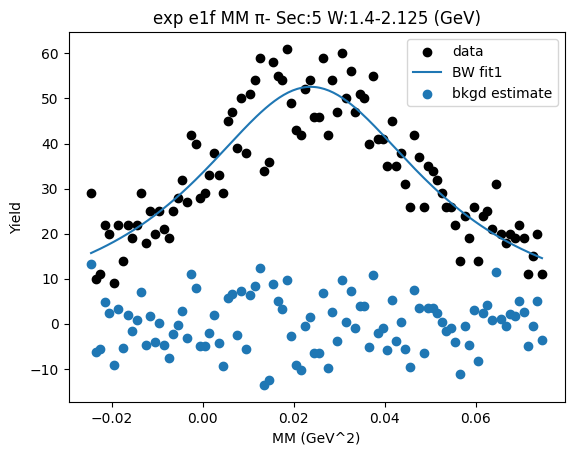

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


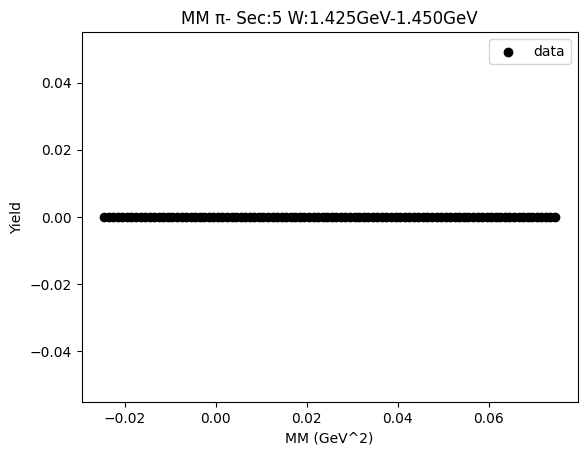

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


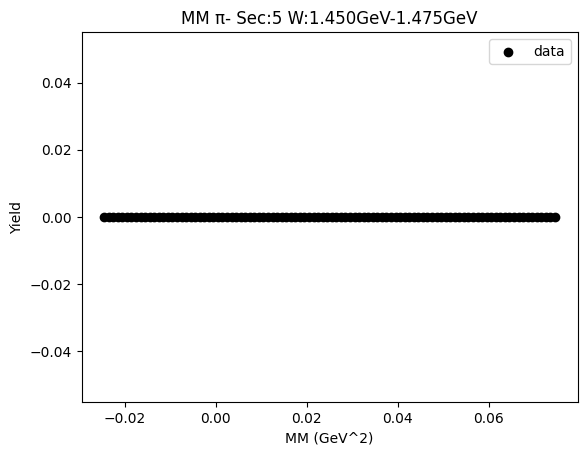

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


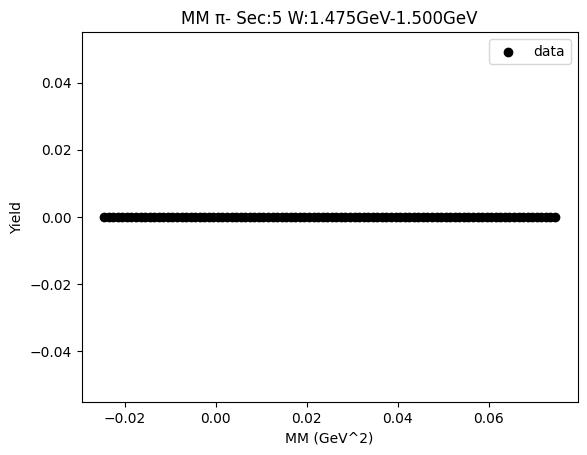

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


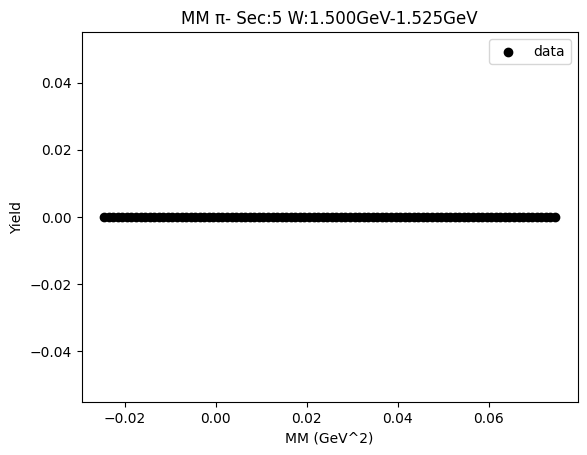

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


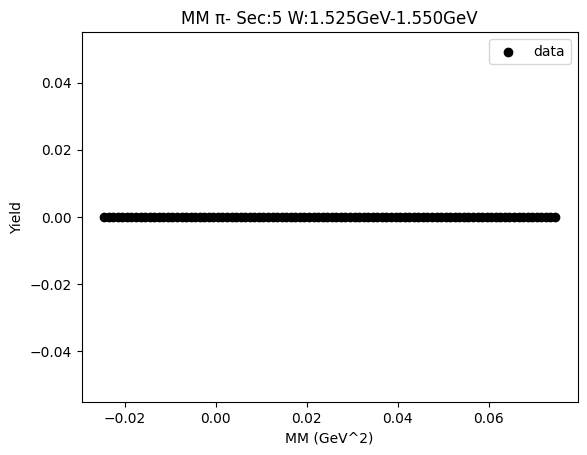

W bin: 6 1.550GeV-1.575GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


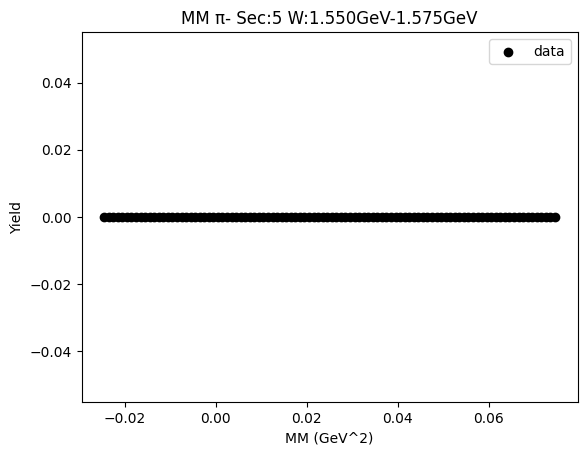

W bin: 7 1.575GeV-1.600GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


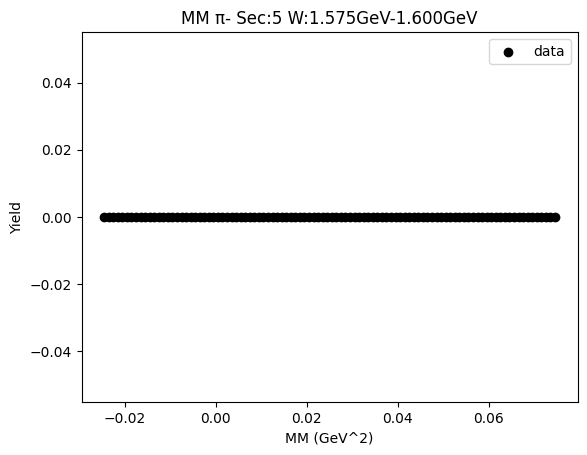

W bin: 8 1.600GeV-1.625GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


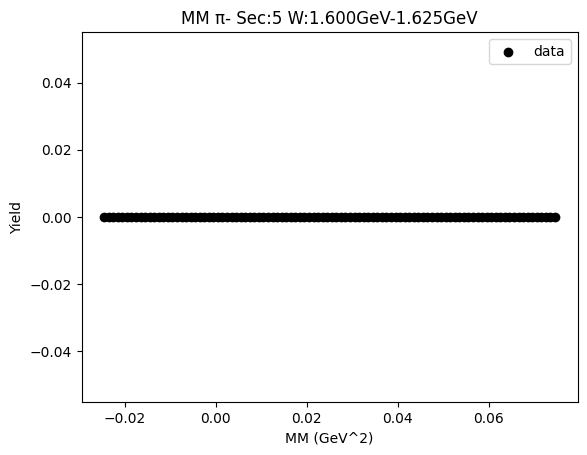

W bin: 9 1.625GeV-1.650GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


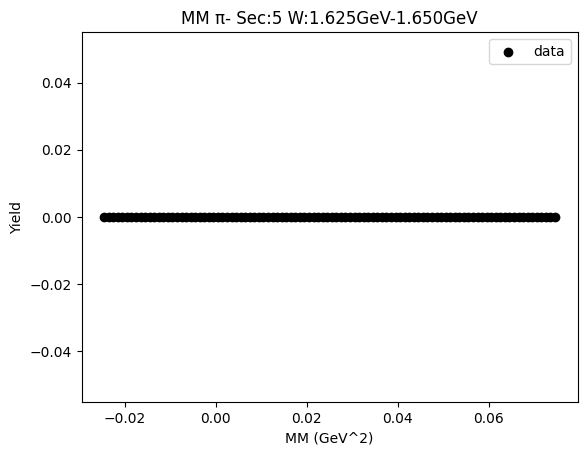

W bin: 10 1.650GeV-1.675GeV
Cut Bounds [[2.13896954e-05 3.29855970e-05 4.70831776e-05]
 [4.30230299e-05 5.89455983e-05 7.73698458e-05]]
Cut Bounds Err [[ 75438.23049463 112417.16081917 156693.18588559]
 [106989.1380522  150278.24988826 200864.45646619]]


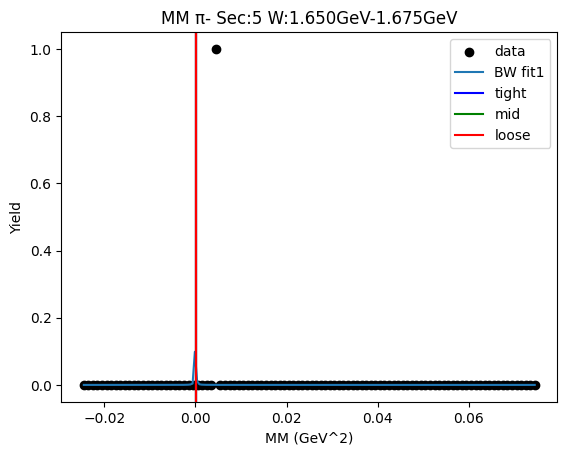

W bin: 11 1.675GeV-1.700GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


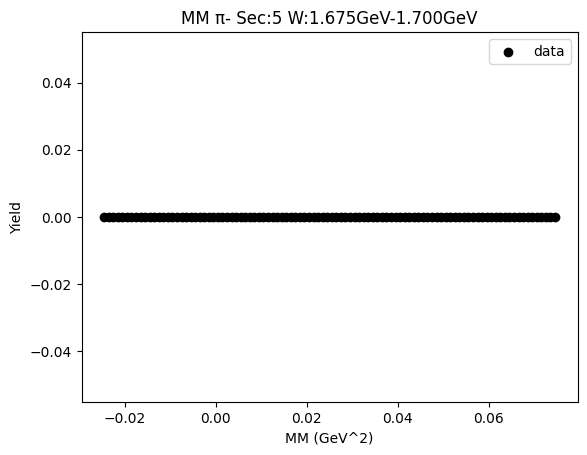

W bin: 12 1.700GeV-1.725GeV
Cut Bounds [[0.03884468 0.03884023 0.03883578]
 [0.03888921 0.03889366 0.03889811]]
Cut Bounds Err [[0.00141539 0.00169837 0.00198131]
 [0.0014162  0.00169953 0.0019829 ]]


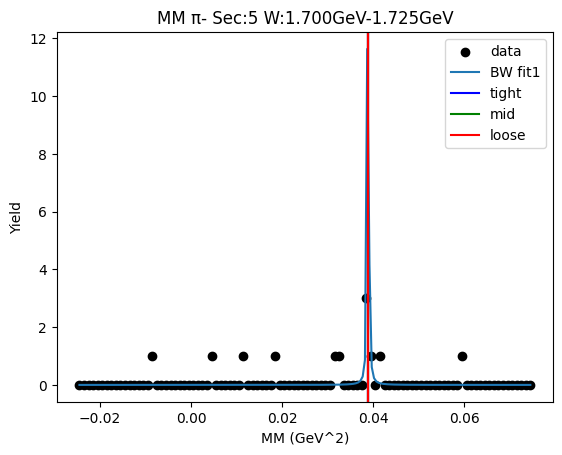

W bin: 13 1.725GeV-1.750GeV
Cut Bounds [[0.00100828 0.00100813 0.00100798]
 [0.00100983 0.00100998 0.00101013]]
Cut Bounds Err [[43793.99841647 52548.7824773  61302.2279973 ]
 [43827.46193707 52596.96994696 61367.81649767]]


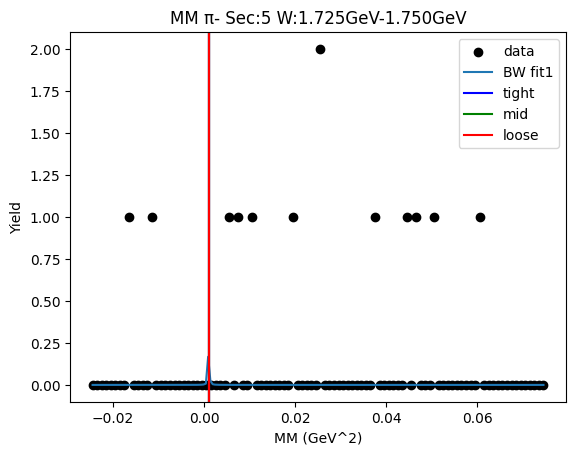

W bin: 14 1.750GeV-1.775GeV
Cut Bounds [[0.00096937 0.00096922 0.00096906]
 [0.00097093 0.00097108 0.00097124]]
Cut Bounds Err [[ 7441.73137446  8929.36117188 10416.75214348]
 [ 7447.70202006  8937.95890154 10428.45460885]]


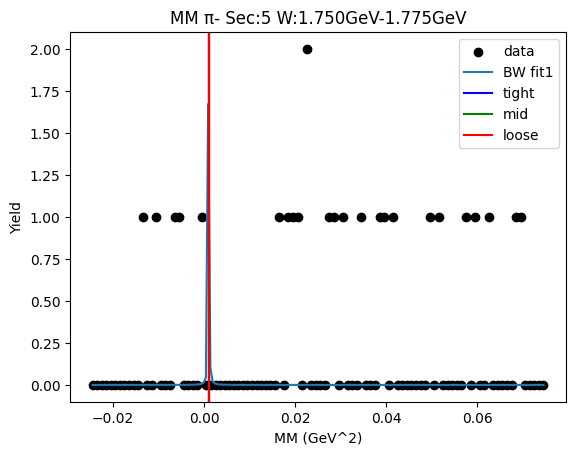

W bin: 15 1.775GeV-1.800GeV
Cut Bounds [[7.61545611e-05 1.11229029e-04 1.52927272e-04]
 [8.97175503e-05 1.27504616e-04 1.71915457e-04]]
Cut Bounds Err [[ 654039.07863149  948519.04743018 1297556.40058634]
 [ 709895.53030517 1015546.78943861 1375755.4329295 ]]


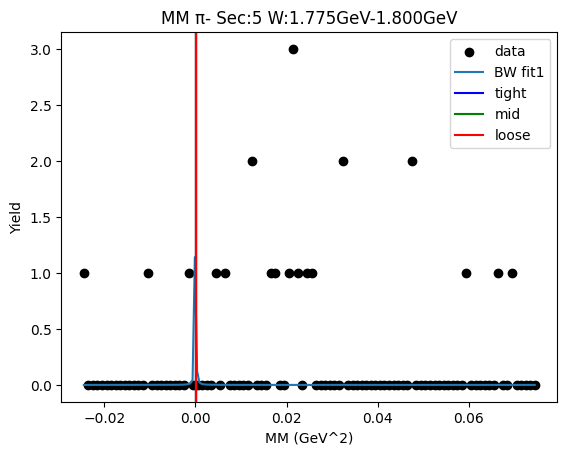

W bin: 16 1.800GeV-1.825GeV
Cut Bounds [[0.00097753 0.00097306 0.0009686 ]
 [0.00102283 0.00102742 0.00103201]]
Cut Bounds Err [[0.11451968 0.13710882 0.15959302]
 [0.11714304 0.14088645 0.16473479]]


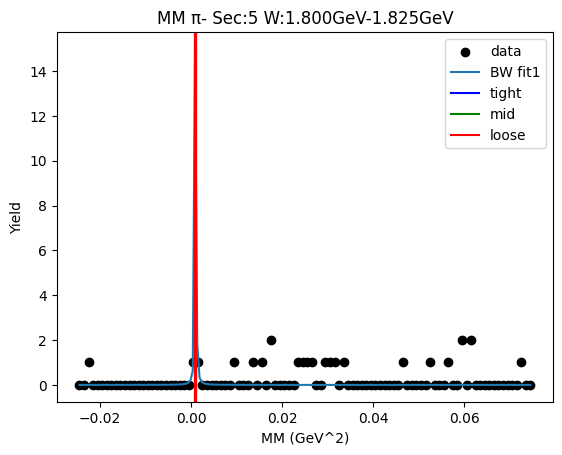

W bin: 17 1.825GeV-1.850GeV
Cut Bounds [[0.00018795 0.00018646 0.00018498]
 [0.00020316 0.00020471 0.00020627]]
Cut Bounds Err [[27.43701393 32.79377188 38.10698155]
 [28.52572089 34.36150991 40.2408472 ]]


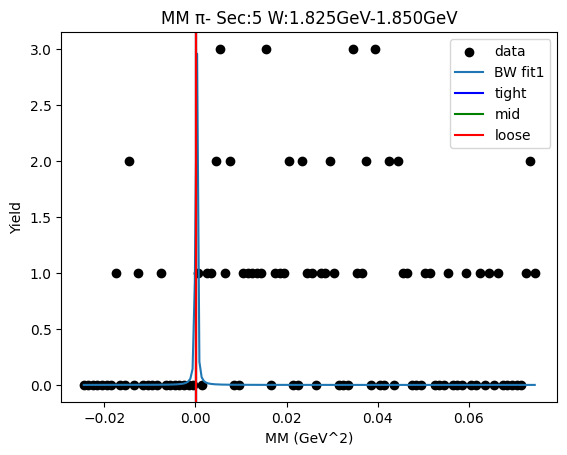

W bin: 18 1.850GeV-1.875GeV
Cut Bounds [[4.47720507e-05 6.63752175e-05 9.22177129e-05]
 [6.19034558e-05 8.69329037e-05 1.16201680e-04]]
Cut Bounds Err [[278865.79778805 407451.55885104 560308.18708248]
 [327905.88142346 466299.65921353 628964.30417206]]


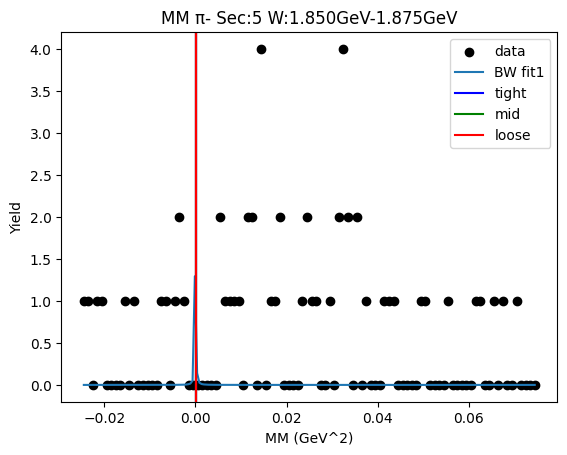

W bin: 19 1.875GeV-1.900GeV
Cut Bounds [[0.00711131 0.01726461 0.03184837]
 [0.14925409 0.18783594 0.23084826]]
Cut Bounds Err [[0.00075988 0.00142002 0.00224937]
 [0.00348125 0.00468387 0.00605593]]


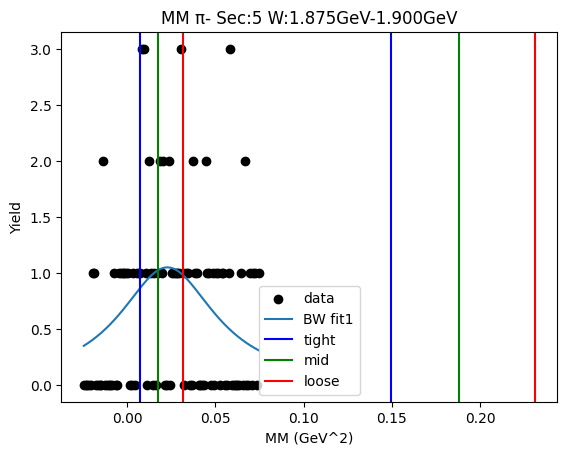

W bin: 20 1.900GeV-1.925GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[1.61344889e-05 3.13085234e-05 5.14666782e-05]
 [1.38520766e-04 1.78172056e-04 2.22807466e-04]]
Cut Bounds Err [[ 25.24506063  42.19988917  63.123324  ]
 [ 73.97009588 100.66993279 131.33837569]]


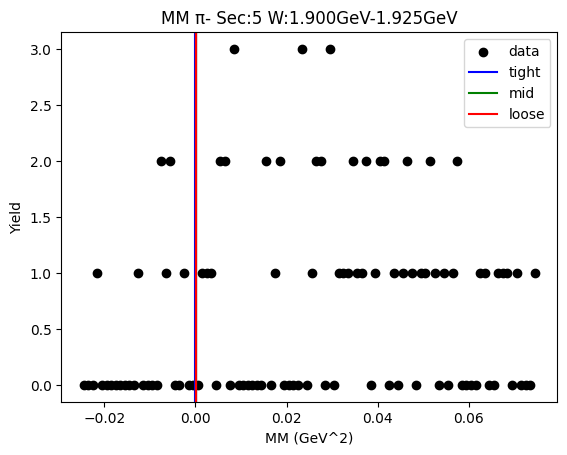

W bin: 21 1.925GeV-1.950GeV
Runtime Error2.2
	Just skip it for now
Cut Bounds [[8.66144501e-06 1.24394916e-03 4.56925891e-03]
 [1.02606996e-01 1.24361951e-01 1.48206927e-01]]
Cut Bounds Err [[7.02127384e-06 1.00865670e-04 2.25389638e-04]
 [7.64203852e-04 1.00852304e-03 1.28364612e-03]]


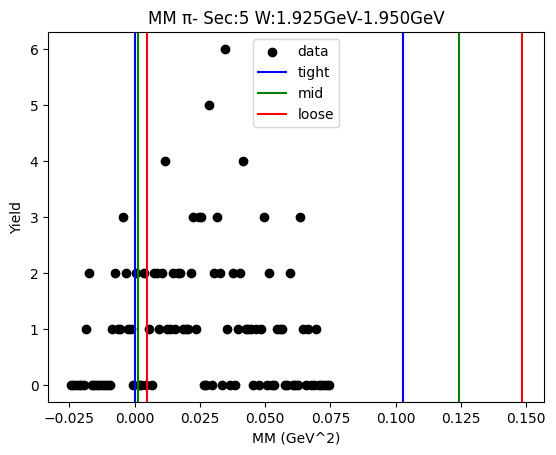

W bin: 22 1.950GeV-1.975GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.02295138 0.04242055 0.06782266]
 [0.15457197 0.20036525 0.25209148]]
Cut Bounds Err [[0.54455983 0.65349741 0.76243896]
 [0.54479093 0.65374276 0.76270113]]


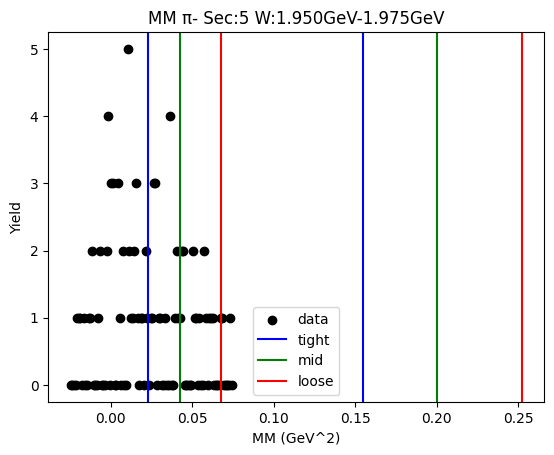

W bin: 23 1.975GeV-2.000GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


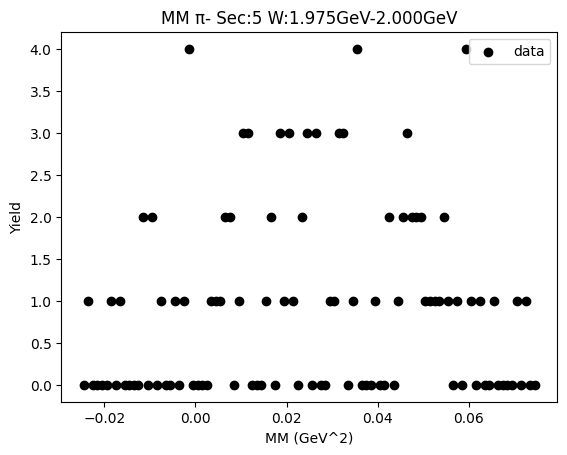

W bin: 24 2.000GeV-2.025GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[1.22567665e-05 6.46795441e-04 2.95558728e-03]
 [8.57507940e-02 1.03533040e-01 1.22989539e-01]]
Cut Bounds Err [[0.28930156 0.34716785 0.40503416]
 [0.28936197 0.34722858 0.40509527]]


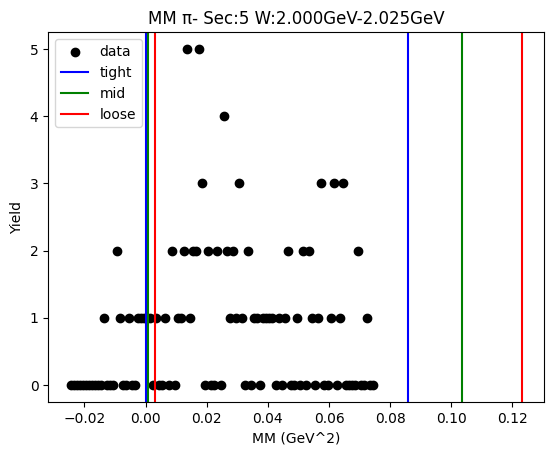

W bin: 25 2.025GeV-2.050GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[4.51788399e-04 3.98567046e-05 1.14797284e-03]
 [8.81737362e-02 1.05306194e-01 1.23958700e-01]]
Cut Bounds Err [[0.27566783 0.33080489 0.38594196]
 [0.27570303 0.33084019 0.38597737]]


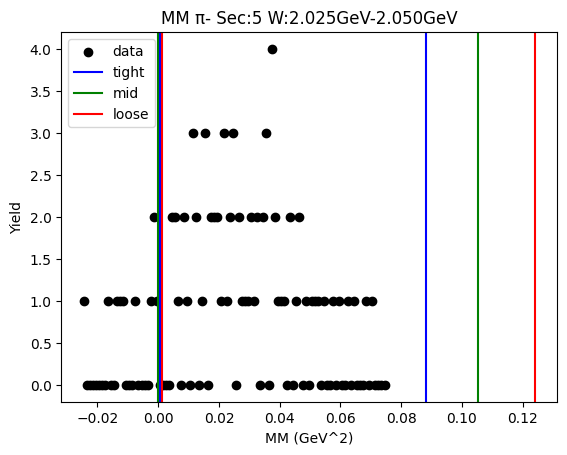

W bin: 26 2.050GeV-2.075GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[0.00644144 0.01566021 0.02890779]
 [0.13583869 0.17093691 0.21006394]]
Cut Bounds Err [[0.44877506 0.53853974 0.62830469]
 [0.44887224 0.53863856 0.62840545]]


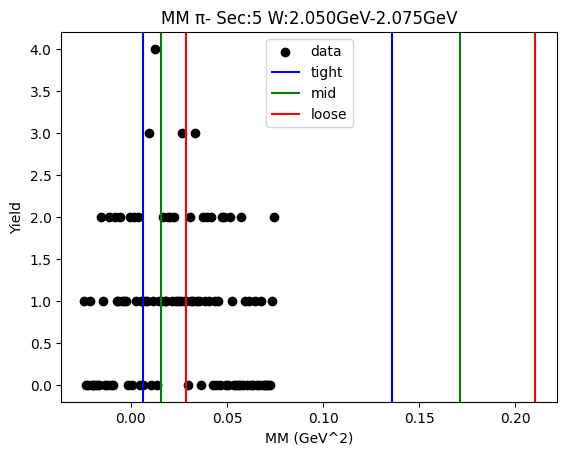

W bin: 27 2.075GeV-2.100GeV
background fit [3.23665540e+00 1.66964075e+00 2.32228327e-02 6.57339826e-01
 5.36187471e-02 1.29570560e-03]
[[0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.03, 0.0], [inf, inf, inf, inf, inf, inf, inf, inf, inf]]
-0.09130472067886483 0.12483785328165564
Breit-Wigner Peak [0.21855678 0.12948578 0.18979927]
Gaus2 [8.30679254 0.27279265 0.07308353]
Gaus3 [0.72480286 0.05356954 0.00133961]
Cut Bounds [[0.00524586 0.01272636 0.0234684 ]
 [0.10982589 0.13822239 0.16988043]]
Cut Bounds Err [[0.00298394 0.00556142 0.00879584]
 [0.01365317 0.01832832 0.02366505]]


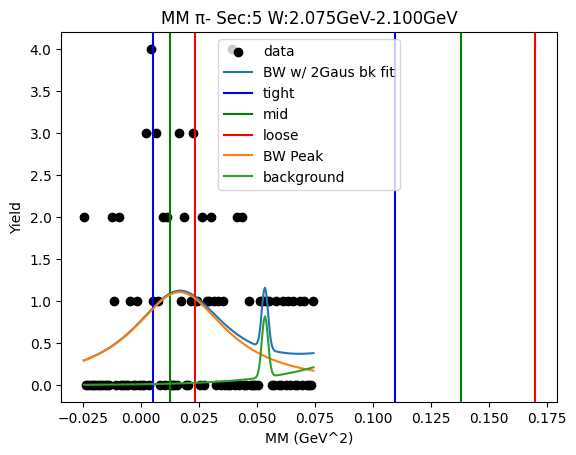

W bin: 28 2.100GeV-2.125GeV
Runtime Error2.2
	Just skip it for now
Cut Bounds [[6.11487206e-04 1.10229341e-04 2.09089448e-03]
 [1.42129831e-01 1.69932242e-01 2.00216576e-01]]
Cut Bounds Err [[1.14658005e-04 5.83646483e-05 2.96400010e-04]
 [1.74804783e-03 2.29160184e-03 2.90042854e-03]]


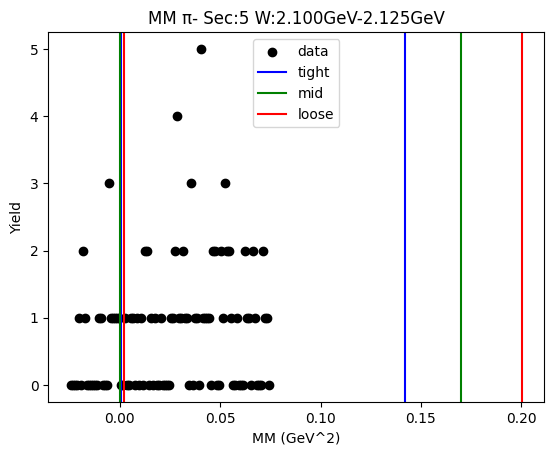

Value Error1.1
	Just skip it for now


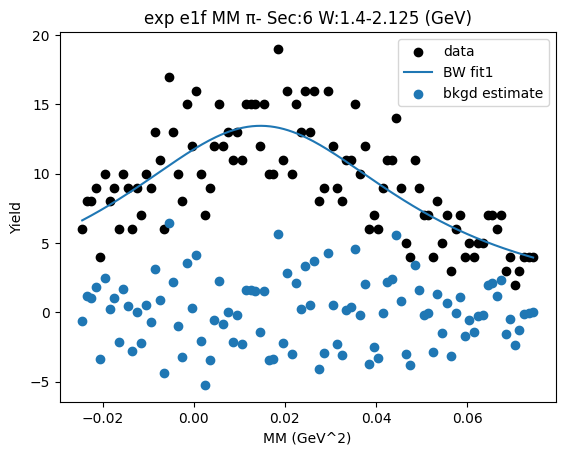

W bin: 1 1.425GeV-1.450GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


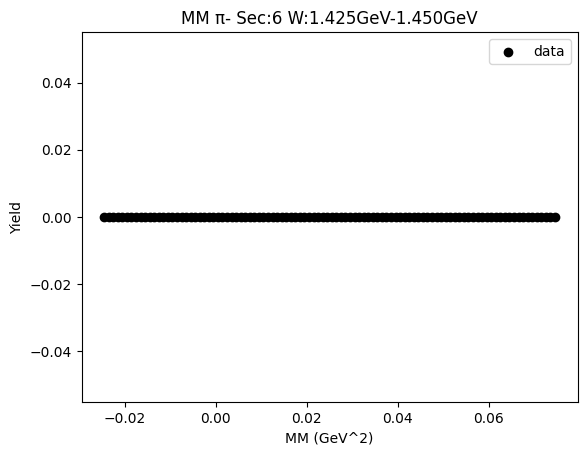

W bin: 2 1.450GeV-1.475GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


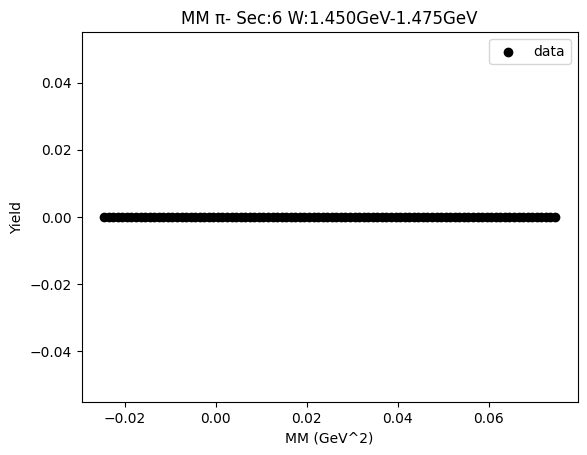

W bin: 3 1.475GeV-1.500GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


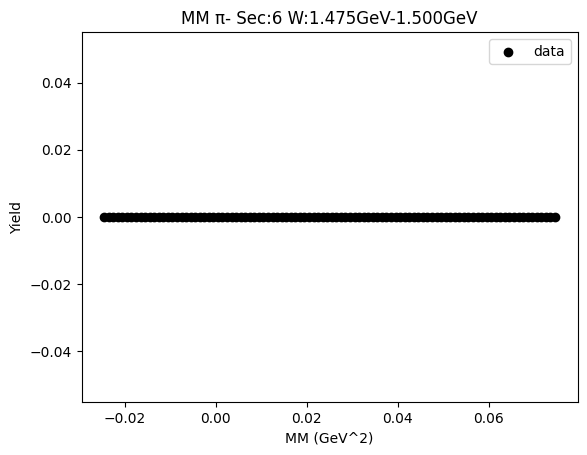

W bin: 4 1.500GeV-1.525GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


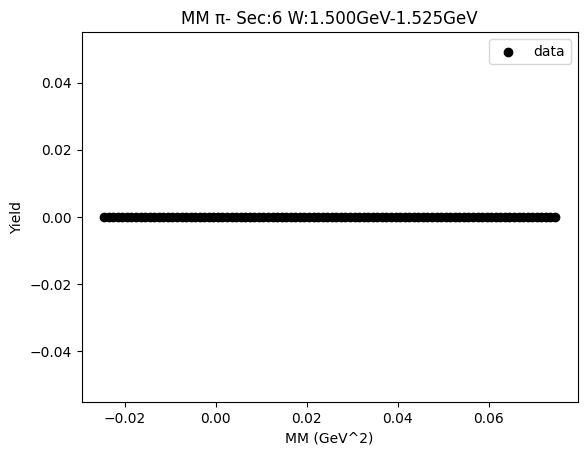

W bin: 5 1.525GeV-1.550GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


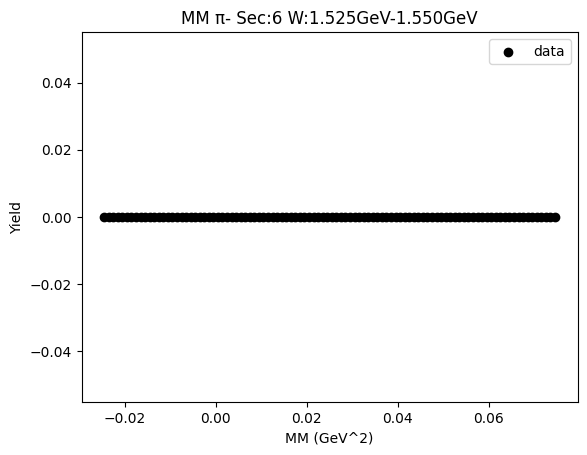

W bin: 6 1.550GeV-1.575GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


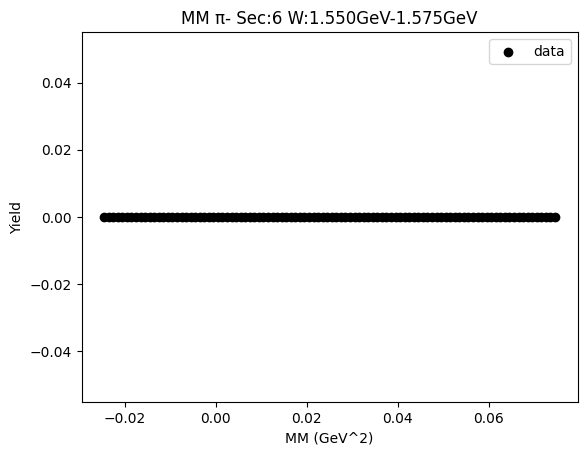

W bin: 7 1.575GeV-1.600GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


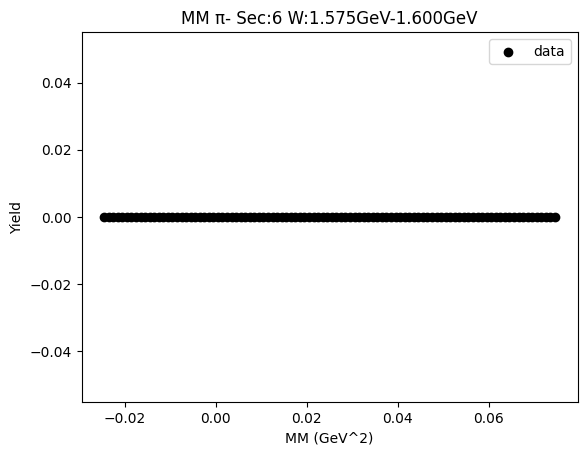

W bin: 8 1.600GeV-1.625GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


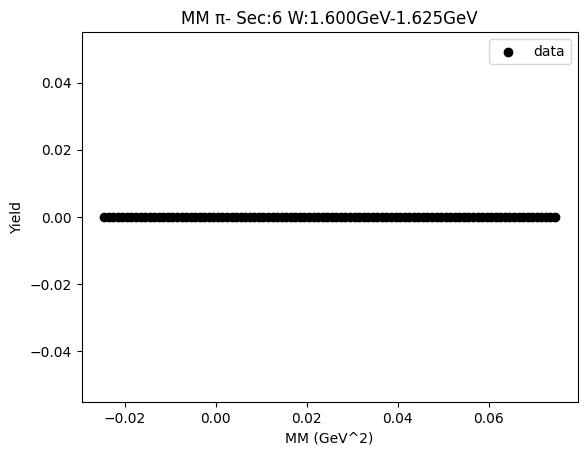

W bin: 9 1.625GeV-1.650GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


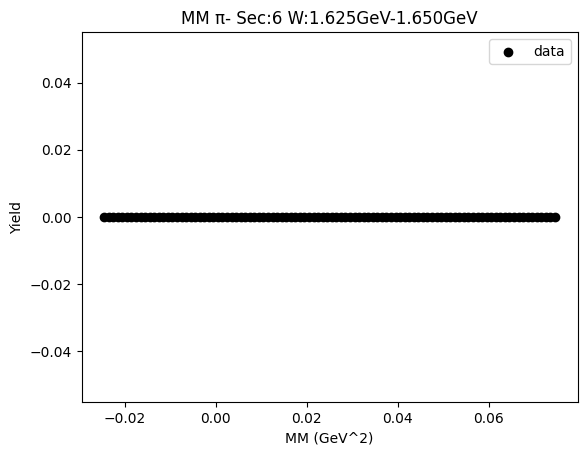

W bin: 10 1.650GeV-1.675GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


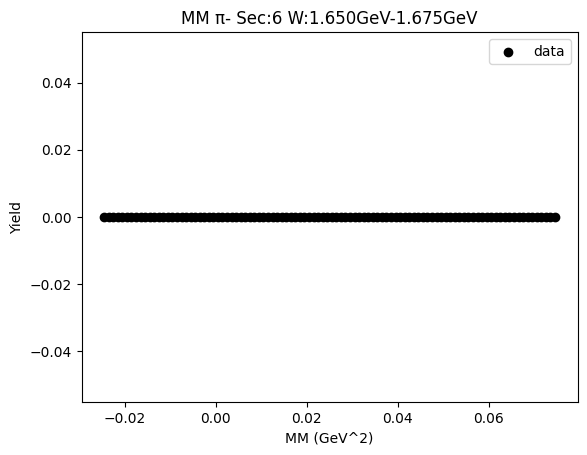

W bin: 11 1.675GeV-1.700GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


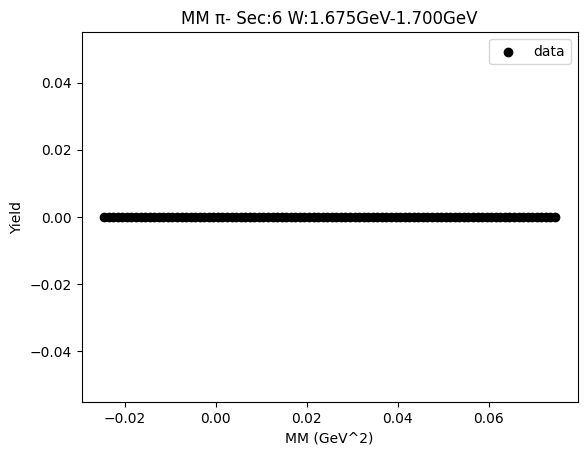

W bin: 12 1.700GeV-1.725GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


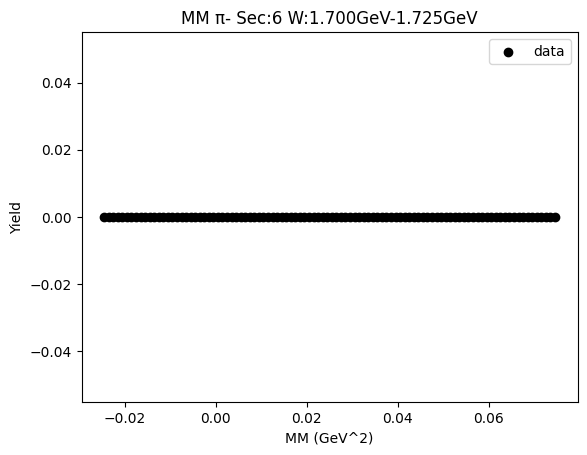

W bin: 13 1.725GeV-1.750GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


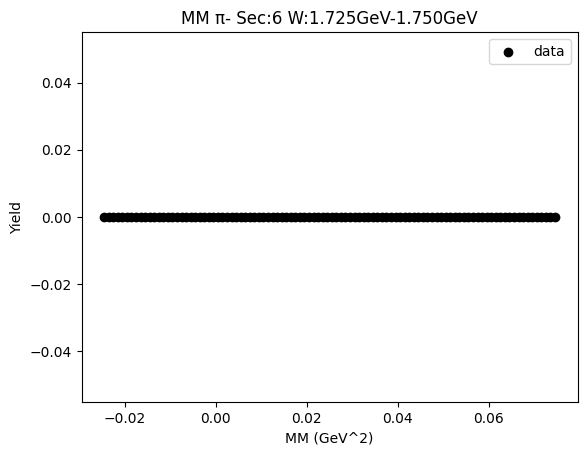

W bin: 14 1.750GeV-1.775GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


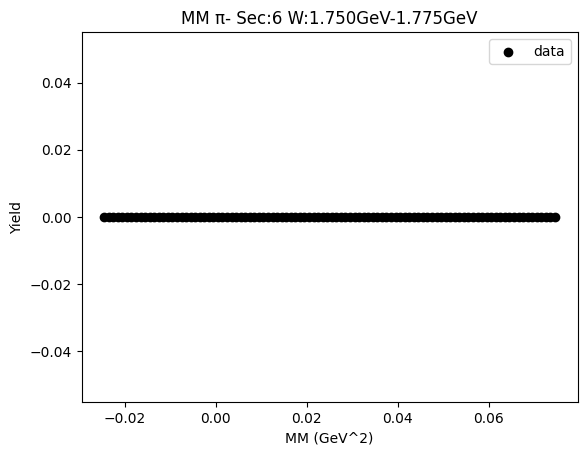

W bin: 15 1.775GeV-1.800GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


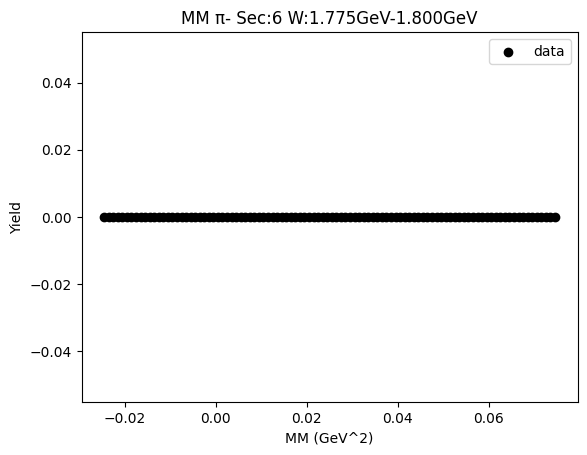

W bin: 16 1.800GeV-1.825GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


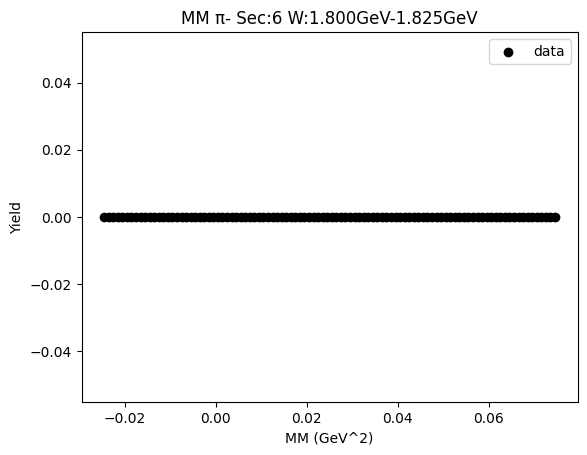

W bin: 17 1.825GeV-1.850GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


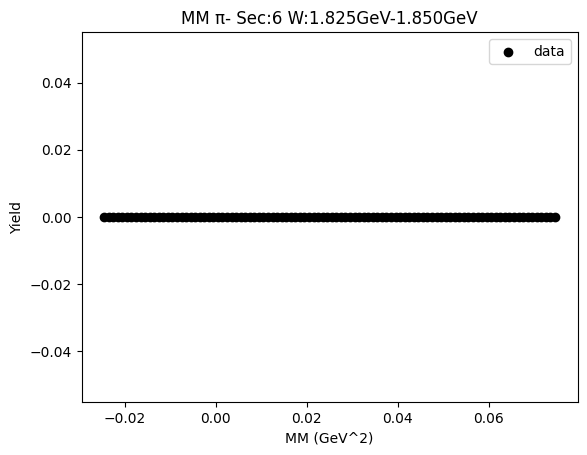

W bin: 18 1.850GeV-1.875GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


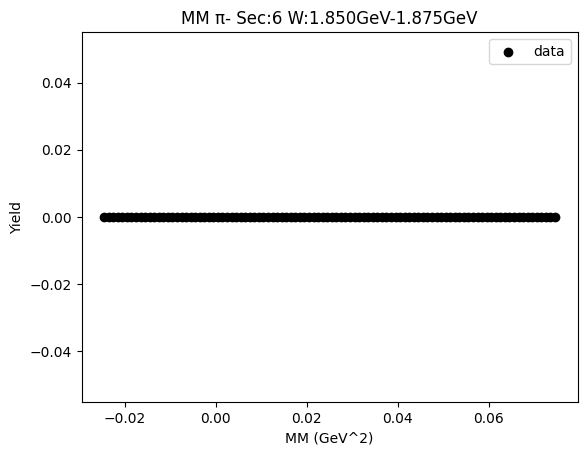

W bin: 19 1.875GeV-1.900GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


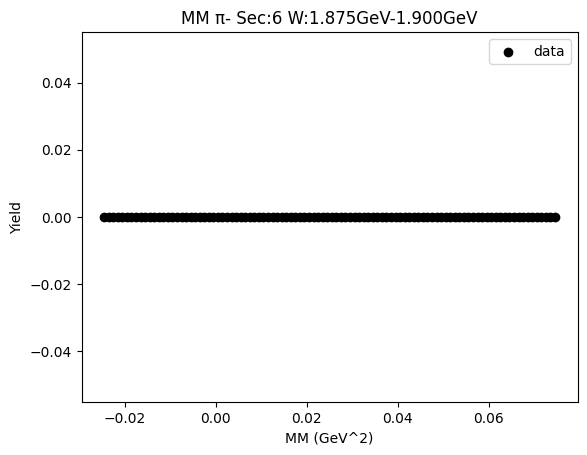

W bin: 20 1.900GeV-1.925GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


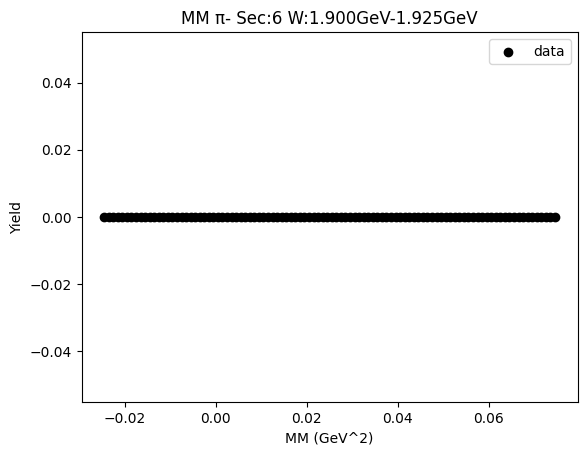

W bin: 21 1.925GeV-1.950GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


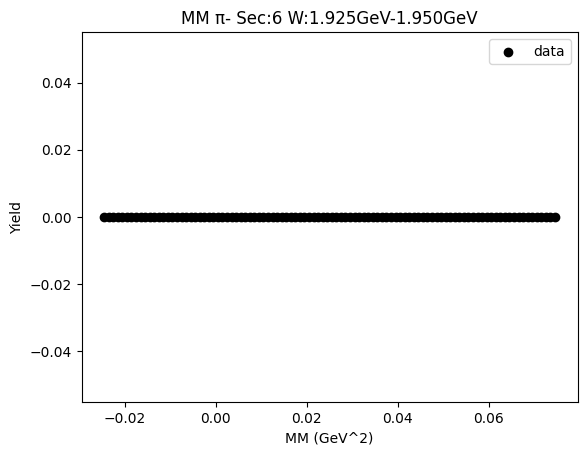

W bin: 22 1.950GeV-1.975GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


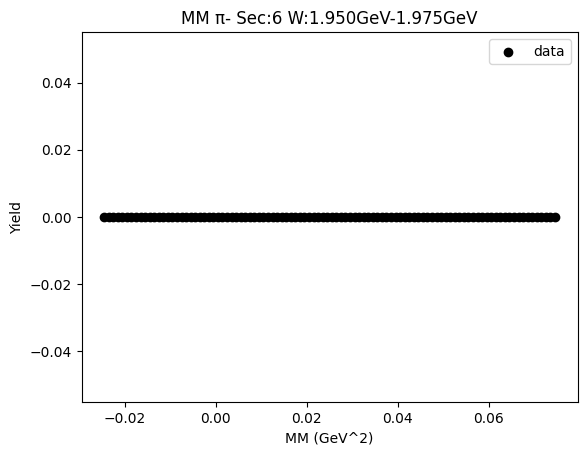

W bin: 23 1.975GeV-2.000GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


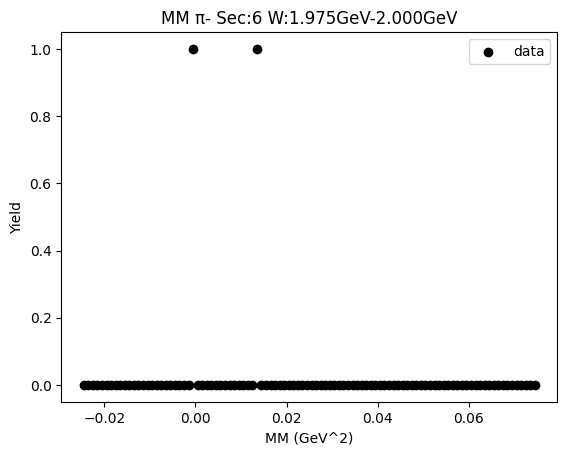

W bin: 24 2.000GeV-2.025GeV
Value Error2.2
	Just skip it for now
Cut Bounds [[9.19526943e-06 1.45809854e-05 2.12027191e-05]
 [2.33190829e-05 3.15295616e-05 4.09760580e-05]]
Cut Bounds Err [[1038261.25830526 1568913.87478743 2207233.27954331]
 [1653408.44853738 2307090.50306597 3068439.34586827]]


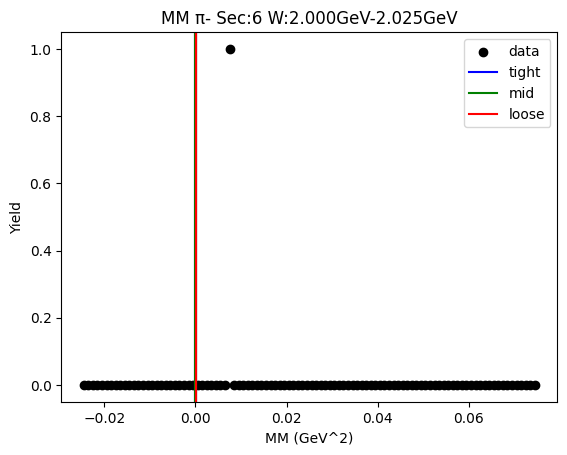

W bin: 25 2.025GeV-2.050GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


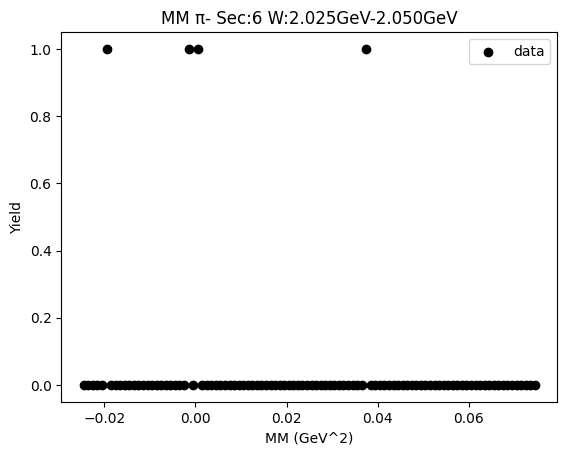

W bin: 26 2.050GeV-2.075GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


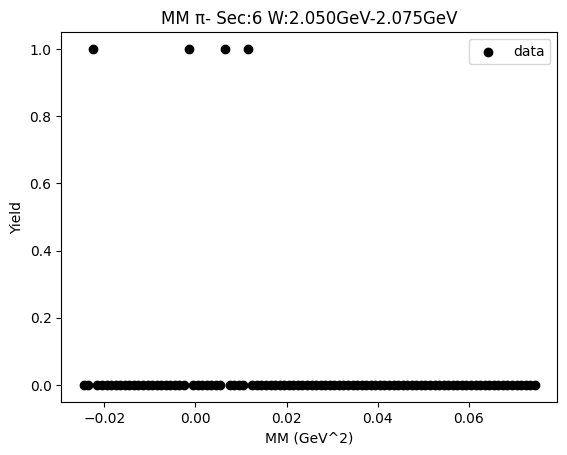

W bin: 27 2.075GeV-2.100GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


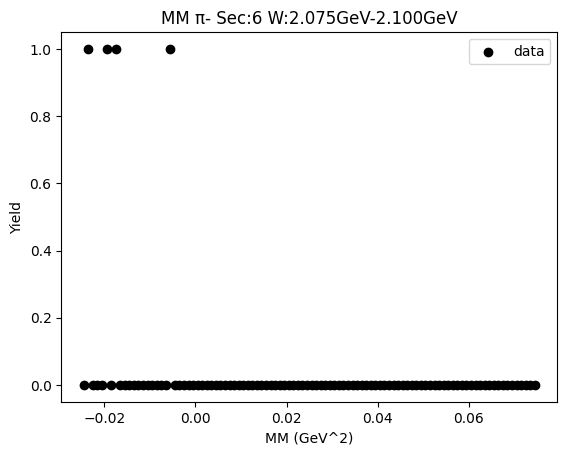

W bin: 28 2.100GeV-2.125GeV
Value Error2.0
	Just skip it for now
Cut Bounds [[0. 0. 0.]
 [0. 0. 0.]]
Cut Bounds Err [[0. 0. 0.]
 [0. 0. 0.]]


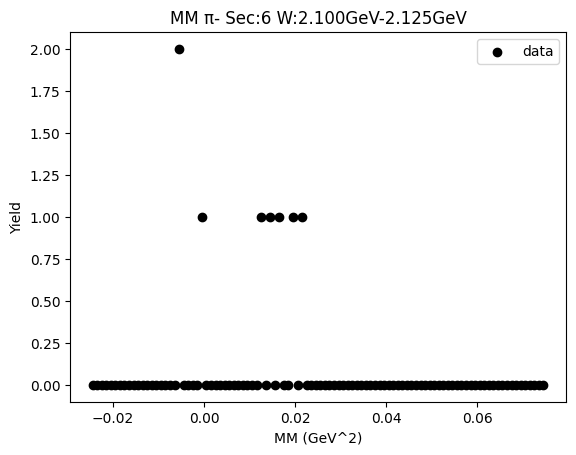

In [8]:
bkgd=True
Wlow_bin = 0
Wbin_bkgd = 20

tight = 2.5
mid = 3
loose = 3.5

a_ini=148
m_ini=0.149
g_ini=0.08
bw_ini = [a_ini,m_ini,g_ini]


gaus2_ini = [500,  0.3, 0.06287]
gaus3_ini = [706, 0.4, 0.2417]
 
bw_ini_w = [0.65, 0.15, 0.035]
gaus2_ini_w = [3.07211428, 0.3, 0.06742853]
gaus3_ini_w = [2.78458923, 0.4, 0.10165907]




# bw_ini_w = [1.01801152, 0.94626145, 0.039624]
# gaus2_ini_w = [3.07211428, 1.01332019, 0.06742853]
# gaus3_ini_w = [2.78458923, 1.26687645, 0.10165907]

bw_bounds = [[0.0,0.0,0.0],[np.inf,np.inf,np.inf]]
full_bounds = [[0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.03,0.0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf]]

bkgd_bounds = [[0.0,0.03,0.0,0.0,0.03,0.0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf]]

bw_pars = np.zeros((6,_W_bins_+1,3))
gaus2_pars = np.zeros((6,_W_bins_+1,3))
gaus3_pars = np.zeros((6,_W_bins_+1,3))

bkgd_guess_pars = np.zeros((6,_W_bins_+1,6))


ini_pars= np.zeros(9)
for i in range(3):
    ini_pars[i] = bw_ini[i]
    ini_pars[i+3] = gaus2_ini[i]
    ini_pars[i+6] = gaus3_ini[i]

    #sec W low, high, tight, mid, loose
cut_bounds = np.zeros((6,_W_bins_+1,2,3))
cut_bounds_err = np.zeros((6,_W_bins_+1,2,3))

bw_ini_w1 = np.zeros(3)
    
for sec in range(6):
    x_r=Center_Xbins(hist_name[sec][1])
    y_r=Values_1d(hist_name[sec][1])
    plt.scatter(x_r,y_r,color='k',label='data')
    plt.title("{} {} MM {} Sec:{} W:{}-{} (GeV)".format(sim,run,Particle,sec+1,_W_min_,_W_max_))
    plt.xlabel("MM (GeV^2)")
    plt.ylabel("Yield")
   
    try:
        bw_ini[0] = np.max(y_r)
        bw_ini[1] = x_r[np.argmax(y_r)]
        pars_r1, pars_cov_r1 = op.curve_fit(BW_e2,x_r,y_r,p0=bw_ini,maxfev=5000,bounds=bw_bounds)
        tmp_x1 = np.linspace(x_r[0],x_r[len(x_r)-1],200)
        plt.plot(tmp_x1,BW_e2(tmp_x1,*pars_r1),label="BW fit1")
        tmp_y_r = [y_r[i]-BW_e2(x_r[i],*pars_r1) for i in range(len(y_r))]
        plt.scatter(x_r,tmp_y_r,label="bkgd estimate")
        
        try:
            bkgd_guess_pars[sec][_W_bins_][0] = tmp_y_r[50]
            bkgd_guess_pars[sec][_W_bins_][1] = x_r[50]
            bkgd_guess_pars[sec][_W_bins_][2] = 0.05
            bkgd_guess_pars[sec][_W_bins_][3] = tmp_y_r[90]
            bkgd_guess_pars[sec][_W_bins_][4] = x_r[90]
            bkgd_guess_pars[sec][_W_bins_][5] = 0.3
            
            bkgd_full_pars, bkgd_full_pars_cov = op.curve_fit(Gaus2,x_r,tmp_y_r,p0=bkgd_guess_pars[sec][_W_bins_],maxfev=5000,bounds=bkgd_bounds)
            
            plt.plot(tmp_x1,Gaus2(tmp_x1,*bkgd_full_pars),label="bkgd fit")
            try:
                r1_ini_pars = np.zeros(9)

                for i in range(3):
                    r1_ini_pars[i] = pars_r1[i]
                    r1_ini_pars[i+3] = gaus2_ini[i]
                    r1_ini_pars[i+6] = gaus3_ini[i]
                #r1_ini[0] = np.max(y_r)
                #r1_ini[1] - x_r[np.argmax(y_r)]
                pars_r2, pars_cov_r2 = op.curve_fit(BW_e2_Gaus2,x_r,y_r,p0=r1_ini_pars,maxfev=5000)
                plt.plot(tmp_x1,BW_e2_Gaus2(tmp_x1,*pars_r2),label="BW w/ 2Gaus bk fit")
                r1_bkgd_pars = np.zeros(6)
                for i in range(3):
                    bw_pars[sec][_W_bins_][i] = pars_r2[i]
                    r1_bkgd_pars[i] = pars_r2[i+3]
                    r1_bkgd_pars[i+3] = pars_r2[i+6]
                    gaus2_pars[sec][_W_bins_][i] = pars_r2[i+3]
                    gaus3_pars[sec][_W_bins_][i] = pars_r2[i+6]
                for i in range(3):
                    for j in range(2):
                        cut_bounds[sec][_W_bins_][j][i] = (pars_r2[1]+sign2[j]*cut_sig[i]*pars_r2[2]/2.35)*(pars_r2[1]+sign2[j]*cut_sig[i]*pars_r2[2]/2.35)
                        cut_bounds_err[sec][_W_bins_][j][i] = np.sqrt((2*(pars_r2[1]+sign2[j]*cut_sig[i]*pars_r2[2]/2.35))**2 + ((2*sign2[j]*cut_sig[i]/2.35)*(pars_r2[1]+sign2[j]*cut_sig[i]*pars_r2[2]/2.35))**2)
                        if j==0:
                            plt.axvline(x=cut_bounds[sec][_W_bins_][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                        else:
                            plt.axvline(x=cut_bounds[sec][_W_bins_][j][i],color=color_order[i])

    #                 cut_bounds[sec][_W_bins_][0][0] = (pars_r2[1]-tight*pars_r2[2]/2.35)*(pars_r2[1]-tight*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][0][1] = (pars_r2[1]-mid*pars_r2[2]/2.35)*(pars_r2[1]-mid*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][0][2] = (pars_r2[1]-loose*pars_r2[2]/2.35)*(pars_r2[1]-loose*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][1][0] = (pars_r2[1]+tight*pars_r2[2]/2.35)*(pars_r2[1]+tight*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][1][1] = (pars_r2[1]+mid*pars_r2[2]/2.35)*(pars_r2[1]+mid*pars_r2[2]/2.35)
    #                 cut_bounds[sec][_W_bins_][1][2] = (pars_r2[1]+loose*pars_r2[2]/2.35)*(pars_r2[1]+loose*pars_r2[2]/2.35)
                plt.plot(tmp_x1,BW_e2(tmp_x1,*bw_pars[sec][_W_bins_]),label="BW Peak")
                plt.plot(tmp_x1,Gaus2(tmp_x1,*r1_bkgd_pars),label="background")

    #             plt.axvline(x=cut_bounds[sec][_W_bins_][0][0],label="tight -{}\u03C3".format(tight))
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][1][0],label="tight +{}\u03C3".format(tight))
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][0][1],label="mid -{}\u03C3".format(mid),color='g')
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][1][1],label="mid +{}\u03C3".format(mid),color='g')
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][0][2],label="loose -{}\u03C3".format(loose),color='r')
    #             plt.axvline(x=cut_bounds[sec][_W_bins_][1][2],label="loose +{}\u03C3".format(loose),color='r')
                print(pars_r2[1]*pars_r2[1]-3*pars_r2[2]*pars_r2[2],pars_r2[1]*pars_r2[1]+3*pars_r2[2]*pars_r2[2])
                print("Breit-Wigner Peak",bw_pars[sec][_W_bins_])
                print("Gaus2",gaus2_pars[sec][_W_bins_])
                print("Gaus3",gaus3_pars[sec][_W_bins_])
            except RuntimeError:
                print("Runtime Error1.2\n\tJust skip it for now")
            except ValueError:
                print("Value Error1.2\n\tJust skip it for now")
        except RuntimeError:
            print("Runtime Error1.1\n\tJust skip it for now")
        except ValueError:
            print("Value Error1.1\n\tJust skip it for now")
    except RuntimeError:
        print("Runtime Error1.0\n\tJust skip it for now")
    except ValueError:
        print("Value Error1.0\n\tJust skip it for now")
    plt.legend()
    plt.show()
    for Wbin in range(_W_bins_):
        if Wbin > Wlow_bin:
            print("W bin:",Wbin,W_Bin_PlotName[Wbin])
            x_w=Center_Xbins(hist_name[sec][0][Wbin])
            y_w=Values_1d(hist_name[sec][0][Wbin])
            plt.scatter(x_w,y_w,color='k',label='data')
            plt.title("MM {} Sec:{} W:{}".format(Particle,sec+1,W_Bin_PlotName[Wbin]))
            plt.xlabel("MM (GeV^2)")
            plt.ylabel("Yield")
            try:
                for j in range(3):
                    if Wbin > 0 and bw_pars[sec][Wbin-1][j]!=0:
                        for i in range(3):
                            bw_ini_w1[i] = bw_pars[sec][Wbin-1][i]
                    else:
                        for i in range(3):
                            bw_ini_w1[i] = bw_ini_w[i]
                bw_ini_w1[0] = np.max(y_w)
                bw_ini_w1[1] = x_r[np.argmax(y_w)]
                pars_w1, pars_cov_w1 = op.curve_fit(BW_e2,x_w,y_w,p0=bw_ini_w1,maxfev=5000,bounds=bw_bounds)
                #tmp_x_w1 = np.linspace(x_w[0],x_w[len(x_w)-1],200)
                #plt.plot(tmp_x1,BW_e2(tmp_x1,*pars_w1),label="BW fit1")
                #print("initial bw fit: ",pars_w1)
                if Wbin >= Wbin_bkgd:
                    tmp_y_w = [y_w[i]-BW_e2(x_w[i],*pars_w1) for i in range(len(y_w))]
                    bkgd_fit_x = Bounds_on_Y(x_w,0.03,0.07)
                    bkgd_fit_y = Bounds_on_X_From_Y(tmp_y_w,x_w,0.03,0.07)
                    #plt.scatter(bkgd_fit_x,bkgd_fit_y,label="bkgd estimate")
                    if gaus2_pars[sec][Wbin-1][0] ==0:
                        bkgd_guess_pars[sec][Wbin][0] = np.max(bkgd_fit_y)
                        bkgd_guess_pars[sec][Wbin][1] = 1.0
                        bkgd_guess_pars[sec][Wbin][2] = 0.06
                        bkgd_guess_pars[sec][Wbin][3] = tmp_y_w[80]
                        bkgd_guess_pars[sec][Wbin][4] = 1.4
                        bkgd_guess_pars[sec][Wbin][5] = 0.2
                    else:
                        bkgd_guess_pars[sec][Wbin][0] = gaus2_pars[sec][Wbin-1][0]
                        bkgd_guess_pars[sec][Wbin][1] = gaus2_pars[sec][Wbin-1][1]
                        bkgd_guess_pars[sec][Wbin][2] = gaus2_pars[sec][Wbin-1][2]
                        bkgd_guess_pars[sec][Wbin][3] = gaus3_pars[sec][Wbin-1][0]
                        bkgd_guess_pars[sec][Wbin][4] = gaus3_pars[sec][Wbin-1][1]
                        bkgd_guess_pars[sec][Wbin][5] = gaus3_pars[sec][Wbin-1][2]
                    
                    
                    
                    #plt.plot(tmp_x1,Gaus2(tmp_x1,*bkgd_guess_pars[sec][Wbin]),label="bkgd guess")
                    try:
                        
                        
                        
                        
                        
                        
                        
                        bkgd_pars_w, bkgd_pars_cov_w = op.curve_fit(Gaus2,bkgd_fit_x,bkgd_fit_y,p0=bkgd_guess_pars[sec][Wbin],bounds=bkgd_bounds)
                        #plt.plot(tmp_x1,Gaus2(tmp_x1,*bkgd_pars_w),label="bkgd fit1")
                        print("background fit",bkgd_pars_w)
                        try:
                            w1_ini_pars = np.zeros(9)

                            for i in range(3):
                                w1_ini_pars[i] = pars_w1[i]
                                if Wbin > 0:
                                    if gaus2_pars[sec][Wbin-1][i] != 0.0:
                                        w1_ini_pars[i+3] = gaus2_pars[sec][Wbin-1][i]
                                        w1_ini_pars[i+6] = gaus3_pars[sec][Wbin-1][i]
                                    else:
                                        w1_ini_pars[i+3] = gaus2_ini_w[i]
                                        w1_ini_pars[i+6] = gaus3_ini_w[i]
                                else:
                                    w1_ini_pars[i+3] = gaus2_ini_w[i]
                                    w1_ini_pars[i+6] = gaus3_ini_w[i]
                           # print("w1_ini_pars:",w1_ini_pars)
                            #w1_ini_pars[0] = np.max(y_w)
                            #w1_ini_pars[1] = x_r[np.argmax(y_w)]
                            for i in range(6):
                                w1_ini_pars[i+3] = bkgd_pars_w[i]
#                             w1_ini_pars[4] = x_w[50]
#                             w1_ini_pars[6] = y_w[90]
#                             w1_ini_pars[7] = x_w[90]
                            #print("post W1_ini_pars",w1_ini_pars)
#                             print(x_w)
#                             print(y_w)
                            #plt.plot(tmp_x1,BW_e2_Gaus2(tmp_x1,*w1_ini_pars),label="Guess on the 2 gaus bkgd")
                            #plt.scatter(x_w,y_w,color='c',label='data again')
                            print(full_bounds)
                            pars_w2, pars_cov_w2 = op.curve_fit(BW_e2_Gaus2,x_w,y_w,p0=w1_ini_pars,maxfev=50000,bounds=full_bounds)
                            plt.plot(tmp_x1,BW_e2_Gaus2(tmp_x1,*pars_w2),label="BW w/ 2Gaus bk fit")
                            
                            w1_bkgd_pars = np.zeros(6)
                            for i in range(3):
                                bw_pars[sec][Wbin][i] = pars_w2[i]
                                w1_bkgd_pars[i] = pars_w2[i+3]
                                w1_bkgd_pars[i+3] = pars_w2[i+6]
                                gaus2_pars[sec][Wbin][i] = pars_w2[i+3]
                                gaus3_pars[sec][Wbin][i] = pars_w2[i+6]
                            for i in range(3):
                                for j in range(2):
                                    cut_bounds[sec][Wbin][j][i] = (pars_w2[1]+sign2[j]*cut_sig[i]*pars_w2[2]/2.35)*(pars_w2[1]+sign2[j]*cut_sig[i]*pars_w2[2]/2.35)
                                    cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w2[1][1]*2*(pars_w2[1]+sign2[j]*cut_sig[i]*pars_w2[2]/2.35))**2 + (pars_cov_w2[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w2[1]+sign2[j]*cut_sig[i]*pars_w2[2]/2.35))**2)
                                    if j==0:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                    else:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
    #                             cut_bounds[sec][Wbin][0][0] = (pars_w2[1]-tight*pars_w2[2]/2.35)*(pars_w2[1]-tight*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][0][1] = (pars_w2[1]-mid*pars_w2[2]/2.35)*(pars_w2[1]-mid*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][0][2] = (pars_w2[1]-loose*pars_w2[2]/2.35)*(pars_r2[1]-loose*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][1][0] = (pars_w2[1]+tight*pars_w2[2]/2.35)*(pars_r2[1]+tight*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][1][1] = (pars_w2[1]+mid*pars_w2[2]/2.35)*(pars_r2[1]+mid*pars_w2[2]/2.35)
    #                             cut_bounds[sec][Wbin][1][2] = (pars_w2[1]+loose*pars_w2[2]/2.35)*(pars_r2[1]+loose*pars_w2[2]/2.35)
                            plt.plot(tmp_x1,BW_e2(tmp_x1,*bw_pars[sec][Wbin]),label="BW Peak")
                            plt.plot(tmp_x1,Gaus2(tmp_x1,*w1_bkgd_pars),label="background")

                            print(pars_w2[1]*pars_w2[1]-3*pars_w2[2]*pars_w2[2],pars_w2[1]*pars_w2[1]+3*pars_w2[2]*pars_w2[2])
                            print("Breit-Wigner Peak",bw_pars[sec][Wbin])
                            print("Gaus2",gaus2_pars[sec][Wbin])
                            print("Gaus3",gaus3_pars[sec][Wbin])
                        except RuntimeError:
                            print("Runtime Error2.1\n\tJust skip it for now")
                            for i in range(3):
                                bw_pars[sec][Wbin][i] = pars_w1[i]
                            for i in range(3):
                                for j in range(2):
                                    cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                                    cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w1[1][1]*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)
                                    if j==0:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                    else:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
                        except ValueError:
                            print("Value Error2.1\n\tJust skip it for now")
                            for i in range(3):
                                bw_pars[sec][Wbin][i] = pars_w1[i]
                            for i in range(3):
                                for j in range(2):
                                    cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                                    cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w1[1][1]*2*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)
                                    if j==0:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                    else:
                                        plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
                    except RuntimeError:
                        print("Runtime Error2.2\n\tJust skip it for now")
                        for i in range(3):
                            bw_pars[sec][Wbin][i] = pars_w1[i]
                        for i in range(3):
                            for j in range(2):
                                cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                                cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w1[1][1]*2*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)
                                if j==0:
                                    plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                else:
                                    plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
                    except ValueError:
                        print("Value Error2.2\n\tJust skip it for now")
                        for i in range(3):
                            bw_pars[sec][Wbin][i] = pars_w1[i]
                        for i in range(3):
                            for j in range(2):
                                cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                                cut_bounds_err[sec][Wbin][j][i] = np.sqrt((2*(pars_cov_w1[1][1]*pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)
                                if j==0:
                                    plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                                else:
                                    plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
                else:
                    plt.plot(tmp_x1,BW_e2(tmp_x1,*pars_w1),label="BW fit1")
                    for i in range(3):
                        bw_pars[sec][Wbin][i] = pars_w1[i]
                    for i in range(3):
                        for j in range(2):
                            cut_bounds[sec][Wbin][j][i] = (pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35)
                            cut_bounds_err[sec][Wbin][j][i] = np.sqrt((pars_cov_w1[1][1]*2*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2 + (pars_cov_w1[2][2]*(2*sign2[j]*cut_sig[i]/2.35)*(pars_w1[1]+sign2[j]*cut_sig[i]*pars_w1[2]/2.35))**2)

                            if j==0:
                                plt.axvline(x=cut_bounds[sec][Wbin][j][i],label="{}".format(cut_names[i]),color=color_order[i])
                            else:
                                plt.axvline(x=cut_bounds[sec][Wbin][j][i],color=color_order[i])
#                         cut_bounds[sec][Wbin][0][0] = (pars_w1[1]-tight*pars_w1[2]/2.35)*(pars_w1[1]-tight*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][0][1] = (pars_w1[1]-mid*pars_w1[2]/2.35)*(pars_w1[1]-mid*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][0][2] = (pars_w1[1]-loose*pars_w1[2]/2.35)*(pars_w1[1]-loose*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][1][0] = (pars_w1[1]+tight*pars_w1[2]/2.35)*(pars_w1[1]+tight*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][1][1] = (pars_w1[1]+mid*pars_w1[2]/2.35)*(pars_w1[1]+mid*pars_w1[2]/2.35)
#                         cut_bounds[sec][Wbin][1][2] = (pars_w1[1]+loose*pars_w1[2]/2.35)*(pars_w1[1]+loose*pars_w1[2]/2.35)
#                 plt.axvline(x=cut_bounds[sec][Wbin][0][0],label="tight -{}\u03C3".format(tight))
#                 plt.axvline(x=cut_bounds[sec][Wbin][1][0],label="tight +{}\u03C3".format(tight))
#                 plt.axvline(x=cut_bounds[sec][Wbin][0][1],label="mid -{}\u03C3".format(mid),color='g')
#                 plt.axvline(x=cut_bounds[sec][Wbin][1][1],label="mid +{}\u03C3".format(mid),color='g')
#                 plt.axvline(x=cut_bounds[sec][Wbin][0][2],label="loose -{}\u03C3".format(loose),color='r')
#                 plt.axvline(x=cut_bounds[sec][Wbin][1][2],label="loose +{}\u03C3".format(loose),color='r')
            except RuntimeError:
                print("Runtime Error2.0\n\tJust skip it for now")
                
            except ValueError:
                print("Value Error2.0\n\tJust skip it for now")
            print("Cut Bounds",cut_bounds[sec][Wbin])
            print("Cut Bounds Err",cut_bounds_err[sec][Wbin])
            plt.legend()
            plt.show()
            
            

In [ ]:
W_bins = [W_center(i) for i in range(_W_bins_)]

def Linear(x_,a_,b_):
    return a_ + b_*x_

lin_fit = np.zeros((6,2,3,2))

for sec in range(6):
#     y_tight_w1 = Remove_Zeros_Y([cut_bounds[sec][Wbin][0][0] for Wbin in range(_W_bins_)])
#     y_tight_w2 = Remove_Zeros_Y([cut_bounds[sec][Wbin][1][0] for Wbin in range(_W_bins_)])
#     y_mid_w1 = Remove_Zeros_Y([cut_bounds[sec][Wbin][0][1] for Wbin in range(_W_bins_)])
#     y_mid_w2 = Remove_Zeros_Y([cut_bounds[sec][Wbin][1][1] for Wbin in range(_W_bins_)])
#     y_loose_w1 = Remove_Zeros_Y([cut_bounds[sec][Wbin][0][2] for Wbin in range(_W_bins_)])
#     y_loose_w2 = Remove_Zeros_Y([cut_bounds[sec][Wbin][1][2] for Wbin in range(_W_bins_)])
#     #x_tight = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][0] for Wbin in range(_W_bins_)])
#     x = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][1] for Wbin in range(_W_bins_)])
    for i in range(3):
        for j in range(2):
            x = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][j][i] for Wbin in range(_W_bins_)])
            y = Remove_Zeros_Y([cut_bounds[sec][Wbin][j][i] for Wbin in range(_W_bins_)])
            if j ==0:
                plt.scatter(x,y,color=color_order[i],label=cut_names[i])
                plt.errorbar(x,y,color=color_order[i],yerr=Remove_Zeros_Y([cut_bounds_err[sec][Wbin][j][i] for Wbin in range(_W_bins_)]),ls='')
            else:
                plt.scatter(x,y,color=color_order[i])
                plt.errorbar(x,y,color=color_order[i],yerr=Remove_Zeros_Y([cut_bounds_err[sec][Wbin][j][i] for Wbin in range(_W_bins_)]),ls='')
            try:
                pars, pars_cov = op.curve_fit(Linear,x,y,sigma=Remove_Zeros_Y([cut_bounds_err[sec][Wbin][j][i] for Wbin in range(_W_bins_)]),maxfev=5000)
                cont_x = np.linspace(np.min(x),np.max(x),200)
                plt.plot(cont_x,Linear(cont_x,*pars),color=color_order[i])
                lin_fit[sec][j][i][0] = pars[1]
                lin_fit[sec][j][i][1] = pars[0]
            except RuntimeError:
                print("runtime error")
            except ValueError:
                print("Value error")
#     plt.scatter(x,y_tight_w1,color='b',label="tight +-{}\u03C3".format(tight))
#     plt.scatter(x,y_tight_w2,color='b',)
#     plt.scatter(x,y_mid_w1,color='g',label="mid +-{}\u03C3".format(mid))
#     plt.scatter(x,y_mid_w2,color='g')
#     plt.scatter(x,y_loose_w1,color='r',label="loose +-{}\u03C3".format(loose))
#     plt.scatter(x,y_loose_w2,color='r')
#     plt.errorbar(x,y_tight_w1,color='b',yerr=cut_bounds[sec][_W_bins_][0][0])
#     plt.scatter(x,y_tight_w2,color='b',)
#     plt.scatter(x,y_mid_w1,color='g',label="mid +-{}\u03C3".format(mid))
#     plt.scatter(x,y_mid_w2,color='g')
#     plt.scatter(x,y_loose_w1,color='r',label="loose +-{}\u03C3".format(loose))
#     plt.scatter(x,y_loose_w2,color='r')
#     plt.hlines(cut_bounds[sec][_W_bins_][0][0],_W_min_,_W_max_,color='b',label="W range tight +-{}\u03C3".format(tight))
#     plt.hlines(cut_bounds[sec][_W_bins_][1][0],_W_min_,_W_max_,color='b')
#     plt.hlines(cut_bounds[sec][_W_bins_][0][1],_W_min_,_W_max_,color='g',label="W range mid +-{}\u03C3".format(mid))
#     plt.hlines(cut_bounds[sec][_W_bins_][1][1],_W_min_,_W_max_,color='g')
#     plt.hlines(cut_bounds[sec][_W_bins_][0][2],_W_min_,_W_max_,color='r',label="W range loose +-{}\u03C3".format(loose))
#     plt.hlines(cut_bounds[sec][_W_bins_][1][2],_W_min_,_W_max_,color='r')
    plt.legend()
    plt.title("{} {} MM {} Cut Variation with W by Sec:{}".format(sim,run,Particle,sec+1))
    plt.xlabel("W (GeV)")
    plt.ylabel("MM (GeV^2)")
    plt.show()
    

In [ ]:
for sec in range(6):
    y_tight_w1 = Remove_Zeros_Y([sign(cut_bounds[sec][Wbin][0][0])*math.sqrt(sign(cut_bounds[sec][Wbin][0][0])*cut_bounds[sec][Wbin][0][0]) for Wbin in range(_W_bins_)])
    y_tight_w2 = Remove_Zeros_Y([math.sqrt(cut_bounds[sec][Wbin][1][0]) for Wbin in range(_W_bins_)])
    y_mid_w1 = Remove_Zeros_Y([sign(cut_bounds[sec][Wbin][0][1])*math.sqrt(sign(cut_bounds[sec][Wbin][0][1])*cut_bounds[sec][Wbin][0][1]) for Wbin in range(_W_bins_)])
    y_mid_w2 = Remove_Zeros_Y([math.sqrt(cut_bounds[sec][Wbin][1][1]) for Wbin in range(_W_bins_)])
    y_loose_w1 = Remove_Zeros_Y([math.sqrt(sign(cut_bounds[sec][Wbin][0][2])*cut_bounds[sec][Wbin][0][2]) for Wbin in range(_W_bins_)])
    y_loose_w2 = Remove_Zeros_Y([sign(cut_bounds[sec][Wbin][0][2])*math.sqrt(cut_bounds[sec][Wbin][1][2]) for Wbin in range(_W_bins_)])
    #x_tight = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][0] for Wbin in range(_W_bins_)])
    x = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][1] for Wbin in range(_W_bins_)])
    #x_loose = Remove_Zeros_X(W_bins,[cut_bounds[sec][Wbin][0][2] for Wbin in range(_W_bins_)])
    plt.scatter(x,y_tight_w1,color='b',label="tight +-{}\u03C3".format(tight))
    plt.scatter(x,y_tight_w2,color='b',)
    plt.scatter(x,y_mid_w1,color='g',label="mid +-{}\u03C3".format(mid))
    plt.scatter(x,y_mid_w2,color='g')
    plt.scatter(x,y_loose_w1,color='r',label="loose +-{}\u03C3".format(loose))
    plt.scatter(x,y_loose_w2,color='r')
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][0][0]),_W_min_,_W_max_,color='b',label="W range tight +-{}\u03C3".format(tight))
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][1][0]),_W_min_,_W_max_,color='b')
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][0][1]),_W_min_,_W_max_,color='g',label="W range mid +-{}\u03C3".format(mid))
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][1][1]),_W_min_,_W_max_,color='g')
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][0][2]),_W_min_,_W_max_,color='r',label="W range loose +-{}\u03C3".format(loose))
#     plt.hlines(math.sqrt(cut_bounds[sec][_W_bins_][1][2]),_W_min_,_W_max_,color='r')
    plt.legend()
    plt.title("{} {} MM {} Cut Variation with W Sec:{}".format(sim,run,Particle,sec+1))
    plt.xlabel("W (GeV)")
    plt.ylabel("MM (GeV)")
    plt.show()

In [ ]:
Wbin = _W_bins_
m_par = 0.938272088
for sec in range(6):
    plt.plot(tmp_x1,BW_e2(tmp_x1,*bw_pars[sec][Wbin]),label="Sec {}".format(sec+1))
plt.axvline(x=m_par*m_par,label="{} mass".format(Particle),color='r')
plt.legend()
plt.show

In [ ]:
print("MM^2 "+Particle+" Cut Bounds [sec][low/high][tight/mid/loose][slope,intercept]")
for sec in range(6):
    for side in range(2):
        for t in range(3):
            for p in range(2):
                if p ==0:
                    if t == 0:
                        if side ==0:
                            if sec==0:
                                print("{\t{\t{\t{",lin_fit[sec][side][t][p],end=",")
                            else:
                                print("\t{\t{\t{",lin_fit[sec][side][t][p],end=",")
                        else:
                            print("\t\t{\t{",lin_fit[sec][side][t][p],end=",")
                    else:
                        print("{",lin_fit[sec][side][t][p],end=",")
                elif p==1:
                    if t == 2:
                        if side == 1:
                            if sec == 5:
                                print(lin_fit[sec][side][t][p],"}}}}")
                            else:
                                print(lin_fit[sec][side][t][p],"}}},")
                        else: 
                            print(lin_fit[sec][side][t][p],"}},")
                    else:
                        print(lin_fit[sec][side][t][p],end="},")
                else: 
                     print(lin_fit[sec][side][t][p],end=",")
